In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 6
fig_height = 4
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/hirofumi48/162348.github.io/posts/2024/Samplers':
  os.chdir(r'/Users/hirofumi48/162348.github.io/posts/2024/Samplers')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap_external.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/zipimport.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/codecs.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/aliases.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/__init__.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/utf_8.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.

/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_4519/585937172.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
# Import required packages
import torch
import numpy as np
import normflows as nf

from matplotlib import pyplot as plt

from tqdm import tqdm

In [3]:
# Set up model

# Define 2D Gaussian base distribution
base = nf.distributions.base.DiagGaussian(2)

# Define list of flows
num_layers = 32
flows = []
for i in range(num_layers):
    # Neural network with two hidden layers having 64 units each
    # Last layer is initialized by zeros making training more stable
    param_map = nf.nets.MLP([1, 64, 64, 2], init_zeros=True)
    # Add flow layer
    flows.append(nf.flows.AffineCouplingBlock(param_map))
    # Swap dimensions
    flows.append(nf.flows.Permute(2, mode='swap'))
    
# Construct flow model
model = nf.NormalizingFlow(base, flows)

In [4]:
# Move model on GPU if available
# enable_cuda = True
# device = torch.device('cuda' if torch.cuda.is_available() and enable_cuda else 'cpu')
device = torch.device("mps")
model = model.to(device)

/opt/homebrew/lib/python3.12/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3610.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


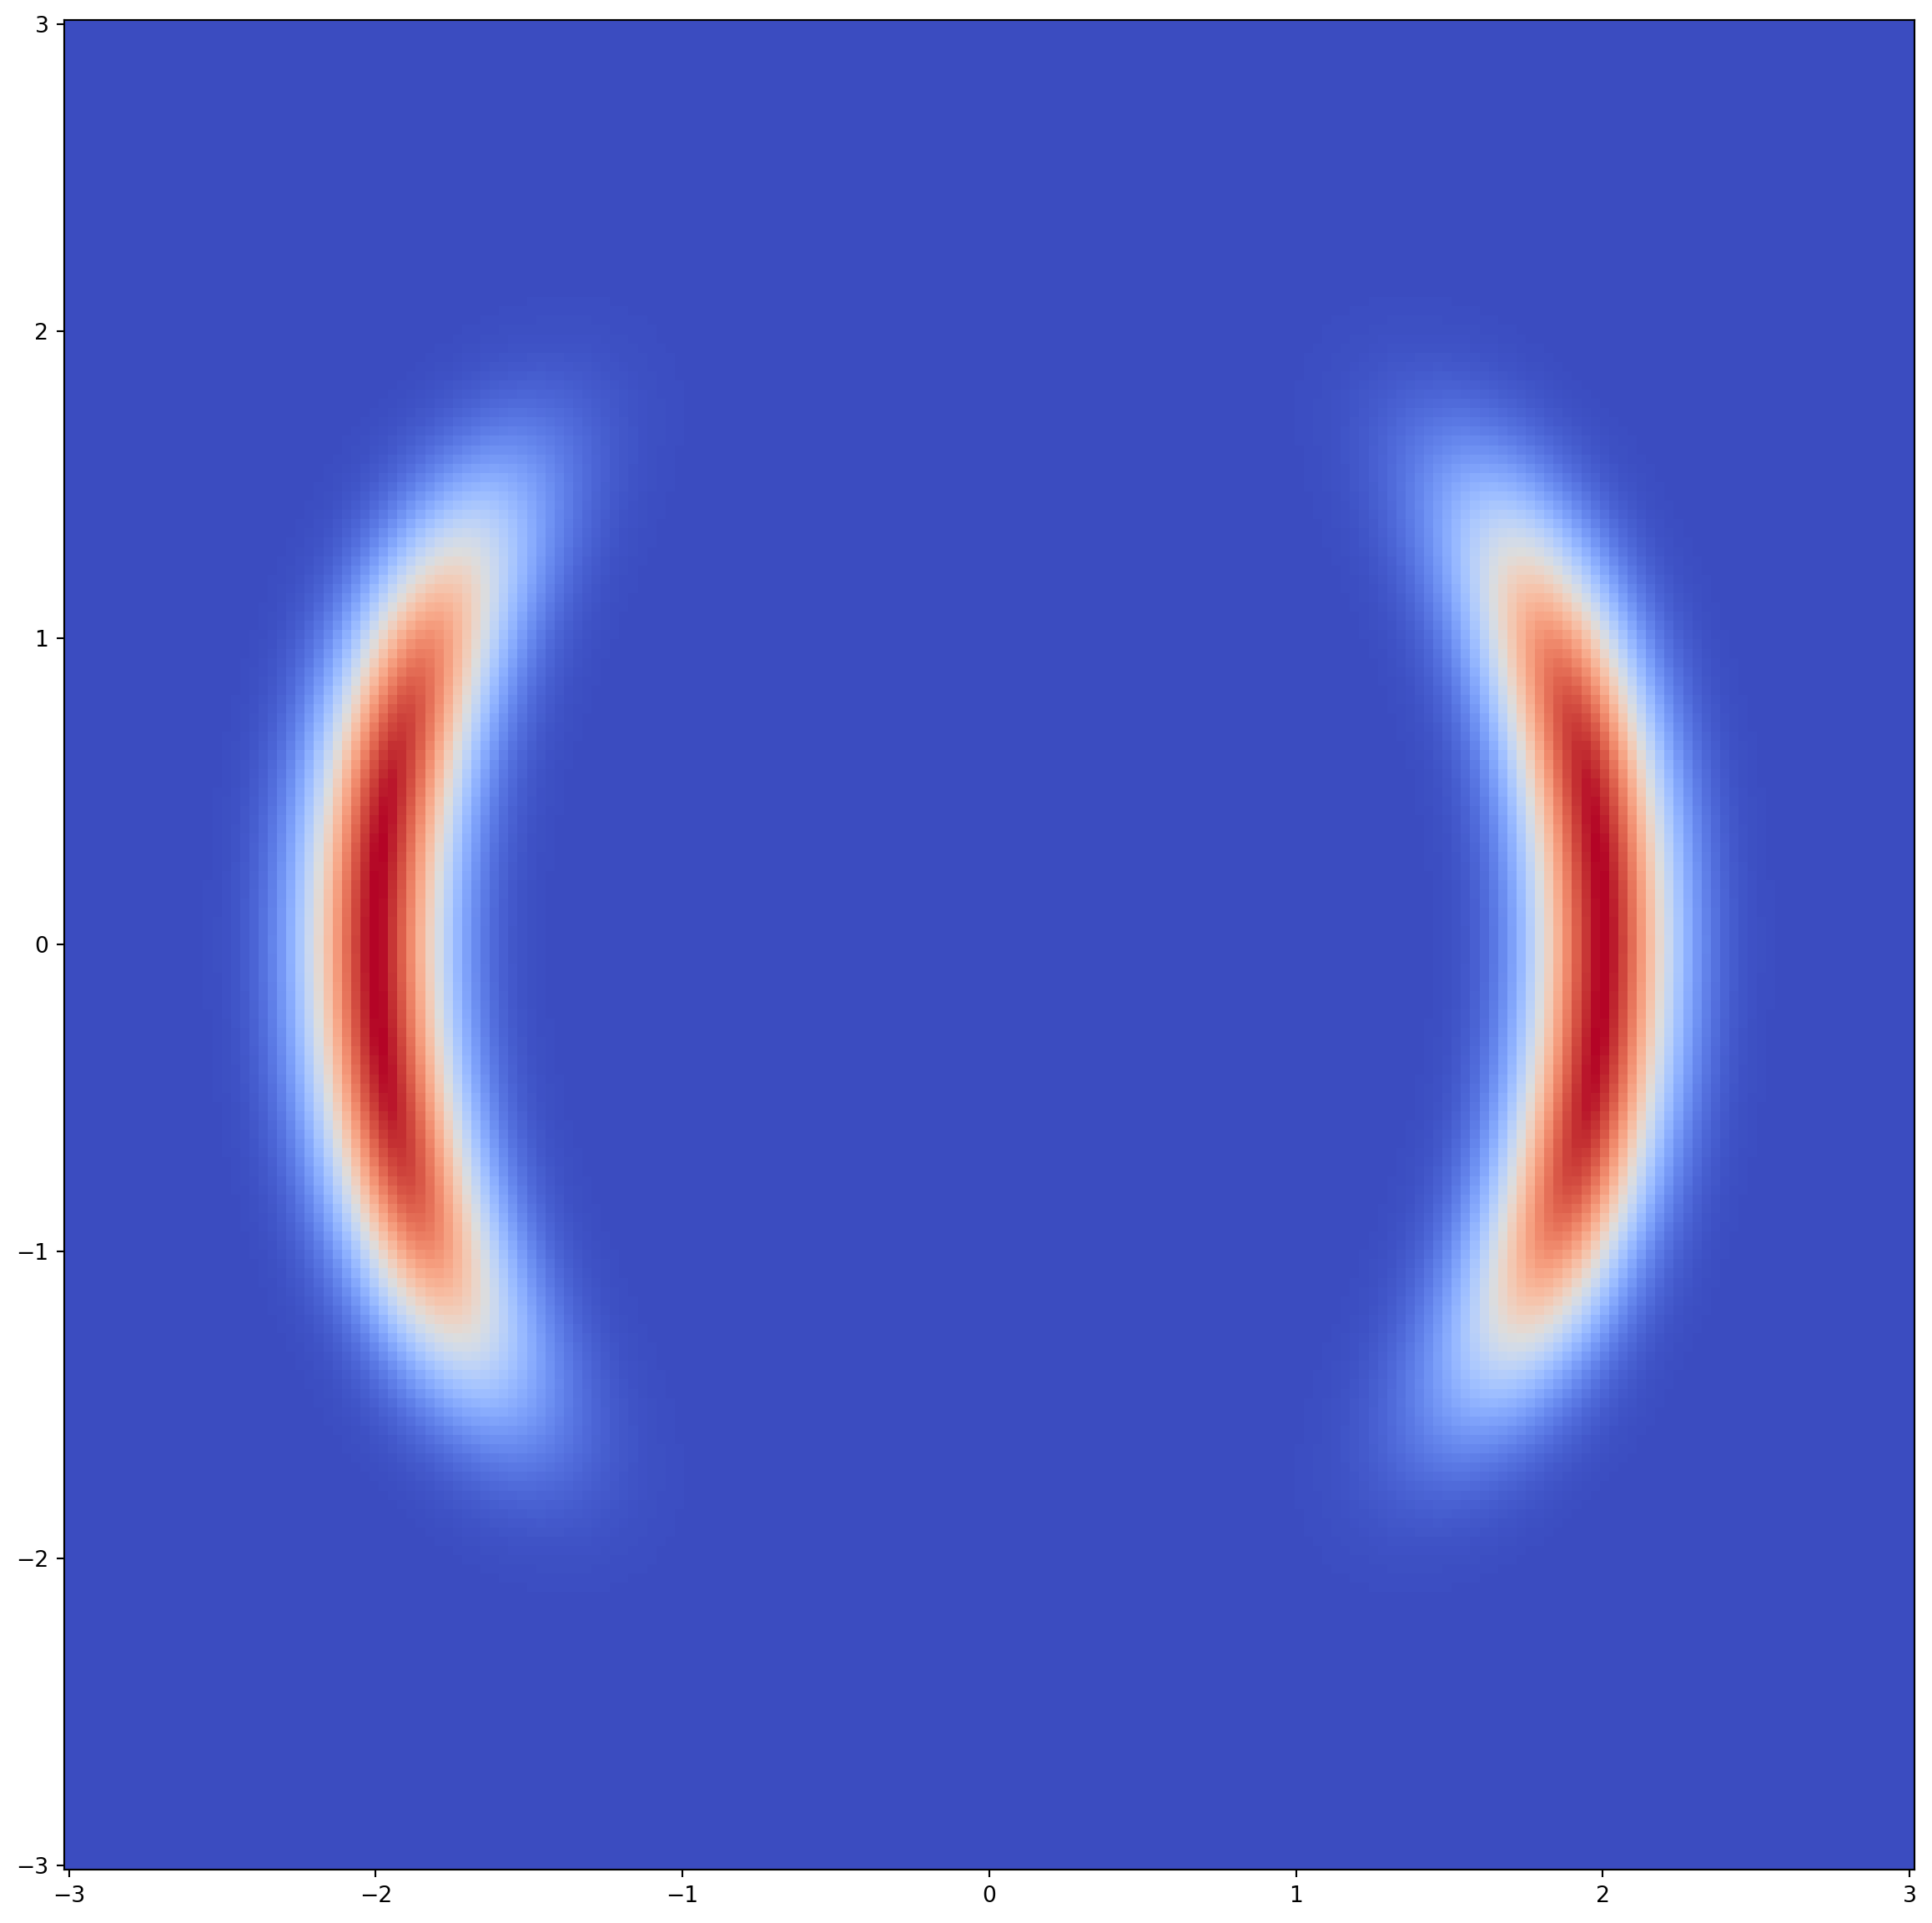

In [5]:
# Define target distribution
target = nf.distributions.TwoMoons()

# Plot target distribution
grid_size = 200
xx, yy = torch.meshgrid(torch.linspace(-3, 3, grid_size), torch.linspace(-3, 3, grid_size))
zz = torch.cat([xx.unsqueeze(2), yy.unsqueeze(2)], 2).view(-1, 2)
zz = zz.to(device)

log_prob = target.log_prob(zz).to('cpu').view(*xx.shape)
prob = torch.exp(log_prob)
prob[torch.isnan(prob)] = 0

plt.figure(figsize=(15, 15))
plt.pcolormesh(xx, yy, prob.data.numpy(), cmap='coolwarm')
plt.gca().set_aspect('equal', 'box')
plt.show()

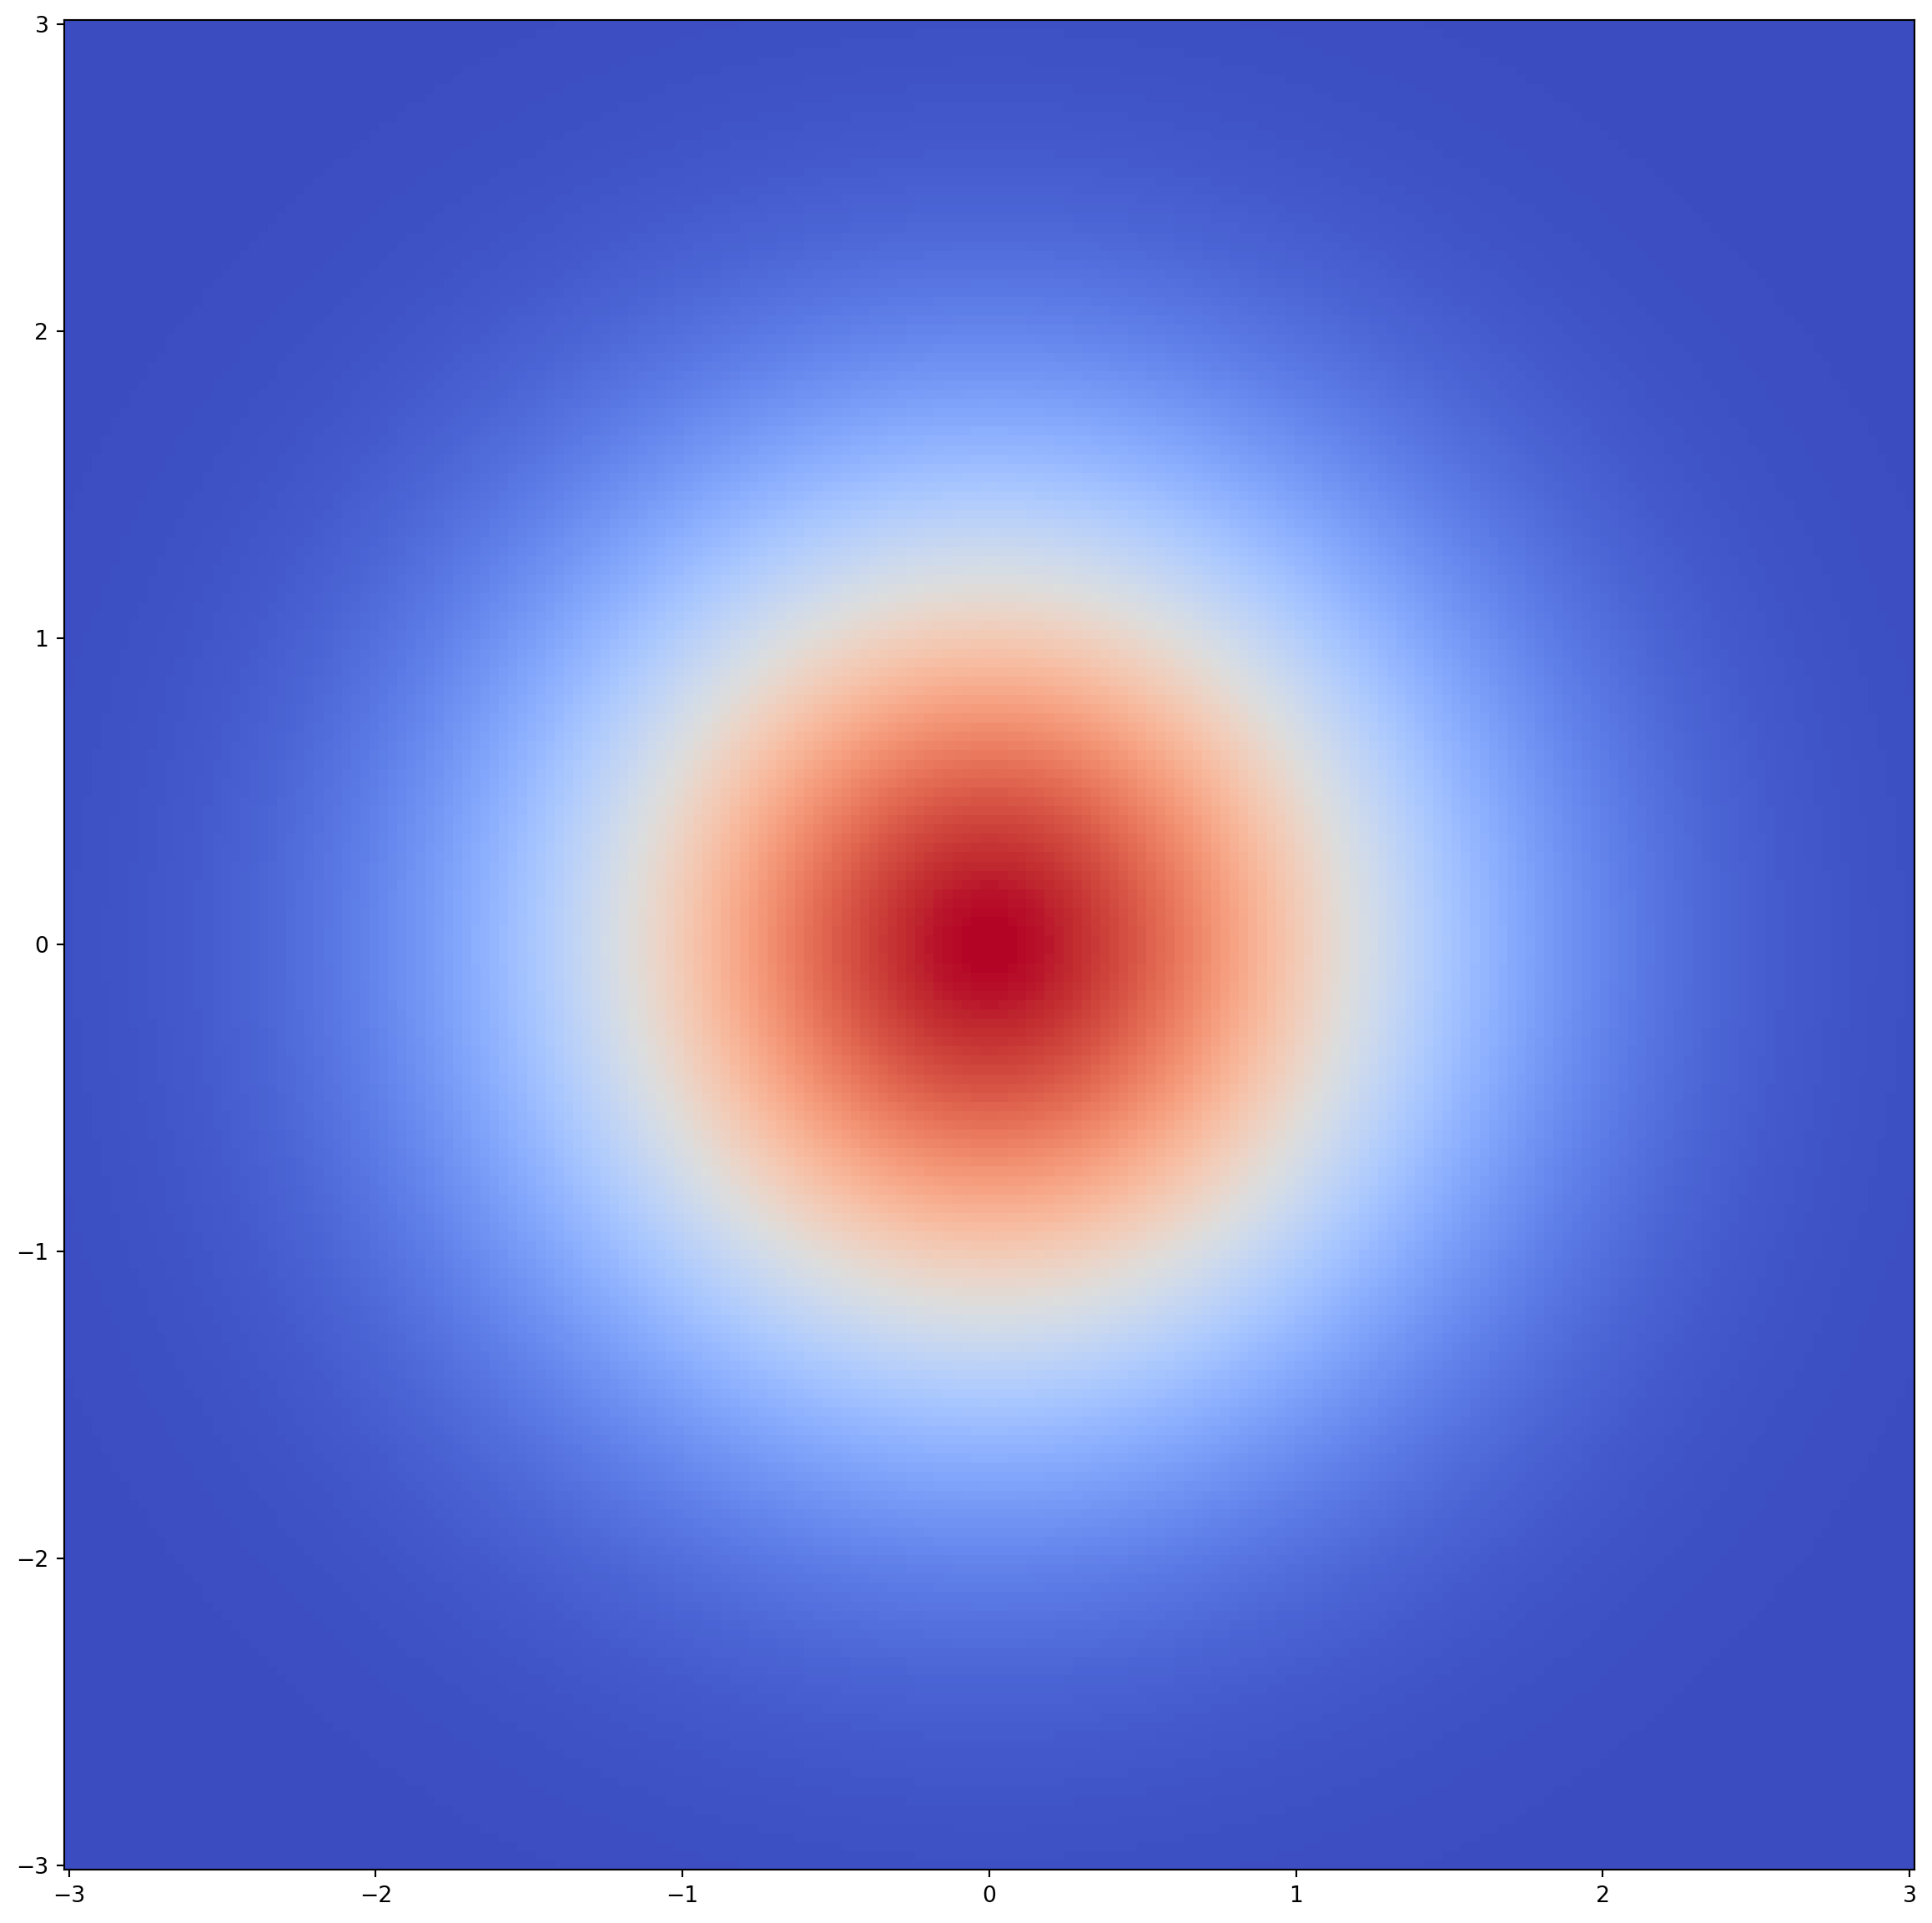

In [6]:
# Plot initial flow distribution
model.eval()
log_prob = model.log_prob(zz).to('cpu').view(*xx.shape)
model.train()
prob = torch.exp(log_prob)
prob[torch.isnan(prob)] = 0

plt.figure(figsize=(15, 15))
plt.pcolormesh(xx, yy, prob.data.numpy(), cmap='coolwarm')
plt.gca().set_aspect('equal', 'box')
plt.show()

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 1/4000 [00:02<2:15:36,  2.03s/it]

  0%|          | 3/4000 [00:02<38:55,  1.71it/s]  

  0%|          | 5/4000 [00:02<21:29,  3.10it/s]

  0%|          | 7/4000 [00:02<14:29,  4.59it/s]

  0%|          | 9/4000 [00:02<10:53,  6.10it/s]

  0%|          | 11/4000 [00:02<08:48,  7.54it/s]

  0%|          | 13/4000 [00:02<07:31,  8.83it/s]

  0%|          | 15/4000 [00:03<06:39,  9.97it/s]

  0%|          | 17/4000 [00:03<06:06, 10.87it/s]

  0%|          | 19/4000 [00:03<05:44, 11.55it/s]

  1%|          | 21/4000 [00:03<05:29, 12.06it/s]

  1%|          | 23/4000 [00:03<05:20, 12.40it/s]

  1%|          | 25/4000 [00:03<05:12, 12.73it/s]

  1%|          | 27/4000 [00:03<05:08, 12.90it/s]

  1%|          | 29/4000 [00:04<05:03, 13.08it/s]

  1%|          | 31/4000 [00:04<05:00, 13.20it/s]

  1%|          | 33/4000 [00:04<04:59, 13.22it/s]

  1%|          | 35/4000 [00:04<05:01, 13.17it/s]

  1%|          | 37/4000 [00:04<04:59, 13.23it/s]

  1%|          | 39/4000 [00:04<04:57, 13.32it/s]

  1%|          | 41/4000 [00:05<04:55, 13.39it/s]

  1%|          | 43/4000 [00:05<04:54, 13.42it/s]

  1%|          | 45/4000 [00:05<04:55, 13.40it/s]

  1%|          | 47/4000 [00:05<04:54, 13.44it/s]

  1%|          | 49/4000 [00:05<04:54, 13.42it/s]

  1%|▏         | 51/4000 [00:05<04:53, 13.44it/s]

  1%|▏         | 53/4000 [00:05<04:53, 13.45it/s]

  1%|▏         | 55/4000 [00:06<04:56, 13.32it/s]

  1%|▏         | 57/4000 [00:06<04:55, 13.34it/s]

  1%|▏         | 59/4000 [00:06<04:54, 13.37it/s]

  2%|▏         | 61/4000 [00:06<04:56, 13.30it/s]

  2%|▏         | 63/4000 [00:06<04:54, 13.37it/s]

  2%|▏         | 65/4000 [00:06<04:53, 13.40it/s]

  2%|▏         | 67/4000 [00:06<04:53, 13.40it/s]

  2%|▏         | 69/4000 [00:07<04:53, 13.39it/s]

  2%|▏         | 71/4000 [00:07<04:52, 13.41it/s]

  2%|▏         | 73/4000 [00:07<04:52, 13.45it/s]

  2%|▏         | 75/4000 [00:07<04:52, 13.44it/s]

  2%|▏         | 77/4000 [00:07<04:50, 13.49it/s]

  2%|▏         | 79/4000 [00:07<04:50, 13.48it/s]

  2%|▏         | 81/4000 [00:08<04:50, 13.51it/s]

  2%|▏         | 83/4000 [00:08<04:49, 13.51it/s]

  2%|▏         | 85/4000 [00:08<04:48, 13.55it/s]

  2%|▏         | 87/4000 [00:08<04:48, 13.56it/s]

  2%|▏         | 89/4000 [00:08<04:47, 13.59it/s]

  2%|▏         | 91/4000 [00:08<04:48, 13.53it/s]

  2%|▏         | 93/4000 [00:08<04:48, 13.56it/s]

  2%|▏         | 95/4000 [00:09<04:48, 13.53it/s]

  2%|▏         | 97/4000 [00:09<04:48, 13.54it/s]

  2%|▏         | 99/4000 [00:09<04:48, 13.53it/s]

  3%|▎         | 101/4000 [00:09<04:47, 13.55it/s]

  3%|▎         | 103/4000 [00:09<04:46, 13.59it/s]

  3%|▎         | 105/4000 [00:09<04:46, 13.60it/s]

  3%|▎         | 107/4000 [00:09<04:45, 13.62it/s]

  3%|▎         | 109/4000 [00:10<04:45, 13.62it/s]

  3%|▎         | 111/4000 [00:10<04:46, 13.57it/s]

  3%|▎         | 113/4000 [00:10<04:46, 13.59it/s]

  3%|▎         | 115/4000 [00:10<04:47, 13.53it/s]

  3%|▎         | 117/4000 [00:10<04:46, 13.55it/s]

  3%|▎         | 119/4000 [00:10<04:46, 13.55it/s]

  3%|▎         | 121/4000 [00:10<04:46, 13.55it/s]

  3%|▎         | 123/4000 [00:11<04:45, 13.58it/s]

  3%|▎         | 125/4000 [00:11<04:45, 13.59it/s]

  3%|▎         | 127/4000 [00:11<04:45, 13.57it/s]

  3%|▎         | 129/4000 [00:11<04:44, 13.58it/s]

  3%|▎         | 131/4000 [00:11<04:44, 13.61it/s]

  3%|▎         | 133/4000 [00:11<04:44, 13.60it/s]

  3%|▎         | 135/4000 [00:11<04:43, 13.61it/s]

  3%|▎         | 137/4000 [00:12<04:43, 13.61it/s]

  3%|▎         | 139/4000 [00:12<04:44, 13.59it/s]

  4%|▎         | 141/4000 [00:12<04:44, 13.59it/s]

  4%|▎         | 143/4000 [00:12<04:44, 13.56it/s]

  4%|▎         | 145/4000 [00:12<04:44, 13.55it/s]

  4%|▎         | 147/4000 [00:12<04:44, 13.54it/s]

  4%|▎         | 149/4000 [00:13<04:45, 13.51it/s]

  4%|▍         | 151/4000 [00:13<04:44, 13.51it/s]

  4%|▍         | 153/4000 [00:13<04:44, 13.53it/s]

  4%|▍         | 155/4000 [00:13<04:43, 13.55it/s]

  4%|▍         | 157/4000 [00:13<04:43, 13.54it/s]

  4%|▍         | 159/4000 [00:13<04:43, 13.56it/s]

  4%|▍         | 161/4000 [00:13<04:43, 13.55it/s]

  4%|▍         | 163/4000 [00:14<04:42, 13.56it/s]

  4%|▍         | 165/4000 [00:14<04:42, 13.58it/s]

  4%|▍         | 167/4000 [00:14<04:42, 13.58it/s]

  4%|▍         | 169/4000 [00:14<04:41, 13.59it/s]

  4%|▍         | 171/4000 [00:14<04:42, 13.57it/s]

  4%|▍         | 173/4000 [00:14<04:41, 13.58it/s]

  4%|▍         | 175/4000 [00:14<04:41, 13.57it/s]

  4%|▍         | 177/4000 [00:15<04:42, 13.55it/s]

  4%|▍         | 179/4000 [00:15<04:42, 13.53it/s]

  5%|▍         | 181/4000 [00:15<04:43, 13.45it/s]

  5%|▍         | 183/4000 [00:15<04:43, 13.48it/s]

  5%|▍         | 185/4000 [00:15<04:43, 13.47it/s]

  5%|▍         | 187/4000 [00:15<04:42, 13.49it/s]

  5%|▍         | 189/4000 [00:15<04:41, 13.52it/s]

  5%|▍         | 191/4000 [00:16<04:42, 13.50it/s]

  5%|▍         | 193/4000 [00:16<04:41, 13.53it/s]

  5%|▍         | 195/4000 [00:16<04:40, 13.55it/s]

  5%|▍         | 197/4000 [00:16<04:40, 13.54it/s]

  5%|▍         | 199/4000 [00:16<04:40, 13.54it/s]

  5%|▌         | 201/4000 [00:16<04:41, 13.48it/s]

  5%|▌         | 203/4000 [00:17<04:40, 13.52it/s]

  5%|▌         | 205/4000 [00:17<04:39, 13.56it/s]

  5%|▌         | 207/4000 [00:17<04:40, 13.52it/s]

  5%|▌         | 209/4000 [00:17<04:39, 13.57it/s]

  5%|▌         | 211/4000 [00:17<04:38, 13.58it/s]

  5%|▌         | 213/4000 [00:17<04:41, 13.43it/s]

  5%|▌         | 215/4000 [00:17<04:48, 13.13it/s]

  5%|▌         | 217/4000 [00:18<04:47, 13.14it/s]

  5%|▌         | 219/4000 [00:18<04:45, 13.24it/s]

  6%|▌         | 221/4000 [00:18<04:43, 13.34it/s]

  6%|▌         | 223/4000 [00:18<04:42, 13.38it/s]

  6%|▌         | 225/4000 [00:18<04:40, 13.45it/s]

  6%|▌         | 227/4000 [00:18<04:39, 13.48it/s]

  6%|▌         | 229/4000 [00:18<04:38, 13.53it/s]

  6%|▌         | 231/4000 [00:19<04:37, 13.57it/s]

  6%|▌         | 233/4000 [00:19<04:38, 13.53it/s]

  6%|▌         | 235/4000 [00:19<04:37, 13.57it/s]

  6%|▌         | 237/4000 [00:19<04:38, 13.54it/s]

  6%|▌         | 239/4000 [00:19<04:37, 13.53it/s]

  6%|▌         | 241/4000 [00:19<04:37, 13.55it/s]

  6%|▌         | 243/4000 [00:19<04:37, 13.54it/s]

  6%|▌         | 245/4000 [00:20<04:37, 13.52it/s]

  6%|▌         | 247/4000 [00:20<04:36, 13.57it/s]

  6%|▌         | 249/4000 [00:20<04:36, 13.59it/s]

  6%|▋         | 251/4000 [00:20<04:35, 13.59it/s]

  6%|▋         | 253/4000 [00:20<04:35, 13.59it/s]

  6%|▋         | 255/4000 [00:20<04:36, 13.55it/s]

  6%|▋         | 257/4000 [00:21<04:35, 13.58it/s]

  6%|▋         | 259/4000 [00:21<04:36, 13.54it/s]

  7%|▋         | 261/4000 [00:21<04:35, 13.60it/s]

  7%|▋         | 263/4000 [00:21<04:34, 13.64it/s]

  7%|▋         | 265/4000 [00:21<04:34, 13.62it/s]

  7%|▋         | 267/4000 [00:21<04:34, 13.61it/s]

  7%|▋         | 269/4000 [00:21<04:33, 13.64it/s]

  7%|▋         | 271/4000 [00:22<04:33, 13.65it/s]

  7%|▋         | 273/4000 [00:22<04:33, 13.64it/s]

  7%|▋         | 275/4000 [00:22<04:32, 13.67it/s]

  7%|▋         | 277/4000 [00:22<04:32, 13.68it/s]

  7%|▋         | 279/4000 [00:22<04:32, 13.67it/s]

  7%|▋         | 281/4000 [00:22<04:32, 13.65it/s]

  7%|▋         | 283/4000 [00:22<04:32, 13.63it/s]

  7%|▋         | 285/4000 [00:23<04:33, 13.58it/s]

  7%|▋         | 287/4000 [00:23<04:33, 13.59it/s]

  7%|▋         | 289/4000 [00:23<04:32, 13.60it/s]

  7%|▋         | 291/4000 [00:23<04:32, 13.61it/s]

  7%|▋         | 293/4000 [00:23<04:32, 13.61it/s]

  7%|▋         | 295/4000 [00:23<04:34, 13.52it/s]

  7%|▋         | 297/4000 [00:23<04:33, 13.53it/s]

  7%|▋         | 299/4000 [00:24<04:32, 13.56it/s]

  8%|▊         | 301/4000 [00:24<04:32, 13.59it/s]

  8%|▊         | 303/4000 [00:24<04:31, 13.62it/s]

  8%|▊         | 305/4000 [00:24<04:31, 13.60it/s]

  8%|▊         | 307/4000 [00:24<04:30, 13.63it/s]

  8%|▊         | 309/4000 [00:24<04:30, 13.62it/s]

  8%|▊         | 311/4000 [00:24<04:31, 13.58it/s]

  8%|▊         | 313/4000 [00:25<04:30, 13.61it/s]

  8%|▊         | 315/4000 [00:25<04:31, 13.58it/s]

  8%|▊         | 317/4000 [00:25<04:31, 13.57it/s]

  8%|▊         | 319/4000 [00:25<04:30, 13.61it/s]

  8%|▊         | 321/4000 [00:25<04:29, 13.65it/s]

  8%|▊         | 323/4000 [00:25<04:30, 13.59it/s]

  8%|▊         | 325/4000 [00:26<04:30, 13.59it/s]

  8%|▊         | 327/4000 [00:26<04:30, 13.59it/s]

  8%|▊         | 329/4000 [00:26<04:29, 13.61it/s]

  8%|▊         | 331/4000 [00:26<04:32, 13.46it/s]

  8%|▊         | 333/4000 [00:26<04:32, 13.46it/s]

  8%|▊         | 335/4000 [00:26<04:30, 13.54it/s]

  8%|▊         | 337/4000 [00:26<04:29, 13.57it/s]

  8%|▊         | 339/4000 [00:27<04:29, 13.56it/s]

  9%|▊         | 341/4000 [00:27<04:29, 13.57it/s]

  9%|▊         | 343/4000 [00:27<04:29, 13.57it/s]

  9%|▊         | 345/4000 [00:27<04:28, 13.62it/s]

  9%|▊         | 347/4000 [00:27<04:27, 13.66it/s]

  9%|▊         | 349/4000 [00:27<04:27, 13.64it/s]

  9%|▉         | 351/4000 [00:27<04:27, 13.63it/s]

  9%|▉         | 353/4000 [00:28<04:27, 13.66it/s]

  9%|▉         | 355/4000 [00:28<04:26, 13.67it/s]

  9%|▉         | 357/4000 [00:28<04:29, 13.53it/s]

  9%|▉         | 359/4000 [00:28<04:43, 12.83it/s]

  9%|▉         | 361/4000 [00:28<04:40, 12.98it/s]

  9%|▉         | 363/4000 [00:28<04:36, 13.14it/s]

  9%|▉         | 365/4000 [00:28<04:34, 13.25it/s]

  9%|▉         | 367/4000 [00:29<04:31, 13.36it/s]

  9%|▉         | 369/4000 [00:29<04:29, 13.46it/s]

  9%|▉         | 371/4000 [00:29<04:29, 13.48it/s]

  9%|▉         | 373/4000 [00:29<04:28, 13.53it/s]

  9%|▉         | 375/4000 [00:29<04:28, 13.52it/s]

  9%|▉         | 377/4000 [00:29<04:27, 13.53it/s]

  9%|▉         | 379/4000 [00:30<04:27, 13.53it/s]

 10%|▉         | 381/4000 [00:30<04:27, 13.54it/s]

 10%|▉         | 383/4000 [00:30<04:26, 13.58it/s]

 10%|▉         | 385/4000 [00:30<04:26, 13.54it/s]

 10%|▉         | 387/4000 [00:30<04:26, 13.55it/s]

 10%|▉         | 389/4000 [00:30<04:26, 13.56it/s]

 10%|▉         | 391/4000 [00:30<04:25, 13.58it/s]

 10%|▉         | 393/4000 [00:31<04:25, 13.59it/s]

 10%|▉         | 395/4000 [00:31<04:25, 13.56it/s]

 10%|▉         | 397/4000 [00:31<04:25, 13.56it/s]

 10%|▉         | 399/4000 [00:31<04:25, 13.57it/s]

 10%|█         | 401/4000 [00:31<04:25, 13.55it/s]

 10%|█         | 403/4000 [00:31<04:25, 13.56it/s]

 10%|█         | 405/4000 [00:31<04:24, 13.57it/s]

 10%|█         | 407/4000 [00:32<04:25, 13.55it/s]

 10%|█         | 409/4000 [00:32<04:24, 13.56it/s]

 10%|█         | 411/4000 [00:32<04:24, 13.59it/s]

 10%|█         | 413/4000 [00:32<04:25, 13.52it/s]

 10%|█         | 415/4000 [00:32<04:27, 13.40it/s]

 10%|█         | 417/4000 [00:32<04:26, 13.46it/s]

 10%|█         | 419/4000 [00:32<04:25, 13.51it/s]

 11%|█         | 421/4000 [00:33<04:24, 13.51it/s]

 11%|█         | 423/4000 [00:33<04:24, 13.54it/s]

 11%|█         | 425/4000 [00:33<04:23, 13.57it/s]

 11%|█         | 427/4000 [00:33<04:23, 13.54it/s]

 11%|█         | 429/4000 [00:33<04:24, 13.52it/s]

 11%|█         | 431/4000 [00:33<04:23, 13.52it/s]

 11%|█         | 433/4000 [00:33<04:23, 13.54it/s]

 11%|█         | 435/4000 [00:34<04:22, 13.57it/s]

 11%|█         | 437/4000 [00:34<04:22, 13.55it/s]

 11%|█         | 439/4000 [00:34<04:23, 13.51it/s]

 11%|█         | 441/4000 [00:34<04:23, 13.52it/s]

 11%|█         | 443/4000 [00:34<04:25, 13.37it/s]

 11%|█         | 445/4000 [00:34<04:27, 13.31it/s]

 11%|█         | 447/4000 [00:35<04:26, 13.35it/s]

 11%|█         | 449/4000 [00:35<04:24, 13.40it/s]

 11%|█▏        | 451/4000 [00:35<04:23, 13.45it/s]

 11%|█▏        | 453/4000 [00:35<04:22, 13.49it/s]

 11%|█▏        | 455/4000 [00:35<04:22, 13.51it/s]

 11%|█▏        | 457/4000 [00:35<04:22, 13.52it/s]

 11%|█▏        | 459/4000 [00:35<04:21, 13.55it/s]

 12%|█▏        | 461/4000 [00:36<04:21, 13.54it/s]

 12%|█▏        | 463/4000 [00:36<04:21, 13.54it/s]

 12%|█▏        | 465/4000 [00:36<04:21, 13.49it/s]

 12%|█▏        | 467/4000 [00:36<04:21, 13.50it/s]

 12%|█▏        | 469/4000 [00:36<04:21, 13.51it/s]

 12%|█▏        | 471/4000 [00:36<04:21, 13.50it/s]

 12%|█▏        | 473/4000 [00:36<04:20, 13.53it/s]

 12%|█▏        | 475/4000 [00:37<04:20, 13.53it/s]

 12%|█▏        | 477/4000 [00:37<04:20, 13.54it/s]

 12%|█▏        | 479/4000 [00:37<04:20, 13.51it/s]

 12%|█▏        | 481/4000 [00:37<04:20, 13.51it/s]

 12%|█▏        | 483/4000 [00:37<04:20, 13.53it/s]

 12%|█▏        | 485/4000 [00:37<04:19, 13.55it/s]

 12%|█▏        | 487/4000 [00:37<04:19, 13.56it/s]

 12%|█▏        | 489/4000 [00:38<04:18, 13.56it/s]

 12%|█▏        | 491/4000 [00:38<04:18, 13.57it/s]

 12%|█▏        | 493/4000 [00:38<04:18, 13.59it/s]

 12%|█▏        | 495/4000 [00:38<04:17, 13.60it/s]

 12%|█▏        | 497/4000 [00:38<04:17, 13.59it/s]

 12%|█▏        | 499/4000 [00:38<04:17, 13.59it/s]

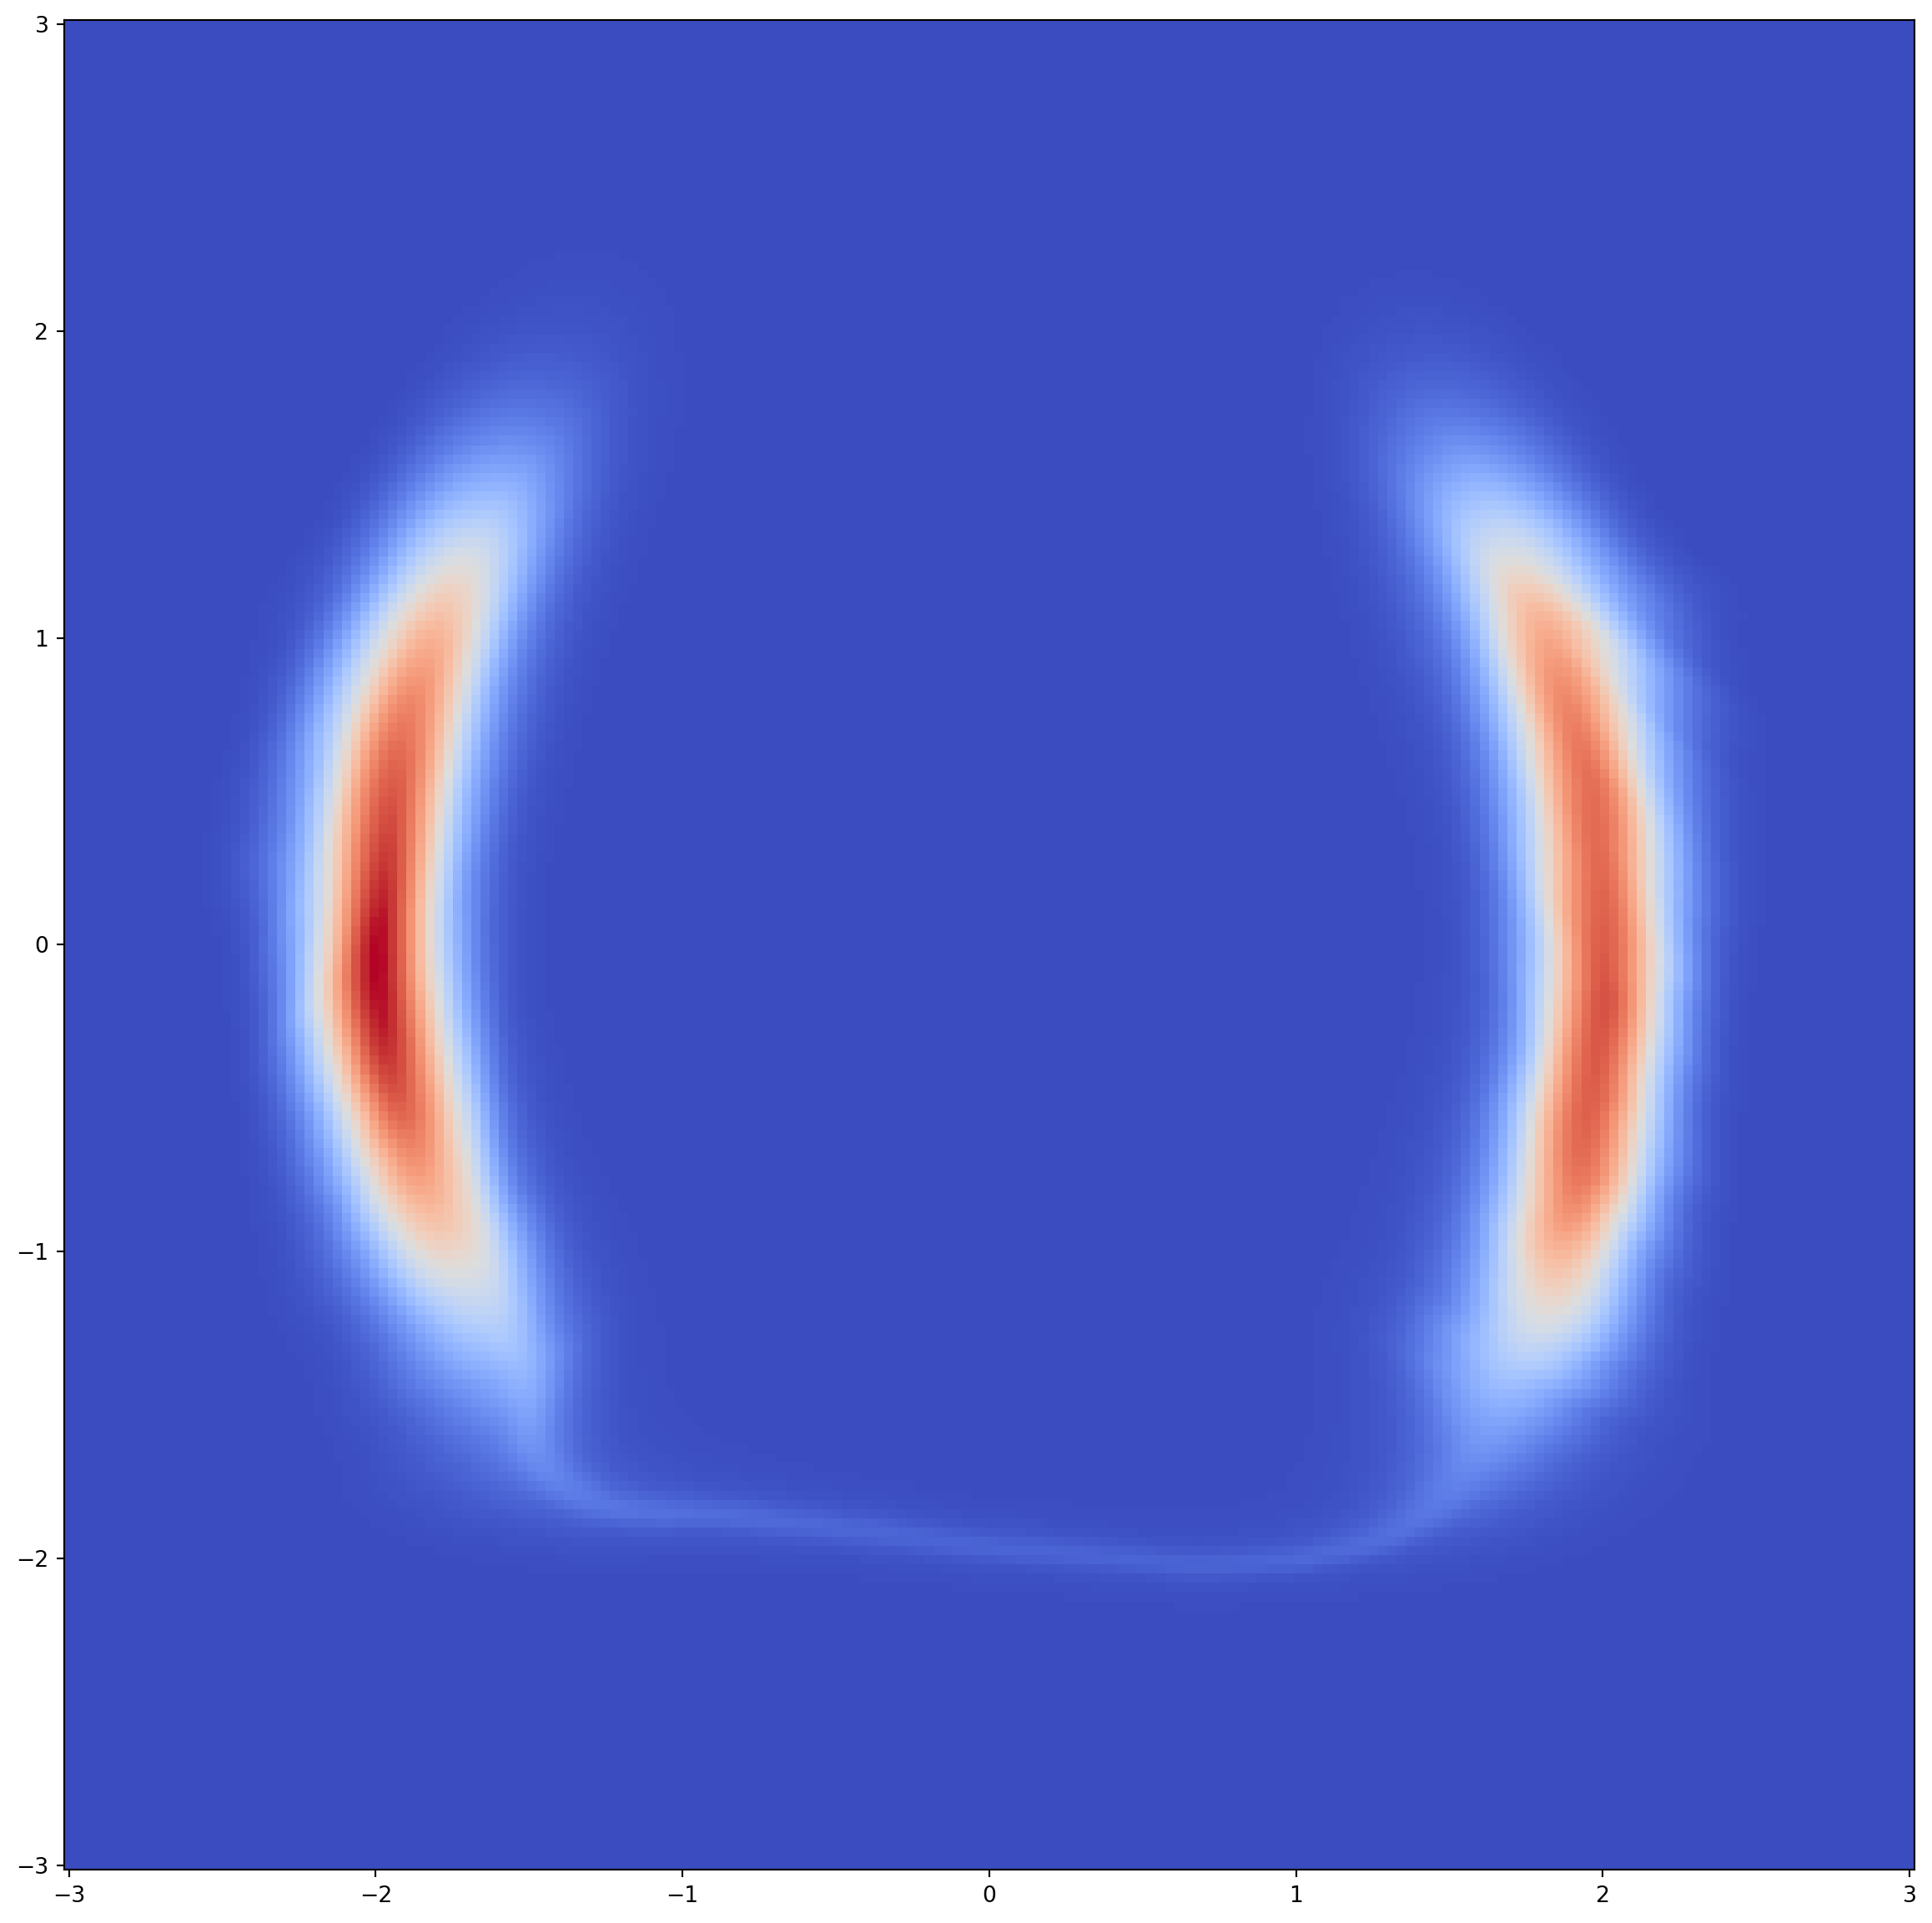

 13%|█▎        | 501/4000 [00:39<10:21,  5.63it/s]

 13%|█▎        | 503/4000 [00:39<08:37,  6.75it/s]

 13%|█▎        | 505/4000 [00:40<07:20,  7.94it/s]

 13%|█▎        | 507/4000 [00:40<06:26,  9.04it/s]

 13%|█▎        | 509/4000 [00:40<05:48, 10.01it/s]

 13%|█▎        | 511/4000 [00:40<05:27, 10.64it/s]

 13%|█▎        | 513/4000 [00:40<05:09, 11.26it/s]

 13%|█▎        | 515/4000 [00:40<04:54, 11.83it/s]

 13%|█▎        | 517/4000 [00:40<04:44, 12.26it/s]

 13%|█▎        | 519/4000 [00:41<04:36, 12.58it/s]

 13%|█▎        | 521/4000 [00:41<04:33, 12.73it/s]

 13%|█▎        | 523/4000 [00:41<04:34, 12.65it/s]

 13%|█▎        | 525/4000 [00:41<04:32, 12.77it/s]

 13%|█▎        | 527/4000 [00:41<04:28, 12.95it/s]

 13%|█▎        | 529/4000 [00:41<04:26, 13.05it/s]

 13%|█▎        | 531/4000 [00:42<04:23, 13.16it/s]

 13%|█▎        | 533/4000 [00:42<04:21, 13.27it/s]

 13%|█▎        | 535/4000 [00:42<04:20, 13.31it/s]

 13%|█▎        | 537/4000 [00:42<04:19, 13.36it/s]

 13%|█▎        | 539/4000 [00:42<04:19, 13.35it/s]

 14%|█▎        | 541/4000 [00:42<04:17, 13.41it/s]

 14%|█▎        | 543/4000 [00:42<04:17, 13.43it/s]

 14%|█▎        | 545/4000 [00:43<04:16, 13.46it/s]

 14%|█▎        | 547/4000 [00:43<04:16, 13.44it/s]

 14%|█▎        | 549/4000 [00:43<04:16, 13.44it/s]

 14%|█▍        | 551/4000 [00:43<04:16, 13.46it/s]

 14%|█▍        | 553/4000 [00:43<04:16, 13.42it/s]

 14%|█▍        | 555/4000 [00:43<04:16, 13.45it/s]

 14%|█▍        | 557/4000 [00:43<04:16, 13.42it/s]

 14%|█▍        | 559/4000 [00:44<04:15, 13.47it/s]

 14%|█▍        | 561/4000 [00:44<04:15, 13.48it/s]

 14%|█▍        | 563/4000 [00:44<04:14, 13.48it/s]

 14%|█▍        | 565/4000 [00:44<04:14, 13.47it/s]

 14%|█▍        | 567/4000 [00:44<04:14, 13.50it/s]

 14%|█▍        | 569/4000 [00:44<04:13, 13.53it/s]

 14%|█▍        | 571/4000 [00:44<04:13, 13.51it/s]

 14%|█▍        | 573/4000 [00:45<04:14, 13.47it/s]

 14%|█▍        | 575/4000 [00:45<04:14, 13.47it/s]

 14%|█▍        | 577/4000 [00:45<04:13, 13.49it/s]

 14%|█▍        | 579/4000 [00:45<04:13, 13.52it/s]

 15%|█▍        | 581/4000 [00:45<04:13, 13.50it/s]

 15%|█▍        | 583/4000 [00:45<04:13, 13.48it/s]

 15%|█▍        | 585/4000 [00:46<04:13, 13.45it/s]

 15%|█▍        | 587/4000 [00:46<04:14, 13.43it/s]

 15%|█▍        | 589/4000 [00:46<04:13, 13.47it/s]

 15%|█▍        | 591/4000 [00:46<04:12, 13.49it/s]

 15%|█▍        | 593/4000 [00:46<04:12, 13.50it/s]

 15%|█▍        | 595/4000 [00:46<04:12, 13.51it/s]

 15%|█▍        | 597/4000 [00:46<04:12, 13.48it/s]

 15%|█▍        | 599/4000 [00:47<04:11, 13.50it/s]

 15%|█▌        | 601/4000 [00:47<04:11, 13.49it/s]

 15%|█▌        | 603/4000 [00:47<04:11, 13.50it/s]

 15%|█▌        | 605/4000 [00:47<04:11, 13.50it/s]

 15%|█▌        | 607/4000 [00:47<04:11, 13.50it/s]

 15%|█▌        | 609/4000 [00:47<04:11, 13.49it/s]

 15%|█▌        | 611/4000 [00:47<04:11, 13.50it/s]

 15%|█▌        | 613/4000 [00:48<04:10, 13.51it/s]

 15%|█▌        | 615/4000 [00:48<04:10, 13.51it/s]

 15%|█▌        | 617/4000 [00:48<04:10, 13.53it/s]

 15%|█▌        | 619/4000 [00:48<04:09, 13.53it/s]

 16%|█▌        | 621/4000 [00:48<04:09, 13.56it/s]

 16%|█▌        | 623/4000 [00:48<04:09, 13.56it/s]

 16%|█▌        | 625/4000 [00:48<04:09, 13.53it/s]

 16%|█▌        | 627/4000 [00:49<04:09, 13.52it/s]

 16%|█▌        | 629/4000 [00:49<04:09, 13.50it/s]

 16%|█▌        | 631/4000 [00:49<04:09, 13.51it/s]

 16%|█▌        | 633/4000 [00:49<04:08, 13.53it/s]

 16%|█▌        | 635/4000 [00:49<04:08, 13.56it/s]

 16%|█▌        | 637/4000 [00:49<04:07, 13.58it/s]

 16%|█▌        | 639/4000 [00:50<04:07, 13.59it/s]

 16%|█▌        | 641/4000 [00:50<04:08, 13.53it/s]

 16%|█▌        | 643/4000 [00:50<04:08, 13.51it/s]

 16%|█▌        | 645/4000 [00:50<04:07, 13.53it/s]

 16%|█▌        | 647/4000 [00:50<04:07, 13.55it/s]

 16%|█▌        | 649/4000 [00:50<04:07, 13.57it/s]

 16%|█▋        | 651/4000 [00:50<04:06, 13.56it/s]

 16%|█▋        | 653/4000 [00:51<04:07, 13.52it/s]

 16%|█▋        | 655/4000 [00:51<04:06, 13.55it/s]

 16%|█▋        | 657/4000 [00:51<04:07, 13.53it/s]

 16%|█▋        | 659/4000 [00:51<04:06, 13.55it/s]

 17%|█▋        | 661/4000 [00:51<04:06, 13.53it/s]

 17%|█▋        | 663/4000 [00:51<04:06, 13.53it/s]

 17%|█▋        | 665/4000 [00:51<04:06, 13.51it/s]

 17%|█▋        | 667/4000 [00:52<04:07, 13.44it/s]

 17%|█▋        | 669/4000 [00:52<04:07, 13.47it/s]

 17%|█▋        | 671/4000 [00:52<04:08, 13.41it/s]

 17%|█▋        | 673/4000 [00:52<04:07, 13.44it/s]

 17%|█▋        | 675/4000 [00:52<04:07, 13.42it/s]

 17%|█▋        | 677/4000 [00:52<04:07, 13.44it/s]

 17%|█▋        | 679/4000 [00:52<04:07, 13.44it/s]

 17%|█▋        | 681/4000 [00:53<04:08, 13.37it/s]

 17%|█▋        | 683/4000 [00:53<04:08, 13.32it/s]

 17%|█▋        | 685/4000 [00:53<04:07, 13.40it/s]

 17%|█▋        | 687/4000 [00:53<04:07, 13.40it/s]

 17%|█▋        | 689/4000 [00:53<04:07, 13.37it/s]

 17%|█▋        | 691/4000 [00:53<04:06, 13.43it/s]

 17%|█▋        | 693/4000 [00:54<04:05, 13.46it/s]

 17%|█▋        | 695/4000 [00:54<04:05, 13.45it/s]

 17%|█▋        | 697/4000 [00:54<04:04, 13.51it/s]

 17%|█▋        | 699/4000 [00:54<04:04, 13.52it/s]

 18%|█▊        | 701/4000 [00:54<04:03, 13.53it/s]

 18%|█▊        | 703/4000 [00:54<04:03, 13.53it/s]

 18%|█▊        | 705/4000 [00:54<04:03, 13.52it/s]

 18%|█▊        | 707/4000 [00:55<04:03, 13.50it/s]

 18%|█▊        | 709/4000 [00:55<04:03, 13.51it/s]

 18%|█▊        | 711/4000 [00:55<04:03, 13.53it/s]

 18%|█▊        | 713/4000 [00:55<04:03, 13.52it/s]

 18%|█▊        | 715/4000 [00:55<04:03, 13.51it/s]

 18%|█▊        | 717/4000 [00:55<04:03, 13.51it/s]

 18%|█▊        | 719/4000 [00:55<04:02, 13.52it/s]

 18%|█▊        | 721/4000 [00:56<04:02, 13.53it/s]

 18%|█▊        | 723/4000 [00:56<04:02, 13.54it/s]

 18%|█▊        | 725/4000 [00:56<04:01, 13.54it/s]

 18%|█▊        | 727/4000 [00:56<04:02, 13.50it/s]

 18%|█▊        | 729/4000 [00:56<04:02, 13.51it/s]

 18%|█▊        | 731/4000 [00:56<04:01, 13.52it/s]

 18%|█▊        | 733/4000 [00:56<04:01, 13.50it/s]

 18%|█▊        | 735/4000 [00:57<04:01, 13.50it/s]

 18%|█▊        | 737/4000 [00:57<04:00, 13.54it/s]

 18%|█▊        | 739/4000 [00:57<04:01, 13.52it/s]

 19%|█▊        | 741/4000 [00:57<04:00, 13.54it/s]

 19%|█▊        | 743/4000 [00:57<04:00, 13.53it/s]

 19%|█▊        | 745/4000 [00:57<04:00, 13.51it/s]

 19%|█▊        | 747/4000 [00:58<04:00, 13.52it/s]

 19%|█▊        | 749/4000 [00:58<04:00, 13.51it/s]

 19%|█▉        | 751/4000 [00:58<04:00, 13.53it/s]

 19%|█▉        | 753/4000 [00:58<04:00, 13.53it/s]

 19%|█▉        | 755/4000 [00:58<03:59, 13.55it/s]

 19%|█▉        | 757/4000 [00:58<03:59, 13.55it/s]

 19%|█▉        | 759/4000 [00:58<03:59, 13.55it/s]

 19%|█▉        | 761/4000 [00:59<03:59, 13.55it/s]

 19%|█▉        | 763/4000 [00:59<03:59, 13.52it/s]

 19%|█▉        | 765/4000 [00:59<03:58, 13.54it/s]

 19%|█▉        | 767/4000 [00:59<03:58, 13.54it/s]

 19%|█▉        | 769/4000 [00:59<03:59, 13.49it/s]

 19%|█▉        | 771/4000 [00:59<03:59, 13.49it/s]

 19%|█▉        | 773/4000 [00:59<03:58, 13.51it/s]

 19%|█▉        | 775/4000 [01:00<03:58, 13.52it/s]

 19%|█▉        | 777/4000 [01:00<03:58, 13.54it/s]

 19%|█▉        | 779/4000 [01:00<03:58, 13.50it/s]

 20%|█▉        | 781/4000 [01:00<03:58, 13.50it/s]

 20%|█▉        | 783/4000 [01:00<03:58, 13.49it/s]

 20%|█▉        | 785/4000 [01:00<03:58, 13.48it/s]

 20%|█▉        | 787/4000 [01:00<03:58, 13.49it/s]

 20%|█▉        | 789/4000 [01:01<03:58, 13.47it/s]

 20%|█▉        | 791/4000 [01:01<03:57, 13.49it/s]

 20%|█▉        | 793/4000 [01:01<03:58, 13.47it/s]

 20%|█▉        | 795/4000 [01:01<03:57, 13.50it/s]

 20%|█▉        | 797/4000 [01:01<03:57, 13.50it/s]

 20%|█▉        | 799/4000 [01:01<03:57, 13.50it/s]

 20%|██        | 801/4000 [01:02<03:56, 13.53it/s]

 20%|██        | 803/4000 [01:02<03:56, 13.49it/s]

 20%|██        | 805/4000 [01:02<03:56, 13.51it/s]

 20%|██        | 807/4000 [01:02<03:56, 13.53it/s]

 20%|██        | 809/4000 [01:02<03:55, 13.56it/s]

 20%|██        | 811/4000 [01:02<03:55, 13.55it/s]

 20%|██        | 813/4000 [01:02<03:55, 13.55it/s]

 20%|██        | 815/4000 [01:03<03:55, 13.54it/s]

 20%|██        | 817/4000 [01:03<03:55, 13.53it/s]

 20%|██        | 819/4000 [01:03<03:55, 13.51it/s]

 21%|██        | 821/4000 [01:03<03:54, 13.53it/s]

 21%|██        | 823/4000 [01:03<03:54, 13.54it/s]

 21%|██        | 825/4000 [01:03<03:54, 13.54it/s]

 21%|██        | 827/4000 [01:03<03:54, 13.54it/s]

 21%|██        | 829/4000 [01:04<03:54, 13.54it/s]

 21%|██        | 831/4000 [01:04<03:54, 13.53it/s]

 21%|██        | 833/4000 [01:04<03:54, 13.53it/s]

 21%|██        | 835/4000 [01:04<03:53, 13.54it/s]

 21%|██        | 837/4000 [01:04<03:54, 13.51it/s]

 21%|██        | 839/4000 [01:04<03:54, 13.49it/s]

 21%|██        | 841/4000 [01:04<03:54, 13.49it/s]

 21%|██        | 843/4000 [01:05<03:54, 13.44it/s]

 21%|██        | 845/4000 [01:05<03:54, 13.47it/s]

 21%|██        | 847/4000 [01:05<03:53, 13.51it/s]

 21%|██        | 849/4000 [01:05<03:53, 13.49it/s]

 21%|██▏       | 851/4000 [01:05<03:53, 13.50it/s]

 21%|██▏       | 853/4000 [01:05<03:53, 13.49it/s]

 21%|██▏       | 855/4000 [01:06<03:53, 13.50it/s]

 21%|██▏       | 857/4000 [01:06<03:52, 13.50it/s]

 21%|██▏       | 859/4000 [01:06<03:52, 13.53it/s]

 22%|██▏       | 861/4000 [01:06<03:51, 13.57it/s]

 22%|██▏       | 863/4000 [01:06<03:51, 13.56it/s]

 22%|██▏       | 865/4000 [01:06<03:52, 13.50it/s]

 22%|██▏       | 867/4000 [01:06<03:51, 13.53it/s]

 22%|██▏       | 869/4000 [01:07<03:52, 13.47it/s]

 22%|██▏       | 871/4000 [01:07<03:51, 13.51it/s]

 22%|██▏       | 873/4000 [01:07<03:53, 13.39it/s]

 22%|██▏       | 875/4000 [01:07<03:53, 13.40it/s]

 22%|██▏       | 877/4000 [01:07<03:53, 13.39it/s]

 22%|██▏       | 879/4000 [01:07<03:52, 13.43it/s]

 22%|██▏       | 881/4000 [01:07<03:51, 13.47it/s]

 22%|██▏       | 883/4000 [01:08<03:50, 13.50it/s]

 22%|██▏       | 885/4000 [01:08<03:50, 13.49it/s]

 22%|██▏       | 887/4000 [01:08<03:50, 13.48it/s]

 22%|██▏       | 889/4000 [01:08<03:50, 13.52it/s]

 22%|██▏       | 891/4000 [01:08<03:49, 13.54it/s]

 22%|██▏       | 893/4000 [01:08<03:49, 13.55it/s]

 22%|██▏       | 895/4000 [01:08<03:49, 13.51it/s]

 22%|██▏       | 897/4000 [01:09<03:48, 13.58it/s]

 22%|██▏       | 899/4000 [01:09<03:48, 13.56it/s]

 23%|██▎       | 901/4000 [01:09<03:48, 13.57it/s]

 23%|██▎       | 903/4000 [01:09<03:49, 13.49it/s]

 23%|██▎       | 905/4000 [01:09<03:49, 13.49it/s]

 23%|██▎       | 907/4000 [01:09<03:49, 13.45it/s]

 23%|██▎       | 909/4000 [01:10<03:49, 13.50it/s]

 23%|██▎       | 911/4000 [01:10<03:48, 13.50it/s]

 23%|██▎       | 913/4000 [01:10<03:47, 13.55it/s]

 23%|██▎       | 915/4000 [01:10<03:47, 13.56it/s]

 23%|██▎       | 917/4000 [01:10<03:47, 13.57it/s]

 23%|██▎       | 919/4000 [01:10<03:47, 13.54it/s]

 23%|██▎       | 921/4000 [01:10<03:47, 13.55it/s]

 23%|██▎       | 923/4000 [01:11<03:47, 13.54it/s]

 23%|██▎       | 925/4000 [01:11<03:47, 13.54it/s]

 23%|██▎       | 927/4000 [01:11<03:47, 13.51it/s]

 23%|██▎       | 929/4000 [01:11<03:47, 13.51it/s]

 23%|██▎       | 931/4000 [01:11<03:46, 13.54it/s]

 23%|██▎       | 933/4000 [01:11<03:47, 13.50it/s]

 23%|██▎       | 935/4000 [01:11<03:46, 13.52it/s]

 23%|██▎       | 937/4000 [01:12<03:46, 13.54it/s]

 23%|██▎       | 939/4000 [01:12<03:45, 13.56it/s]

 24%|██▎       | 941/4000 [01:12<03:46, 13.51it/s]

 24%|██▎       | 943/4000 [01:12<03:46, 13.50it/s]

 24%|██▎       | 945/4000 [01:12<03:45, 13.52it/s]

 24%|██▎       | 947/4000 [01:12<03:45, 13.57it/s]

 24%|██▎       | 949/4000 [01:12<03:45, 13.55it/s]

 24%|██▍       | 951/4000 [01:13<03:44, 13.57it/s]

 24%|██▍       | 953/4000 [01:13<03:44, 13.57it/s]

 24%|██▍       | 955/4000 [01:13<03:43, 13.59it/s]

 24%|██▍       | 957/4000 [01:13<03:43, 13.64it/s]

 24%|██▍       | 959/4000 [01:13<03:43, 13.61it/s]

 24%|██▍       | 961/4000 [01:13<03:43, 13.60it/s]

 24%|██▍       | 963/4000 [01:13<03:42, 13.62it/s]

 24%|██▍       | 965/4000 [01:14<03:42, 13.62it/s]

 24%|██▍       | 967/4000 [01:14<03:43, 13.59it/s]

 24%|██▍       | 969/4000 [01:14<03:42, 13.60it/s]

 24%|██▍       | 971/4000 [01:14<03:42, 13.62it/s]

 24%|██▍       | 973/4000 [01:14<03:41, 13.65it/s]

 24%|██▍       | 975/4000 [01:14<03:40, 13.69it/s]

 24%|██▍       | 977/4000 [01:15<03:40, 13.71it/s]

 24%|██▍       | 979/4000 [01:15<03:41, 13.66it/s]

 25%|██▍       | 981/4000 [01:15<03:41, 13.63it/s]

 25%|██▍       | 983/4000 [01:15<03:41, 13.62it/s]

 25%|██▍       | 985/4000 [01:15<03:41, 13.60it/s]

 25%|██▍       | 987/4000 [01:15<03:41, 13.60it/s]

 25%|██▍       | 989/4000 [01:15<03:41, 13.60it/s]

 25%|██▍       | 991/4000 [01:16<03:40, 13.63it/s]

 25%|██▍       | 993/4000 [01:16<03:40, 13.64it/s]

 25%|██▍       | 995/4000 [01:16<03:40, 13.63it/s]

 25%|██▍       | 997/4000 [01:16<03:40, 13.64it/s]

 25%|██▍       | 999/4000 [01:16<03:39, 13.65it/s]

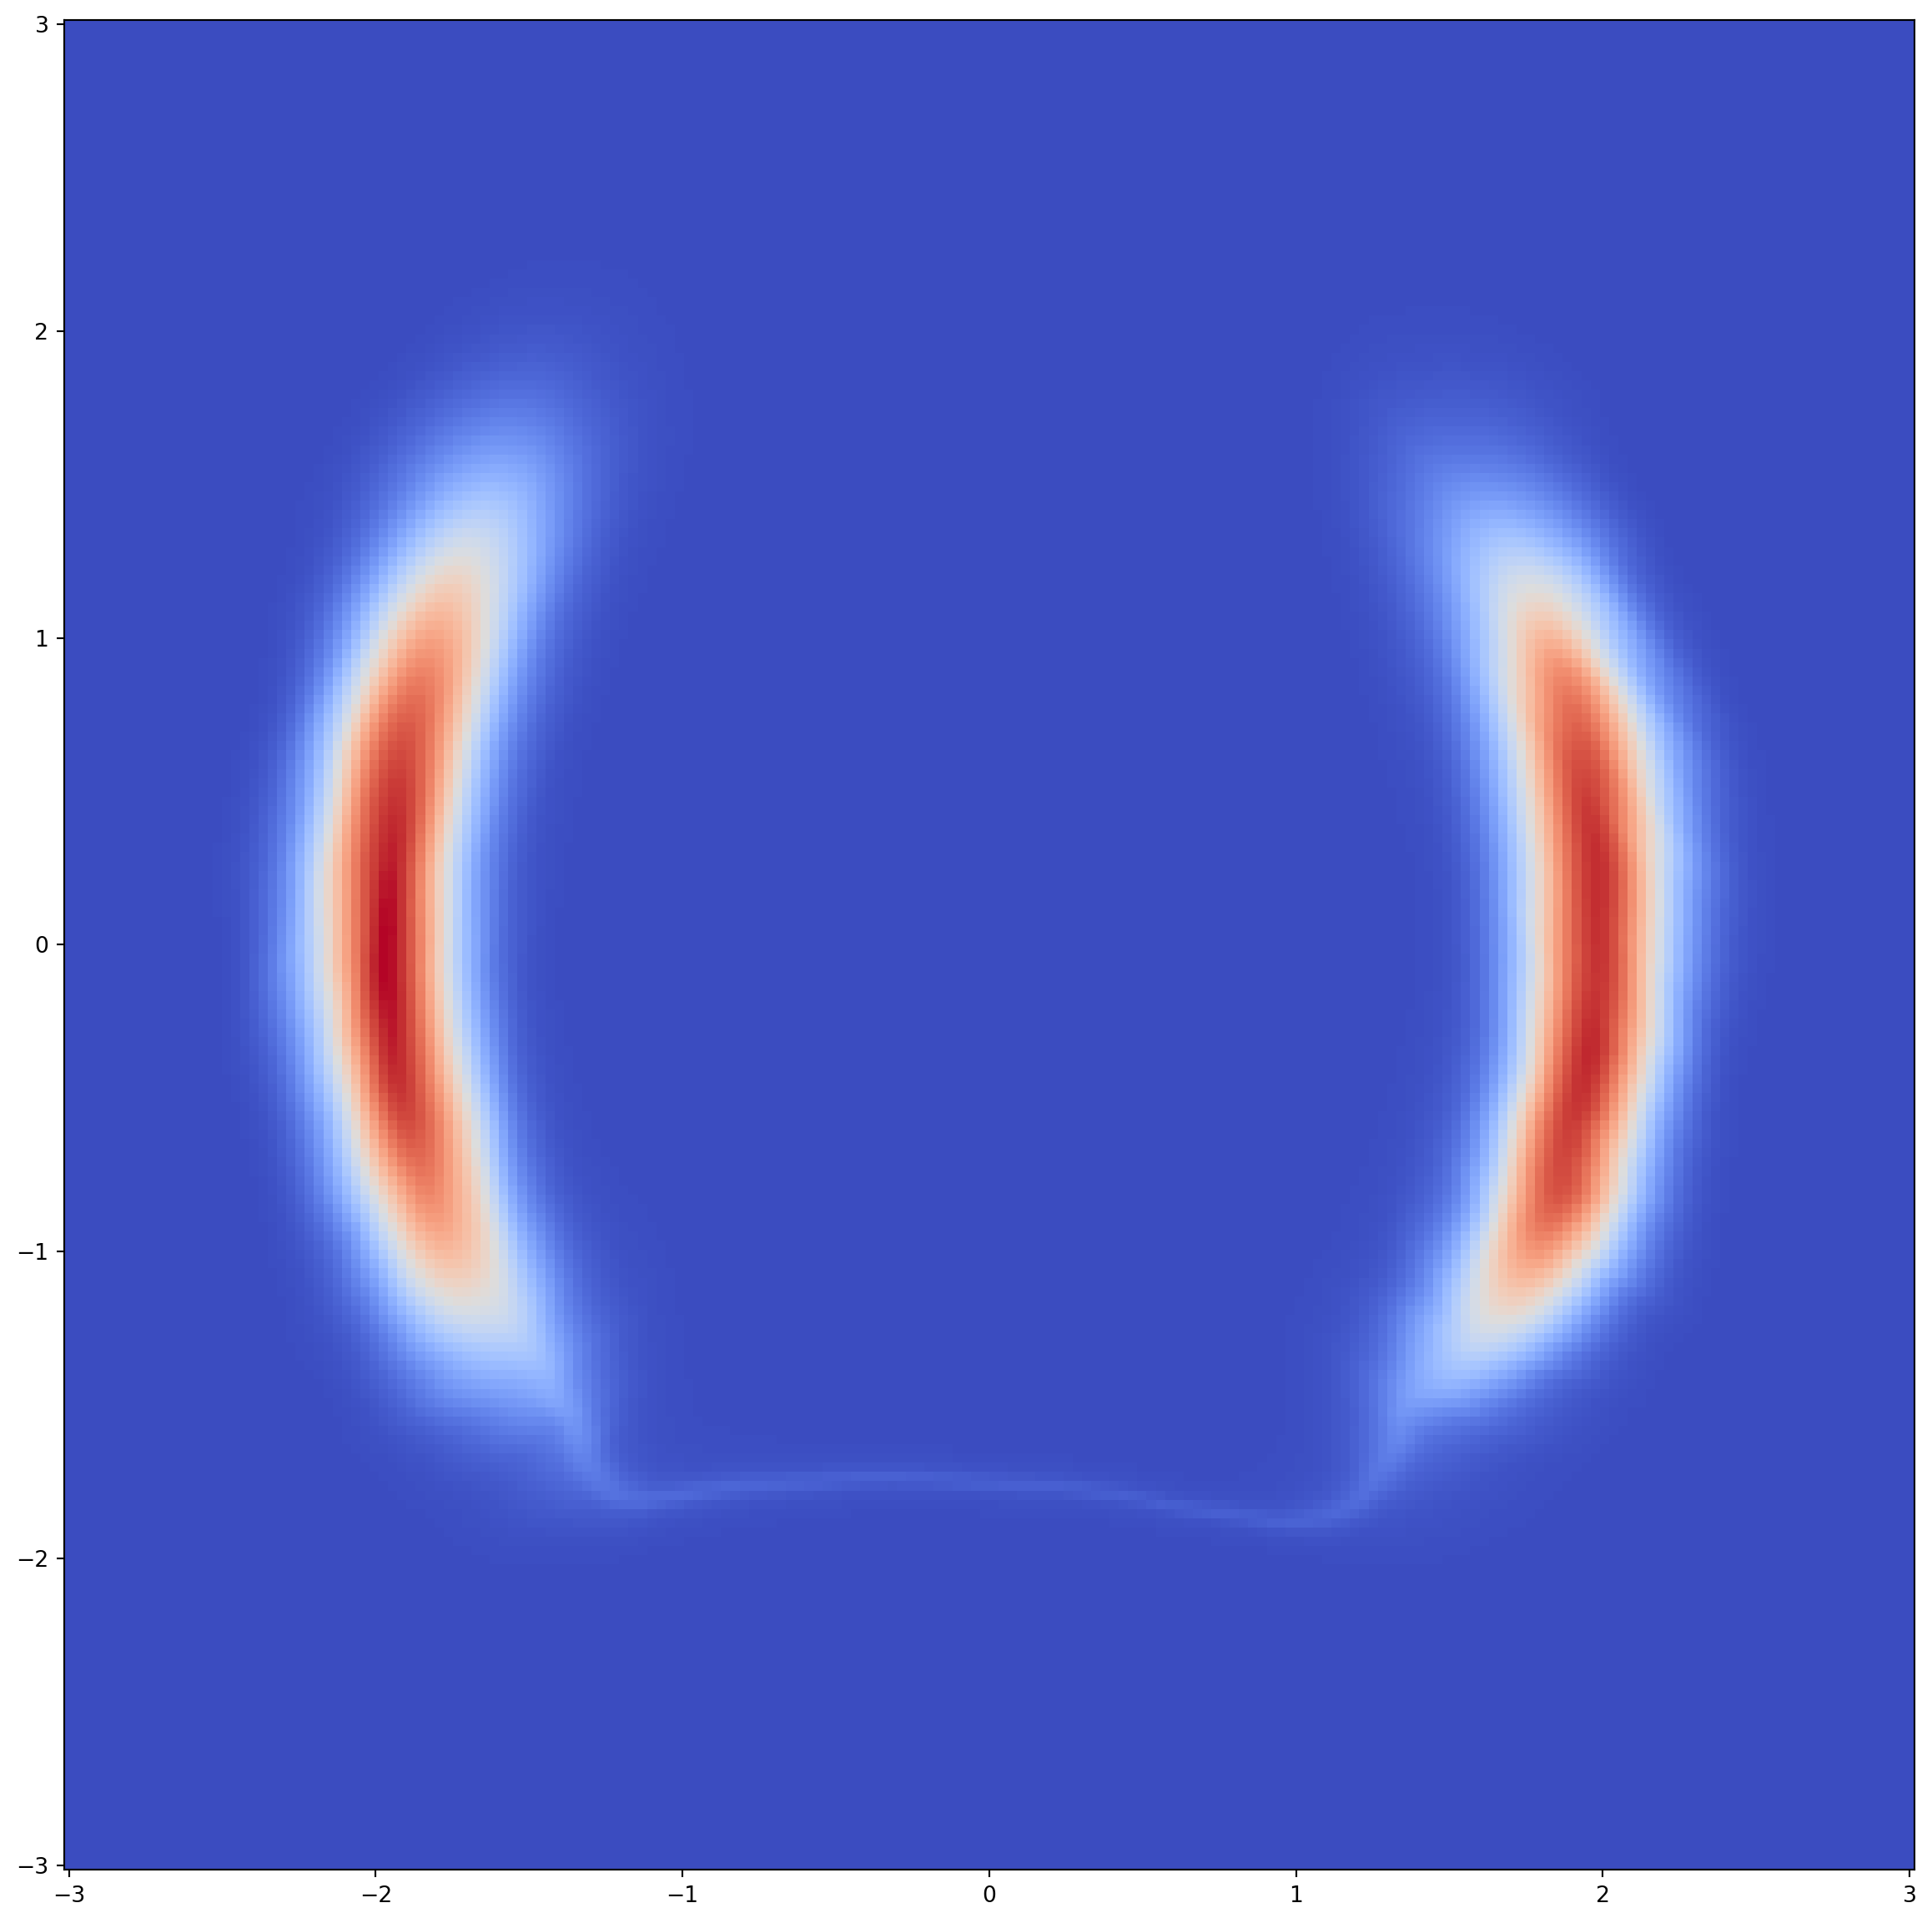

 25%|██▌       | 1001/4000 [01:17<08:20,  5.99it/s]

 25%|██▌       | 1003/4000 [01:17<06:57,  7.18it/s]

 25%|██▌       | 1005/4000 [01:17<05:58,  8.36it/s]

 25%|██▌       | 1007/4000 [01:17<05:16,  9.44it/s]

 25%|██▌       | 1009/4000 [01:17<04:48, 10.38it/s]

 25%|██▌       | 1011/4000 [01:18<04:28, 11.12it/s]

 25%|██▌       | 1013/4000 [01:18<04:14, 11.74it/s]

 25%|██▌       | 1015/4000 [01:18<04:04, 12.20it/s]

 25%|██▌       | 1017/4000 [01:18<03:57, 12.56it/s]

 25%|██▌       | 1019/4000 [01:18<03:52, 12.85it/s]

 26%|██▌       | 1021/4000 [01:18<03:49, 13.00it/s]

 26%|██▌       | 1023/4000 [01:19<03:46, 13.15it/s]

 26%|██▌       | 1025/4000 [01:19<03:44, 13.24it/s]

 26%|██▌       | 1027/4000 [01:19<03:43, 13.31it/s]

 26%|██▌       | 1029/4000 [01:19<03:42, 13.36it/s]

 26%|██▌       | 1031/4000 [01:19<03:41, 13.41it/s]

 26%|██▌       | 1033/4000 [01:19<03:40, 13.44it/s]

 26%|██▌       | 1035/4000 [01:19<03:40, 13.47it/s]

 26%|██▌       | 1037/4000 [01:20<03:39, 13.50it/s]

 26%|██▌       | 1039/4000 [01:20<03:39, 13.50it/s]

 26%|██▌       | 1041/4000 [01:20<03:39, 13.51it/s]

 26%|██▌       | 1043/4000 [01:20<03:38, 13.51it/s]

 26%|██▌       | 1045/4000 [01:20<03:38, 13.50it/s]

 26%|██▌       | 1047/4000 [01:20<03:39, 13.44it/s]

 26%|██▌       | 1049/4000 [01:20<03:39, 13.43it/s]

 26%|██▋       | 1051/4000 [01:21<03:38, 13.48it/s]

 26%|██▋       | 1053/4000 [01:21<03:37, 13.53it/s]

 26%|██▋       | 1055/4000 [01:21<03:37, 13.53it/s]

 26%|██▋       | 1057/4000 [01:21<03:37, 13.55it/s]

 26%|██▋       | 1059/4000 [01:21<03:37, 13.51it/s]

 27%|██▋       | 1061/4000 [01:21<03:37, 13.51it/s]

 27%|██▋       | 1063/4000 [01:21<03:37, 13.51it/s]

 27%|██▋       | 1065/4000 [01:22<03:37, 13.51it/s]

 27%|██▋       | 1067/4000 [01:22<03:36, 13.54it/s]

 27%|██▋       | 1069/4000 [01:22<03:36, 13.56it/s]

 27%|██▋       | 1071/4000 [01:22<03:36, 13.53it/s]

 27%|██▋       | 1073/4000 [01:22<03:36, 13.54it/s]

 27%|██▋       | 1075/4000 [01:22<03:36, 13.49it/s]

 27%|██▋       | 1077/4000 [01:23<03:38, 13.39it/s]

 27%|██▋       | 1079/4000 [01:23<03:38, 13.37it/s]

 27%|██▋       | 1081/4000 [01:23<03:37, 13.41it/s]

 27%|██▋       | 1083/4000 [01:23<03:38, 13.36it/s]

 27%|██▋       | 1085/4000 [01:23<03:37, 13.42it/s]

 27%|██▋       | 1087/4000 [01:23<03:36, 13.44it/s]

 27%|██▋       | 1089/4000 [01:23<03:36, 13.44it/s]

 27%|██▋       | 1091/4000 [01:24<03:37, 13.40it/s]

 27%|██▋       | 1093/4000 [01:24<03:36, 13.45it/s]

 27%|██▋       | 1095/4000 [01:24<03:35, 13.47it/s]

 27%|██▋       | 1097/4000 [01:24<03:35, 13.49it/s]

 27%|██▋       | 1099/4000 [01:24<03:34, 13.52it/s]

 28%|██▊       | 1101/4000 [01:24<03:34, 13.49it/s]

 28%|██▊       | 1103/4000 [01:24<03:34, 13.51it/s]

 28%|██▊       | 1105/4000 [01:25<03:34, 13.50it/s]

 28%|██▊       | 1107/4000 [01:25<03:34, 13.51it/s]

 28%|██▊       | 1109/4000 [01:25<03:33, 13.51it/s]

 28%|██▊       | 1111/4000 [01:25<03:33, 13.53it/s]

 28%|██▊       | 1113/4000 [01:25<03:33, 13.50it/s]

 28%|██▊       | 1115/4000 [01:25<03:33, 13.52it/s]

 28%|██▊       | 1117/4000 [01:25<03:33, 13.52it/s]

 28%|██▊       | 1119/4000 [01:26<03:33, 13.52it/s]

 28%|██▊       | 1121/4000 [01:26<03:33, 13.51it/s]

 28%|██▊       | 1123/4000 [01:26<03:33, 13.48it/s]

 28%|██▊       | 1125/4000 [01:26<03:52, 12.35it/s]

 28%|██▊       | 1127/4000 [01:26<03:46, 12.67it/s]

 28%|██▊       | 1129/4000 [01:26<03:42, 12.91it/s]

 28%|██▊       | 1131/4000 [01:27<03:38, 13.11it/s]

 28%|██▊       | 1133/4000 [01:27<03:36, 13.26it/s]

 28%|██▊       | 1135/4000 [01:27<03:35, 13.31it/s]

 28%|██▊       | 1137/4000 [01:27<03:33, 13.38it/s]

 28%|██▊       | 1139/4000 [01:27<03:32, 13.44it/s]

 29%|██▊       | 1141/4000 [01:27<03:32, 13.47it/s]

 29%|██▊       | 1143/4000 [01:27<03:32, 13.46it/s]

 29%|██▊       | 1145/4000 [01:28<03:31, 13.48it/s]

 29%|██▊       | 1147/4000 [01:28<03:31, 13.51it/s]

 29%|██▊       | 1149/4000 [01:28<03:30, 13.53it/s]

 29%|██▉       | 1151/4000 [01:28<03:30, 13.55it/s]

 29%|██▉       | 1153/4000 [01:28<03:29, 13.57it/s]

 29%|██▉       | 1155/4000 [01:28<03:29, 13.56it/s]

 29%|██▉       | 1157/4000 [01:28<03:29, 13.57it/s]

 29%|██▉       | 1159/4000 [01:29<03:29, 13.57it/s]

 29%|██▉       | 1161/4000 [01:29<03:29, 13.56it/s]

 29%|██▉       | 1163/4000 [01:29<03:29, 13.52it/s]

 29%|██▉       | 1165/4000 [01:29<03:29, 13.54it/s]

 29%|██▉       | 1167/4000 [01:29<03:30, 13.48it/s]

 29%|██▉       | 1169/4000 [01:29<03:29, 13.49it/s]

 29%|██▉       | 1171/4000 [01:30<03:30, 13.45it/s]

 29%|██▉       | 1173/4000 [01:30<03:29, 13.50it/s]

 29%|██▉       | 1175/4000 [01:30<03:29, 13.49it/s]

 29%|██▉       | 1177/4000 [01:30<03:29, 13.49it/s]

 29%|██▉       | 1179/4000 [01:30<03:30, 13.41it/s]

 30%|██▉       | 1181/4000 [01:30<03:29, 13.42it/s]

 30%|██▉       | 1183/4000 [01:30<03:29, 13.45it/s]

 30%|██▉       | 1185/4000 [01:31<03:28, 13.47it/s]

 30%|██▉       | 1187/4000 [01:31<03:28, 13.51it/s]

 30%|██▉       | 1189/4000 [01:31<03:27, 13.52it/s]

 30%|██▉       | 1191/4000 [01:31<03:28, 13.49it/s]

 30%|██▉       | 1193/4000 [01:31<03:28, 13.48it/s]

 30%|██▉       | 1195/4000 [01:31<03:27, 13.49it/s]

 30%|██▉       | 1197/4000 [01:31<03:27, 13.53it/s]

 30%|██▉       | 1199/4000 [01:32<03:26, 13.57it/s]

 30%|███       | 1201/4000 [01:32<03:26, 13.54it/s]

 30%|███       | 1203/4000 [01:32<03:26, 13.56it/s]

 30%|███       | 1205/4000 [01:32<03:28, 13.41it/s]

 30%|███       | 1207/4000 [01:32<03:28, 13.40it/s]

 30%|███       | 1209/4000 [01:32<03:28, 13.38it/s]

 30%|███       | 1211/4000 [01:33<03:27, 13.43it/s]

 30%|███       | 1213/4000 [01:33<03:27, 13.44it/s]

 30%|███       | 1215/4000 [01:33<03:26, 13.49it/s]

 30%|███       | 1217/4000 [01:33<03:25, 13.51it/s]

 30%|███       | 1219/4000 [01:33<03:27, 13.42it/s]

 31%|███       | 1221/4000 [01:33<03:26, 13.45it/s]

 31%|███       | 1223/4000 [01:33<03:26, 13.45it/s]

 31%|███       | 1225/4000 [01:34<03:29, 13.24it/s]

 31%|███       | 1227/4000 [01:34<03:29, 13.22it/s]

 31%|███       | 1229/4000 [01:34<03:28, 13.28it/s]

 31%|███       | 1231/4000 [01:34<03:27, 13.34it/s]

 31%|███       | 1233/4000 [01:34<03:26, 13.39it/s]

 31%|███       | 1235/4000 [01:34<03:27, 13.35it/s]

 31%|███       | 1237/4000 [01:34<03:26, 13.39it/s]

 31%|███       | 1239/4000 [01:35<03:26, 13.37it/s]

 31%|███       | 1241/4000 [01:35<03:26, 13.39it/s]

 31%|███       | 1243/4000 [01:35<03:25, 13.42it/s]

 31%|███       | 1245/4000 [01:35<03:24, 13.46it/s]

 31%|███       | 1247/4000 [01:35<03:24, 13.44it/s]

 31%|███       | 1249/4000 [01:35<03:24, 13.44it/s]

 31%|███▏      | 1251/4000 [01:35<03:23, 13.50it/s]

 31%|███▏      | 1253/4000 [01:36<03:24, 13.46it/s]

 31%|███▏      | 1255/4000 [01:36<03:23, 13.51it/s]

 31%|███▏      | 1257/4000 [01:36<03:23, 13.51it/s]

 31%|███▏      | 1259/4000 [01:36<03:22, 13.54it/s]

 32%|███▏      | 1261/4000 [01:36<03:22, 13.55it/s]

 32%|███▏      | 1263/4000 [01:36<03:22, 13.55it/s]

 32%|███▏      | 1265/4000 [01:37<03:21, 13.56it/s]

 32%|███▏      | 1267/4000 [01:37<03:21, 13.57it/s]

 32%|███▏      | 1269/4000 [01:37<03:21, 13.56it/s]

 32%|███▏      | 1271/4000 [01:37<03:21, 13.56it/s]

 32%|███▏      | 1273/4000 [01:37<03:21, 13.56it/s]

 32%|███▏      | 1275/4000 [01:37<03:21, 13.55it/s]

 32%|███▏      | 1277/4000 [01:37<03:20, 13.58it/s]

 32%|███▏      | 1279/4000 [01:38<03:20, 13.57it/s]

 32%|███▏      | 1281/4000 [01:38<03:20, 13.58it/s]

 32%|███▏      | 1283/4000 [01:38<03:20, 13.57it/s]

 32%|███▏      | 1285/4000 [01:38<03:20, 13.56it/s]

 32%|███▏      | 1287/4000 [01:38<03:19, 13.59it/s]

 32%|███▏      | 1289/4000 [01:38<03:19, 13.62it/s]

 32%|███▏      | 1291/4000 [01:38<03:19, 13.56it/s]

 32%|███▏      | 1293/4000 [01:39<03:19, 13.54it/s]

 32%|███▏      | 1295/4000 [01:39<03:19, 13.53it/s]

 32%|███▏      | 1297/4000 [01:39<03:19, 13.53it/s]

 32%|███▏      | 1299/4000 [01:39<03:19, 13.56it/s]

 33%|███▎      | 1301/4000 [01:39<03:20, 13.44it/s]

 33%|███▎      | 1303/4000 [01:39<03:20, 13.47it/s]

 33%|███▎      | 1305/4000 [01:39<03:19, 13.49it/s]

 33%|███▎      | 1307/4000 [01:40<03:19, 13.47it/s]

 33%|███▎      | 1309/4000 [01:40<03:20, 13.44it/s]

 33%|███▎      | 1311/4000 [01:40<03:29, 12.84it/s]

 33%|███▎      | 1313/4000 [01:40<03:29, 12.84it/s]

 33%|███▎      | 1315/4000 [01:40<03:28, 12.91it/s]

 33%|███▎      | 1317/4000 [01:40<03:24, 13.12it/s]

 33%|███▎      | 1319/4000 [01:41<03:21, 13.29it/s]

 33%|███▎      | 1321/4000 [01:41<03:20, 13.35it/s]

 33%|███▎      | 1323/4000 [01:41<03:18, 13.46it/s]

 33%|███▎      | 1325/4000 [01:41<03:17, 13.55it/s]

 33%|███▎      | 1327/4000 [01:41<03:24, 13.10it/s]

 33%|███▎      | 1329/4000 [01:41<03:24, 13.05it/s]

 33%|███▎      | 1331/4000 [01:41<03:22, 13.19it/s]

 33%|███▎      | 1333/4000 [01:42<03:19, 13.36it/s]

 33%|███▎      | 1335/4000 [01:42<03:17, 13.49it/s]

 33%|███▎      | 1337/4000 [01:42<03:16, 13.56it/s]

 33%|███▎      | 1339/4000 [01:42<03:15, 13.59it/s]

 34%|███▎      | 1341/4000 [01:42<03:15, 13.62it/s]

 34%|███▎      | 1343/4000 [01:42<03:14, 13.68it/s]

 34%|███▎      | 1345/4000 [01:42<03:14, 13.65it/s]

 34%|███▎      | 1347/4000 [01:43<03:14, 13.65it/s]

 34%|███▎      | 1349/4000 [01:43<03:13, 13.69it/s]

 34%|███▍      | 1351/4000 [01:43<03:13, 13.69it/s]

 34%|███▍      | 1353/4000 [01:43<03:13, 13.69it/s]

 34%|███▍      | 1355/4000 [01:43<03:12, 13.71it/s]

 34%|███▍      | 1357/4000 [01:43<03:12, 13.72it/s]

 34%|███▍      | 1359/4000 [01:43<03:13, 13.68it/s]

 34%|███▍      | 1361/4000 [01:44<03:12, 13.74it/s]

 34%|███▍      | 1363/4000 [01:44<03:11, 13.75it/s]

 34%|███▍      | 1365/4000 [01:44<03:11, 13.74it/s]

 34%|███▍      | 1367/4000 [01:44<03:11, 13.76it/s]

 34%|███▍      | 1369/4000 [01:44<03:10, 13.78it/s]

 34%|███▍      | 1371/4000 [01:44<03:10, 13.81it/s]

 34%|███▍      | 1373/4000 [01:45<03:11, 13.74it/s]

 34%|███▍      | 1375/4000 [01:45<03:10, 13.75it/s]

 34%|███▍      | 1377/4000 [01:45<03:10, 13.75it/s]

 34%|███▍      | 1379/4000 [01:45<03:10, 13.75it/s]

 35%|███▍      | 1381/4000 [01:45<03:11, 13.69it/s]

 35%|███▍      | 1383/4000 [01:45<03:10, 13.71it/s]

 35%|███▍      | 1385/4000 [01:45<03:10, 13.70it/s]

 35%|███▍      | 1387/4000 [01:46<03:10, 13.68it/s]

 35%|███▍      | 1389/4000 [01:46<03:10, 13.72it/s]

 35%|███▍      | 1391/4000 [01:46<03:09, 13.74it/s]

 35%|███▍      | 1393/4000 [01:46<03:10, 13.72it/s]

 35%|███▍      | 1395/4000 [01:46<03:09, 13.73it/s]

 35%|███▍      | 1397/4000 [01:46<03:09, 13.75it/s]

 35%|███▍      | 1399/4000 [01:46<03:08, 13.78it/s]

 35%|███▌      | 1401/4000 [01:47<03:08, 13.79it/s]

 35%|███▌      | 1403/4000 [01:47<03:09, 13.71it/s]

 35%|███▌      | 1405/4000 [01:47<03:09, 13.72it/s]

 35%|███▌      | 1407/4000 [01:47<03:08, 13.74it/s]

 35%|███▌      | 1409/4000 [01:47<03:08, 13.76it/s]

 35%|███▌      | 1411/4000 [01:47<03:07, 13.79it/s]

 35%|███▌      | 1413/4000 [01:47<03:07, 13.80it/s]

 35%|███▌      | 1415/4000 [01:48<03:07, 13.82it/s]

 35%|███▌      | 1417/4000 [01:48<03:07, 13.79it/s]

 35%|███▌      | 1419/4000 [01:48<03:07, 13.79it/s]

 36%|███▌      | 1421/4000 [01:48<03:07, 13.79it/s]

 36%|███▌      | 1423/4000 [01:48<03:06, 13.79it/s]

 36%|███▌      | 1425/4000 [01:48<03:07, 13.74it/s]

 36%|███▌      | 1427/4000 [01:48<03:07, 13.72it/s]

 36%|███▌      | 1429/4000 [01:49<03:07, 13.73it/s]

 36%|███▌      | 1431/4000 [01:49<03:07, 13.73it/s]

 36%|███▌      | 1433/4000 [01:49<03:07, 13.71it/s]

 36%|███▌      | 1435/4000 [01:49<03:06, 13.73it/s]

 36%|███▌      | 1437/4000 [01:49<03:06, 13.75it/s]

 36%|███▌      | 1439/4000 [01:49<03:06, 13.73it/s]

 36%|███▌      | 1441/4000 [01:49<03:06, 13.74it/s]

 36%|███▌      | 1443/4000 [01:50<03:06, 13.74it/s]

 36%|███▌      | 1445/4000 [01:50<03:05, 13.77it/s]

 36%|███▌      | 1447/4000 [01:50<03:05, 13.76it/s]

 36%|███▌      | 1449/4000 [01:50<03:05, 13.75it/s]

 36%|███▋      | 1451/4000 [01:50<03:05, 13.75it/s]

 36%|███▋      | 1453/4000 [01:50<03:04, 13.80it/s]

 36%|███▋      | 1455/4000 [01:50<03:05, 13.75it/s]

 36%|███▋      | 1457/4000 [01:51<03:05, 13.74it/s]

 36%|███▋      | 1459/4000 [01:51<03:04, 13.75it/s]

 37%|███▋      | 1461/4000 [01:51<03:04, 13.73it/s]

 37%|███▋      | 1463/4000 [01:51<03:05, 13.71it/s]

 37%|███▋      | 1465/4000 [01:51<03:04, 13.71it/s]

 37%|███▋      | 1467/4000 [01:51<03:05, 13.68it/s]

 37%|███▋      | 1469/4000 [01:52<03:05, 13.65it/s]

 37%|███▋      | 1471/4000 [01:52<03:04, 13.68it/s]

 37%|███▋      | 1473/4000 [01:52<03:04, 13.73it/s]

 37%|███▋      | 1475/4000 [01:52<03:04, 13.72it/s]

 37%|███▋      | 1477/4000 [01:52<03:04, 13.69it/s]

 37%|███▋      | 1479/4000 [01:52<03:03, 13.70it/s]

 37%|███▋      | 1481/4000 [01:52<03:03, 13.70it/s]

 37%|███▋      | 1483/4000 [01:53<03:03, 13.70it/s]

 37%|███▋      | 1485/4000 [01:53<03:03, 13.69it/s]

 37%|███▋      | 1487/4000 [01:53<03:03, 13.70it/s]

 37%|███▋      | 1489/4000 [01:53<03:03, 13.67it/s]

 37%|███▋      | 1491/4000 [01:53<03:03, 13.70it/s]

 37%|███▋      | 1493/4000 [01:53<03:02, 13.71it/s]

 37%|███▋      | 1495/4000 [01:53<03:02, 13.74it/s]

 37%|███▋      | 1497/4000 [01:54<03:01, 13.77it/s]

 37%|███▋      | 1499/4000 [01:54<03:01, 13.78it/s]

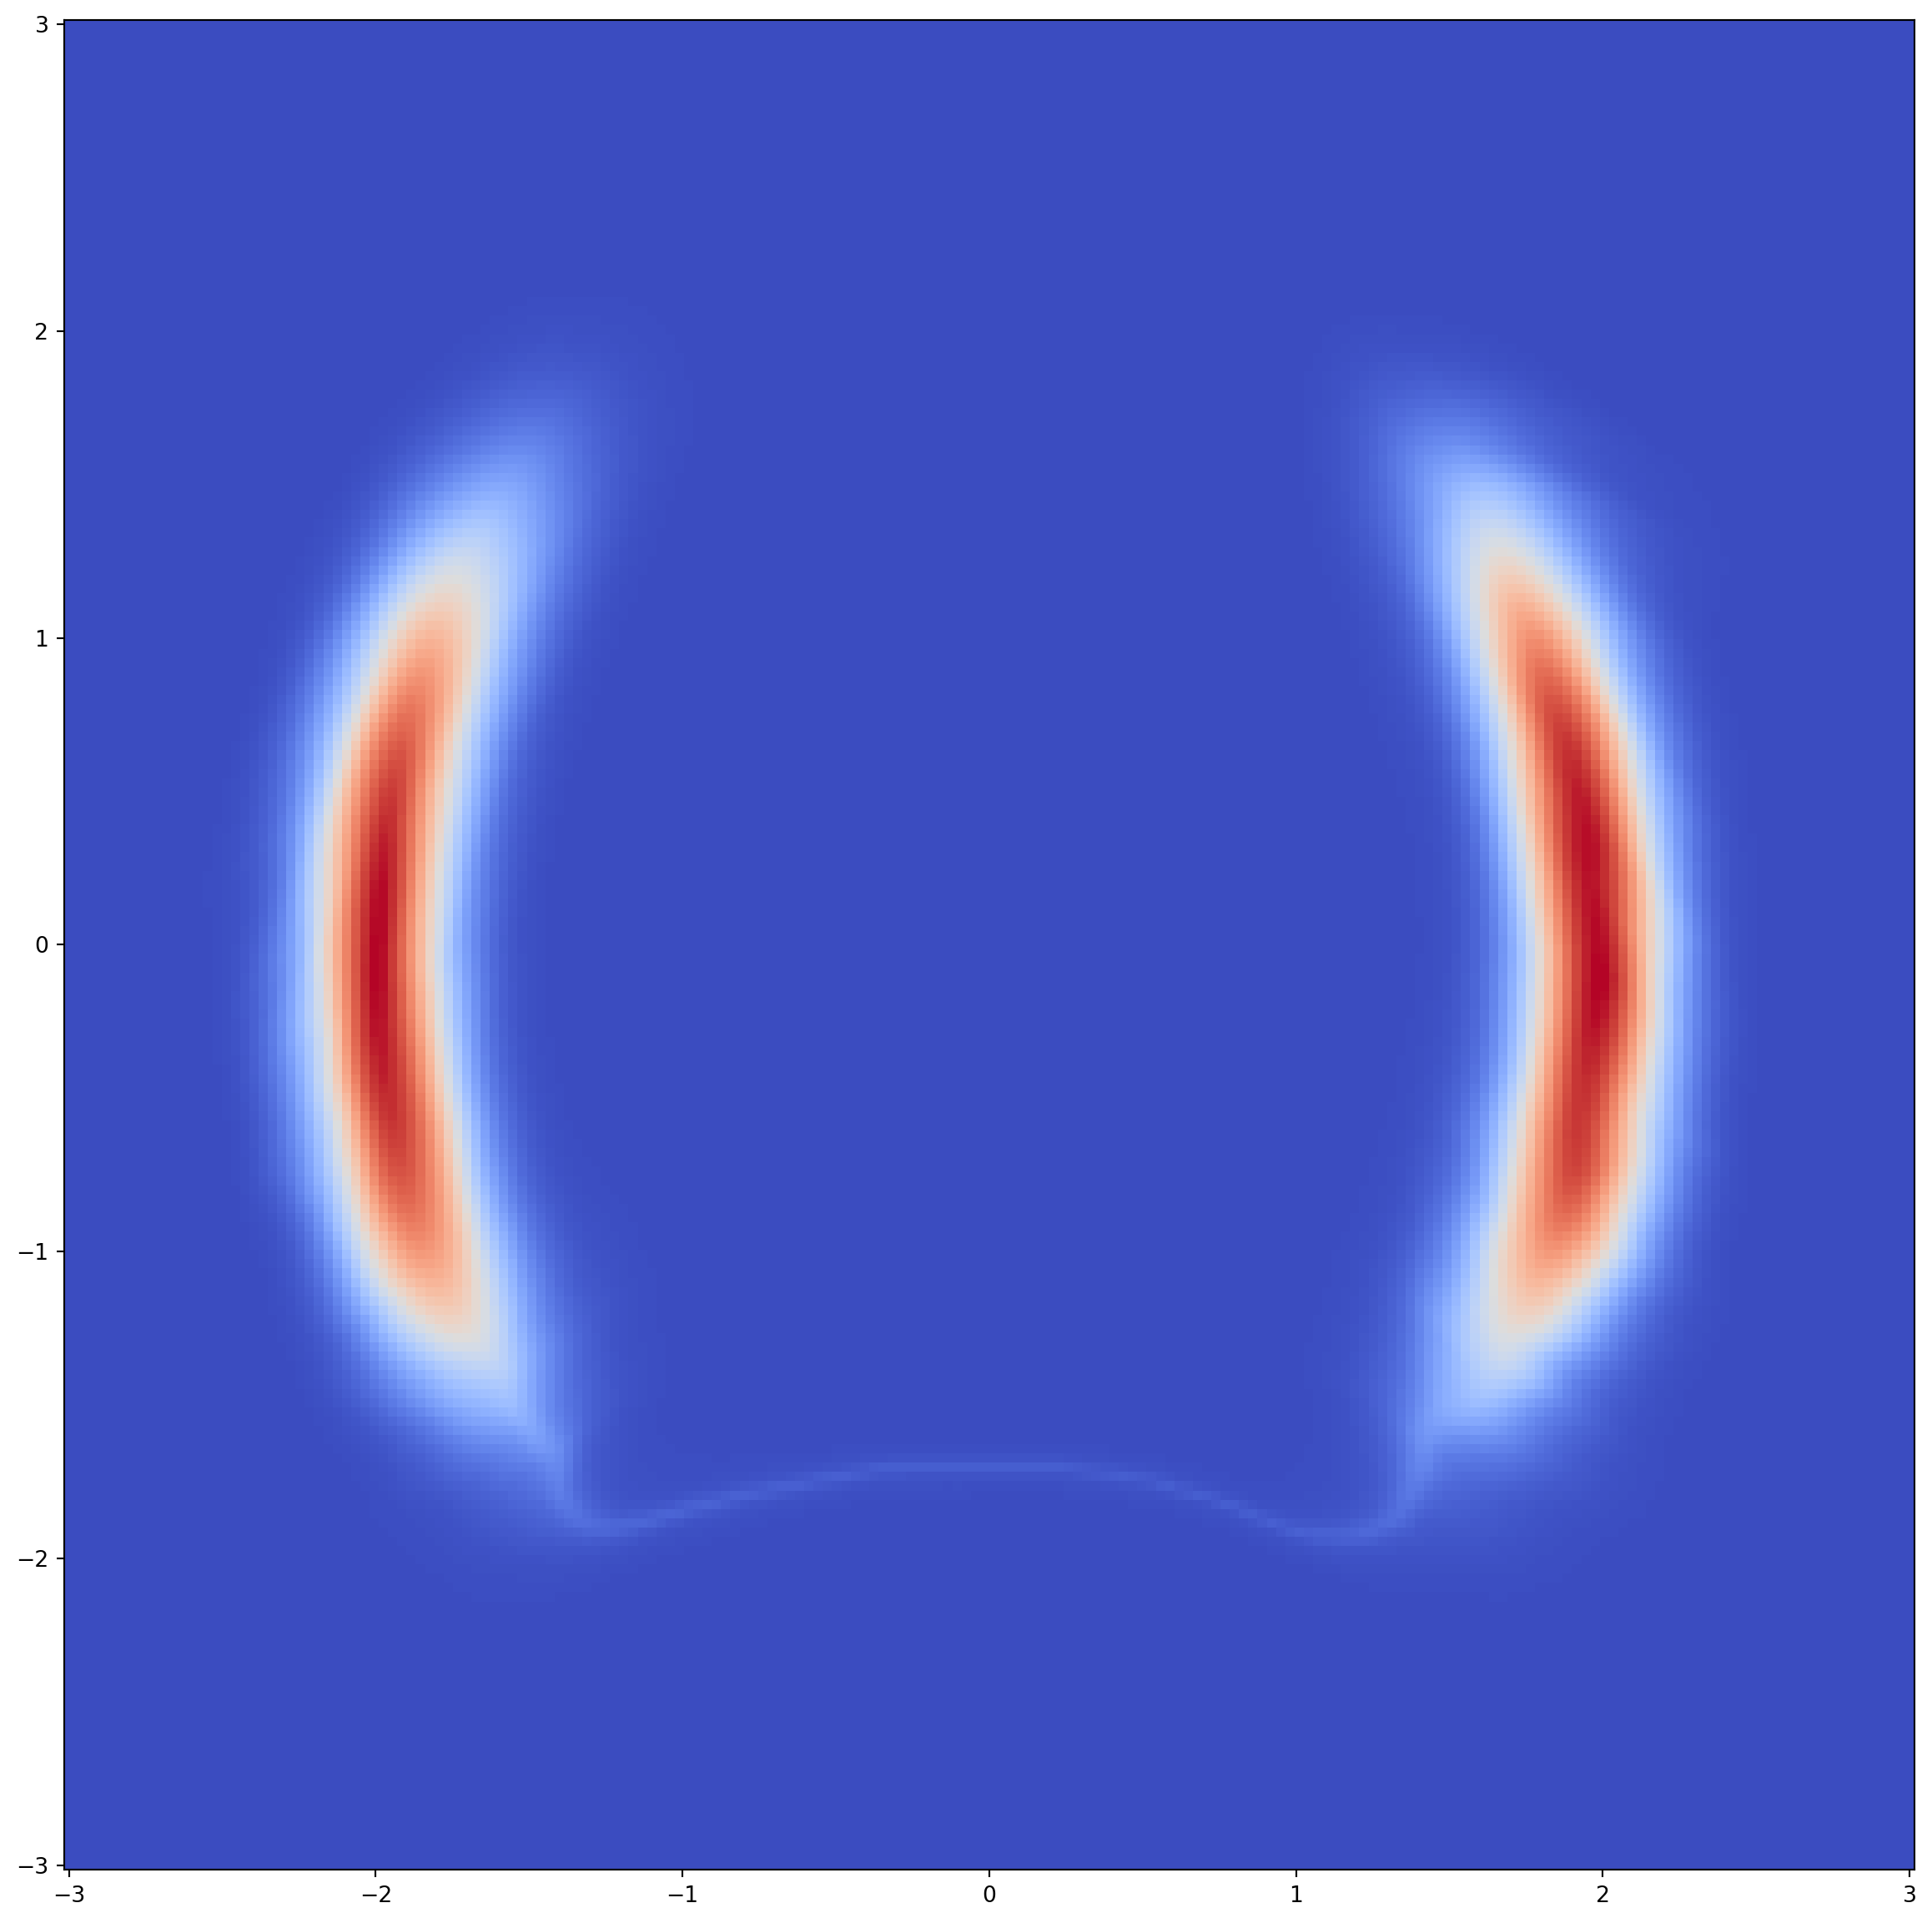

 38%|███▊      | 1501/4000 [01:54<07:03,  5.91it/s]

 38%|███▊      | 1503/4000 [01:55<05:50,  7.12it/s]

 38%|███▊      | 1505/4000 [01:55<04:59,  8.32it/s]

 38%|███▊      | 1507/4000 [01:55<04:24,  9.44it/s]

 38%|███▊      | 1509/4000 [01:55<03:59, 10.41it/s]

 38%|███▊      | 1511/4000 [01:55<03:42, 11.17it/s]

 38%|███▊      | 1513/4000 [01:55<03:30, 11.81it/s]

 38%|███▊      | 1515/4000 [01:56<03:21, 12.30it/s]

 38%|███▊      | 1517/4000 [01:56<03:15, 12.69it/s]

 38%|███▊      | 1519/4000 [01:56<03:11, 12.95it/s]

 38%|███▊      | 1521/4000 [01:56<03:08, 13.18it/s]

 38%|███▊      | 1523/4000 [01:56<03:05, 13.36it/s]

 38%|███▊      | 1525/4000 [01:56<03:03, 13.47it/s]

 38%|███▊      | 1527/4000 [01:56<03:02, 13.55it/s]

 38%|███▊      | 1529/4000 [01:57<03:01, 13.59it/s]

 38%|███▊      | 1531/4000 [01:57<03:01, 13.64it/s]

 38%|███▊      | 1533/4000 [01:57<03:00, 13.67it/s]

 38%|███▊      | 1535/4000 [01:57<03:00, 13.67it/s]

 38%|███▊      | 1537/4000 [01:57<03:00, 13.67it/s]

 38%|███▊      | 1539/4000 [01:57<02:59, 13.70it/s]

 39%|███▊      | 1541/4000 [01:57<02:59, 13.71it/s]

 39%|███▊      | 1543/4000 [01:58<02:59, 13.69it/s]

 39%|███▊      | 1545/4000 [01:58<02:59, 13.70it/s]

 39%|███▊      | 1547/4000 [01:58<02:59, 13.67it/s]

 39%|███▊      | 1549/4000 [01:58<02:59, 13.68it/s]

 39%|███▉      | 1551/4000 [01:58<02:58, 13.70it/s]

 39%|███▉      | 1553/4000 [01:58<02:58, 13.69it/s]

 39%|███▉      | 1555/4000 [01:58<02:58, 13.71it/s]

 39%|███▉      | 1557/4000 [01:59<02:58, 13.72it/s]

 39%|███▉      | 1559/4000 [01:59<02:58, 13.67it/s]

 39%|███▉      | 1561/4000 [01:59<02:58, 13.67it/s]

 39%|███▉      | 1563/4000 [01:59<02:57, 13.70it/s]

 39%|███▉      | 1565/4000 [01:59<02:58, 13.63it/s]

 39%|███▉      | 1567/4000 [01:59<02:58, 13.65it/s]

 39%|███▉      | 1569/4000 [01:59<02:57, 13.68it/s]

 39%|███▉      | 1571/4000 [02:00<02:57, 13.68it/s]

 39%|███▉      | 1573/4000 [02:00<02:57, 13.70it/s]

 39%|███▉      | 1575/4000 [02:00<02:57, 13.70it/s]

 39%|███▉      | 1577/4000 [02:00<02:57, 13.69it/s]

 39%|███▉      | 1579/4000 [02:00<02:57, 13.61it/s]

 40%|███▉      | 1581/4000 [02:00<02:57, 13.59it/s]

 40%|███▉      | 1583/4000 [02:00<02:57, 13.60it/s]

 40%|███▉      | 1585/4000 [02:01<02:57, 13.58it/s]

 40%|███▉      | 1587/4000 [02:01<02:57, 13.62it/s]

 40%|███▉      | 1589/4000 [02:01<02:56, 13.62it/s]

 40%|███▉      | 1591/4000 [02:01<02:56, 13.64it/s]

 40%|███▉      | 1593/4000 [02:01<02:56, 13.64it/s]

 40%|███▉      | 1595/4000 [02:01<02:56, 13.63it/s]

 40%|███▉      | 1597/4000 [02:01<02:56, 13.64it/s]

 40%|███▉      | 1599/4000 [02:02<02:55, 13.66it/s]

 40%|████      | 1601/4000 [02:02<02:55, 13.64it/s]

 40%|████      | 1603/4000 [02:02<02:56, 13.62it/s]

 40%|████      | 1605/4000 [02:02<02:56, 13.61it/s]

 40%|████      | 1607/4000 [02:02<02:55, 13.60it/s]

 40%|████      | 1609/4000 [02:02<02:55, 13.61it/s]

 40%|████      | 1611/4000 [02:03<02:55, 13.59it/s]

 40%|████      | 1613/4000 [02:03<02:55, 13.61it/s]

 40%|████      | 1615/4000 [02:03<02:55, 13.57it/s]

 40%|████      | 1617/4000 [02:03<02:55, 13.58it/s]

 40%|████      | 1619/4000 [02:03<02:55, 13.58it/s]

 41%|████      | 1621/4000 [02:03<02:55, 13.58it/s]

 41%|████      | 1623/4000 [02:03<02:55, 13.56it/s]

 41%|████      | 1625/4000 [02:04<02:54, 13.58it/s]

 41%|████      | 1627/4000 [02:04<02:54, 13.59it/s]

 41%|████      | 1629/4000 [02:04<02:54, 13.61it/s]

 41%|████      | 1631/4000 [02:04<02:54, 13.58it/s]

 41%|████      | 1633/4000 [02:04<02:54, 13.58it/s]

 41%|████      | 1635/4000 [02:04<02:54, 13.57it/s]

 41%|████      | 1637/4000 [02:04<02:54, 13.54it/s]

 41%|████      | 1639/4000 [02:05<02:54, 13.55it/s]

 41%|████      | 1641/4000 [02:05<02:54, 13.54it/s]

 41%|████      | 1643/4000 [02:05<02:53, 13.57it/s]

 41%|████      | 1645/4000 [02:05<02:53, 13.57it/s]

 41%|████      | 1647/4000 [02:05<02:53, 13.55it/s]

 41%|████      | 1649/4000 [02:05<02:53, 13.57it/s]

 41%|████▏     | 1651/4000 [02:05<02:53, 13.58it/s]

 41%|████▏     | 1653/4000 [02:06<02:52, 13.60it/s]

 41%|████▏     | 1655/4000 [02:06<02:52, 13.58it/s]

 41%|████▏     | 1657/4000 [02:06<02:52, 13.59it/s]

 41%|████▏     | 1659/4000 [02:06<02:52, 13.59it/s]

 42%|████▏     | 1661/4000 [02:06<02:52, 13.59it/s]

 42%|████▏     | 1663/4000 [02:06<02:51, 13.59it/s]

 42%|████▏     | 1665/4000 [02:07<02:52, 13.57it/s]

 42%|████▏     | 1667/4000 [02:07<02:51, 13.57it/s]

 42%|████▏     | 1669/4000 [02:07<02:51, 13.58it/s]

 42%|████▏     | 1671/4000 [02:07<02:51, 13.59it/s]

 42%|████▏     | 1673/4000 [02:07<02:52, 13.50it/s]

 42%|████▏     | 1675/4000 [02:07<02:52, 13.49it/s]

 42%|████▏     | 1677/4000 [02:07<02:52, 13.49it/s]

 42%|████▏     | 1679/4000 [02:08<02:51, 13.52it/s]

 42%|████▏     | 1681/4000 [02:08<02:51, 13.55it/s]

 42%|████▏     | 1683/4000 [02:08<02:51, 13.55it/s]

 42%|████▏     | 1685/4000 [02:08<02:50, 13.54it/s]

 42%|████▏     | 1687/4000 [02:08<02:50, 13.56it/s]

 42%|████▏     | 1689/4000 [02:08<02:50, 13.56it/s]

 42%|████▏     | 1691/4000 [02:08<02:50, 13.57it/s]

 42%|████▏     | 1693/4000 [02:09<02:49, 13.61it/s]

 42%|████▏     | 1695/4000 [02:09<02:49, 13.59it/s]

 42%|████▏     | 1697/4000 [02:09<02:49, 13.57it/s]

 42%|████▏     | 1699/4000 [02:09<02:49, 13.58it/s]

 43%|████▎     | 1701/4000 [02:09<02:49, 13.58it/s]

 43%|████▎     | 1703/4000 [02:09<02:49, 13.59it/s]

 43%|████▎     | 1705/4000 [02:09<02:49, 13.58it/s]

 43%|████▎     | 1707/4000 [02:10<02:49, 13.56it/s]

 43%|████▎     | 1709/4000 [02:10<02:49, 13.54it/s]

 43%|████▎     | 1711/4000 [02:10<02:49, 13.50it/s]

 43%|████▎     | 1713/4000 [02:10<02:49, 13.51it/s]

 43%|████▎     | 1715/4000 [02:10<02:48, 13.55it/s]

 43%|████▎     | 1717/4000 [02:10<02:48, 13.55it/s]

 43%|████▎     | 1719/4000 [02:10<02:47, 13.59it/s]

 43%|████▎     | 1721/4000 [02:11<02:47, 13.60it/s]

 43%|████▎     | 1723/4000 [02:11<02:47, 13.60it/s]

 43%|████▎     | 1725/4000 [02:11<02:47, 13.60it/s]

 43%|████▎     | 1727/4000 [02:11<02:47, 13.57it/s]

 43%|████▎     | 1729/4000 [02:11<02:47, 13.60it/s]

 43%|████▎     | 1731/4000 [02:11<02:46, 13.61it/s]

 43%|████▎     | 1733/4000 [02:12<02:46, 13.63it/s]

 43%|████▎     | 1735/4000 [02:12<02:46, 13.61it/s]

 43%|████▎     | 1737/4000 [02:12<02:46, 13.61it/s]

 43%|████▎     | 1739/4000 [02:12<02:46, 13.58it/s]

 44%|████▎     | 1741/4000 [02:12<02:46, 13.60it/s]

 44%|████▎     | 1743/4000 [02:12<02:45, 13.64it/s]

 44%|████▎     | 1745/4000 [02:12<02:46, 13.53it/s]

 44%|████▎     | 1747/4000 [02:13<02:46, 13.55it/s]

 44%|████▎     | 1749/4000 [02:13<02:45, 13.58it/s]

 44%|████▍     | 1751/4000 [02:13<02:45, 13.57it/s]

 44%|████▍     | 1753/4000 [02:13<02:45, 13.57it/s]

 44%|████▍     | 1755/4000 [02:13<02:45, 13.59it/s]

 44%|████▍     | 1757/4000 [02:13<02:45, 13.56it/s]

 44%|████▍     | 1759/4000 [02:13<02:45, 13.55it/s]

 44%|████▍     | 1761/4000 [02:14<02:45, 13.56it/s]

 44%|████▍     | 1763/4000 [02:14<02:44, 13.57it/s]

 44%|████▍     | 1765/4000 [02:14<02:45, 13.53it/s]

 44%|████▍     | 1767/4000 [02:14<02:44, 13.55it/s]

 44%|████▍     | 1769/4000 [02:14<02:44, 13.57it/s]

 44%|████▍     | 1771/4000 [02:14<02:44, 13.58it/s]

 44%|████▍     | 1773/4000 [02:14<02:43, 13.59it/s]

 44%|████▍     | 1775/4000 [02:15<02:43, 13.61it/s]

 44%|████▍     | 1777/4000 [02:15<02:42, 13.65it/s]

 44%|████▍     | 1779/4000 [02:15<02:43, 13.61it/s]

 45%|████▍     | 1781/4000 [02:15<02:43, 13.59it/s]

 45%|████▍     | 1783/4000 [02:15<02:43, 13.59it/s]

 45%|████▍     | 1785/4000 [02:15<02:42, 13.61it/s]

 45%|████▍     | 1787/4000 [02:15<02:42, 13.59it/s]

 45%|████▍     | 1789/4000 [02:16<02:42, 13.61it/s]

 45%|████▍     | 1791/4000 [02:16<02:42, 13.62it/s]

 45%|████▍     | 1793/4000 [02:16<02:42, 13.60it/s]

 45%|████▍     | 1795/4000 [02:16<02:42, 13.61it/s]

 45%|████▍     | 1797/4000 [02:16<02:41, 13.63it/s]

 45%|████▍     | 1799/4000 [02:16<02:41, 13.65it/s]

 45%|████▌     | 1801/4000 [02:17<02:41, 13.64it/s]

 45%|████▌     | 1803/4000 [02:17<02:41, 13.63it/s]

 45%|████▌     | 1805/4000 [02:17<02:41, 13.63it/s]

 45%|████▌     | 1807/4000 [02:17<02:40, 13.63it/s]

 45%|████▌     | 1809/4000 [02:17<02:41, 13.59it/s]

 45%|████▌     | 1811/4000 [02:17<02:41, 13.57it/s]

 45%|████▌     | 1813/4000 [02:17<02:41, 13.58it/s]

 45%|████▌     | 1815/4000 [02:18<02:40, 13.60it/s]

 45%|████▌     | 1817/4000 [02:18<02:41, 13.53it/s]

 45%|████▌     | 1819/4000 [02:18<02:43, 13.35it/s]

 46%|████▌     | 1821/4000 [02:18<02:43, 13.35it/s]

 46%|████▌     | 1823/4000 [02:18<02:42, 13.43it/s]

 46%|████▌     | 1825/4000 [02:18<02:41, 13.44it/s]

 46%|████▌     | 1827/4000 [02:18<02:41, 13.45it/s]

 46%|████▌     | 1829/4000 [02:19<02:41, 13.45it/s]

 46%|████▌     | 1831/4000 [02:19<02:40, 13.50it/s]

 46%|████▌     | 1833/4000 [02:19<02:39, 13.55it/s]

 46%|████▌     | 1835/4000 [02:19<02:39, 13.56it/s]

 46%|████▌     | 1837/4000 [02:19<02:39, 13.55it/s]

 46%|████▌     | 1839/4000 [02:19<02:39, 13.56it/s]

 46%|████▌     | 1841/4000 [02:19<02:39, 13.57it/s]

 46%|████▌     | 1843/4000 [02:20<02:39, 13.52it/s]

 46%|████▌     | 1845/4000 [02:20<02:39, 13.54it/s]

 46%|████▌     | 1847/4000 [02:20<02:45, 13.02it/s]

 46%|████▌     | 1849/4000 [02:20<02:43, 13.18it/s]

 46%|████▋     | 1851/4000 [02:20<02:42, 13.26it/s]

 46%|████▋     | 1853/4000 [02:20<02:40, 13.36it/s]

 46%|████▋     | 1855/4000 [02:21<02:39, 13.44it/s]

 46%|████▋     | 1857/4000 [02:21<02:38, 13.51it/s]

 46%|████▋     | 1859/4000 [02:21<02:38, 13.53it/s]

 47%|████▋     | 1861/4000 [02:21<02:37, 13.56it/s]

 47%|████▋     | 1863/4000 [02:21<02:37, 13.59it/s]

 47%|████▋     | 1865/4000 [02:21<02:36, 13.62it/s]

 47%|████▋     | 1867/4000 [02:21<02:36, 13.65it/s]

 47%|████▋     | 1869/4000 [02:22<02:35, 13.66it/s]

 47%|████▋     | 1871/4000 [02:22<02:36, 13.65it/s]

 47%|████▋     | 1873/4000 [02:22<02:35, 13.68it/s]

 47%|████▋     | 1875/4000 [02:22<02:35, 13.64it/s]

 47%|████▋     | 1877/4000 [02:22<02:35, 13.63it/s]

 47%|████▋     | 1879/4000 [02:22<02:35, 13.64it/s]

 47%|████▋     | 1881/4000 [02:22<02:35, 13.62it/s]

 47%|████▋     | 1883/4000 [02:23<02:36, 13.54it/s]

 47%|████▋     | 1885/4000 [02:23<02:36, 13.53it/s]

 47%|████▋     | 1887/4000 [02:23<02:35, 13.58it/s]

 47%|████▋     | 1889/4000 [02:23<02:35, 13.55it/s]

 47%|████▋     | 1891/4000 [02:23<02:35, 13.58it/s]

 47%|████▋     | 1893/4000 [02:23<02:35, 13.57it/s]

 47%|████▋     | 1895/4000 [02:23<02:34, 13.61it/s]

 47%|████▋     | 1897/4000 [02:24<02:34, 13.62it/s]

 47%|████▋     | 1899/4000 [02:24<02:33, 13.65it/s]

 48%|████▊     | 1901/4000 [02:24<02:33, 13.64it/s]

 48%|████▊     | 1903/4000 [02:24<02:33, 13.63it/s]

 48%|████▊     | 1905/4000 [02:24<02:33, 13.64it/s]

 48%|████▊     | 1907/4000 [02:24<02:33, 13.64it/s]

 48%|████▊     | 1909/4000 [02:24<02:33, 13.61it/s]

 48%|████▊     | 1911/4000 [02:25<02:33, 13.62it/s]

 48%|████▊     | 1913/4000 [02:25<02:33, 13.64it/s]

 48%|████▊     | 1915/4000 [02:25<02:32, 13.63it/s]

 48%|████▊     | 1917/4000 [02:25<02:32, 13.64it/s]

 48%|████▊     | 1919/4000 [02:25<02:33, 13.59it/s]

 48%|████▊     | 1921/4000 [02:25<02:33, 13.59it/s]

 48%|████▊     | 1923/4000 [02:26<02:32, 13.61it/s]

 48%|████▊     | 1925/4000 [02:26<02:32, 13.58it/s]

 48%|████▊     | 1927/4000 [02:26<02:32, 13.60it/s]

 48%|████▊     | 1929/4000 [02:26<02:32, 13.62it/s]

 48%|████▊     | 1931/4000 [02:26<02:31, 13.64it/s]

 48%|████▊     | 1933/4000 [02:26<02:31, 13.66it/s]

 48%|████▊     | 1935/4000 [02:26<02:31, 13.65it/s]

 48%|████▊     | 1937/4000 [02:27<02:31, 13.64it/s]

 48%|████▊     | 1939/4000 [02:27<02:30, 13.65it/s]

 49%|████▊     | 1941/4000 [02:27<02:30, 13.67it/s]

 49%|████▊     | 1943/4000 [02:27<02:30, 13.67it/s]

 49%|████▊     | 1945/4000 [02:27<02:30, 13.67it/s]

 49%|████▊     | 1947/4000 [02:27<02:30, 13.65it/s]

 49%|████▊     | 1949/4000 [02:27<02:30, 13.66it/s]

 49%|████▉     | 1951/4000 [02:28<02:29, 13.66it/s]

 49%|████▉     | 1953/4000 [02:28<02:30, 13.63it/s]

 49%|████▉     | 1955/4000 [02:28<02:29, 13.63it/s]

 49%|████▉     | 1957/4000 [02:28<02:29, 13.66it/s]

 49%|████▉     | 1959/4000 [02:28<02:29, 13.68it/s]

 49%|████▉     | 1961/4000 [02:28<02:28, 13.70it/s]

 49%|████▉     | 1963/4000 [02:28<02:28, 13.67it/s]

 49%|████▉     | 1965/4000 [02:29<02:29, 13.65it/s]

 49%|████▉     | 1967/4000 [02:29<02:28, 13.67it/s]

 49%|████▉     | 1969/4000 [02:29<02:28, 13.66it/s]

 49%|████▉     | 1971/4000 [02:29<02:28, 13.67it/s]

 49%|████▉     | 1973/4000 [02:29<02:28, 13.68it/s]

 49%|████▉     | 1975/4000 [02:29<02:28, 13.68it/s]

 49%|████▉     | 1977/4000 [02:29<02:28, 13.65it/s]

 49%|████▉     | 1979/4000 [02:30<02:27, 13.66it/s]

 50%|████▉     | 1981/4000 [02:30<02:27, 13.65it/s]

 50%|████▉     | 1983/4000 [02:30<02:27, 13.63it/s]

 50%|████▉     | 1985/4000 [02:30<02:27, 13.64it/s]

 50%|████▉     | 1987/4000 [02:30<02:27, 13.65it/s]

 50%|████▉     | 1989/4000 [02:30<02:27, 13.62it/s]

 50%|████▉     | 1991/4000 [02:31<02:27, 13.64it/s]

 50%|████▉     | 1993/4000 [02:31<02:27, 13.60it/s]

 50%|████▉     | 1995/4000 [02:31<02:27, 13.60it/s]

 50%|████▉     | 1997/4000 [02:31<02:27, 13.58it/s]

 50%|████▉     | 1999/4000 [02:31<02:27, 13.59it/s]

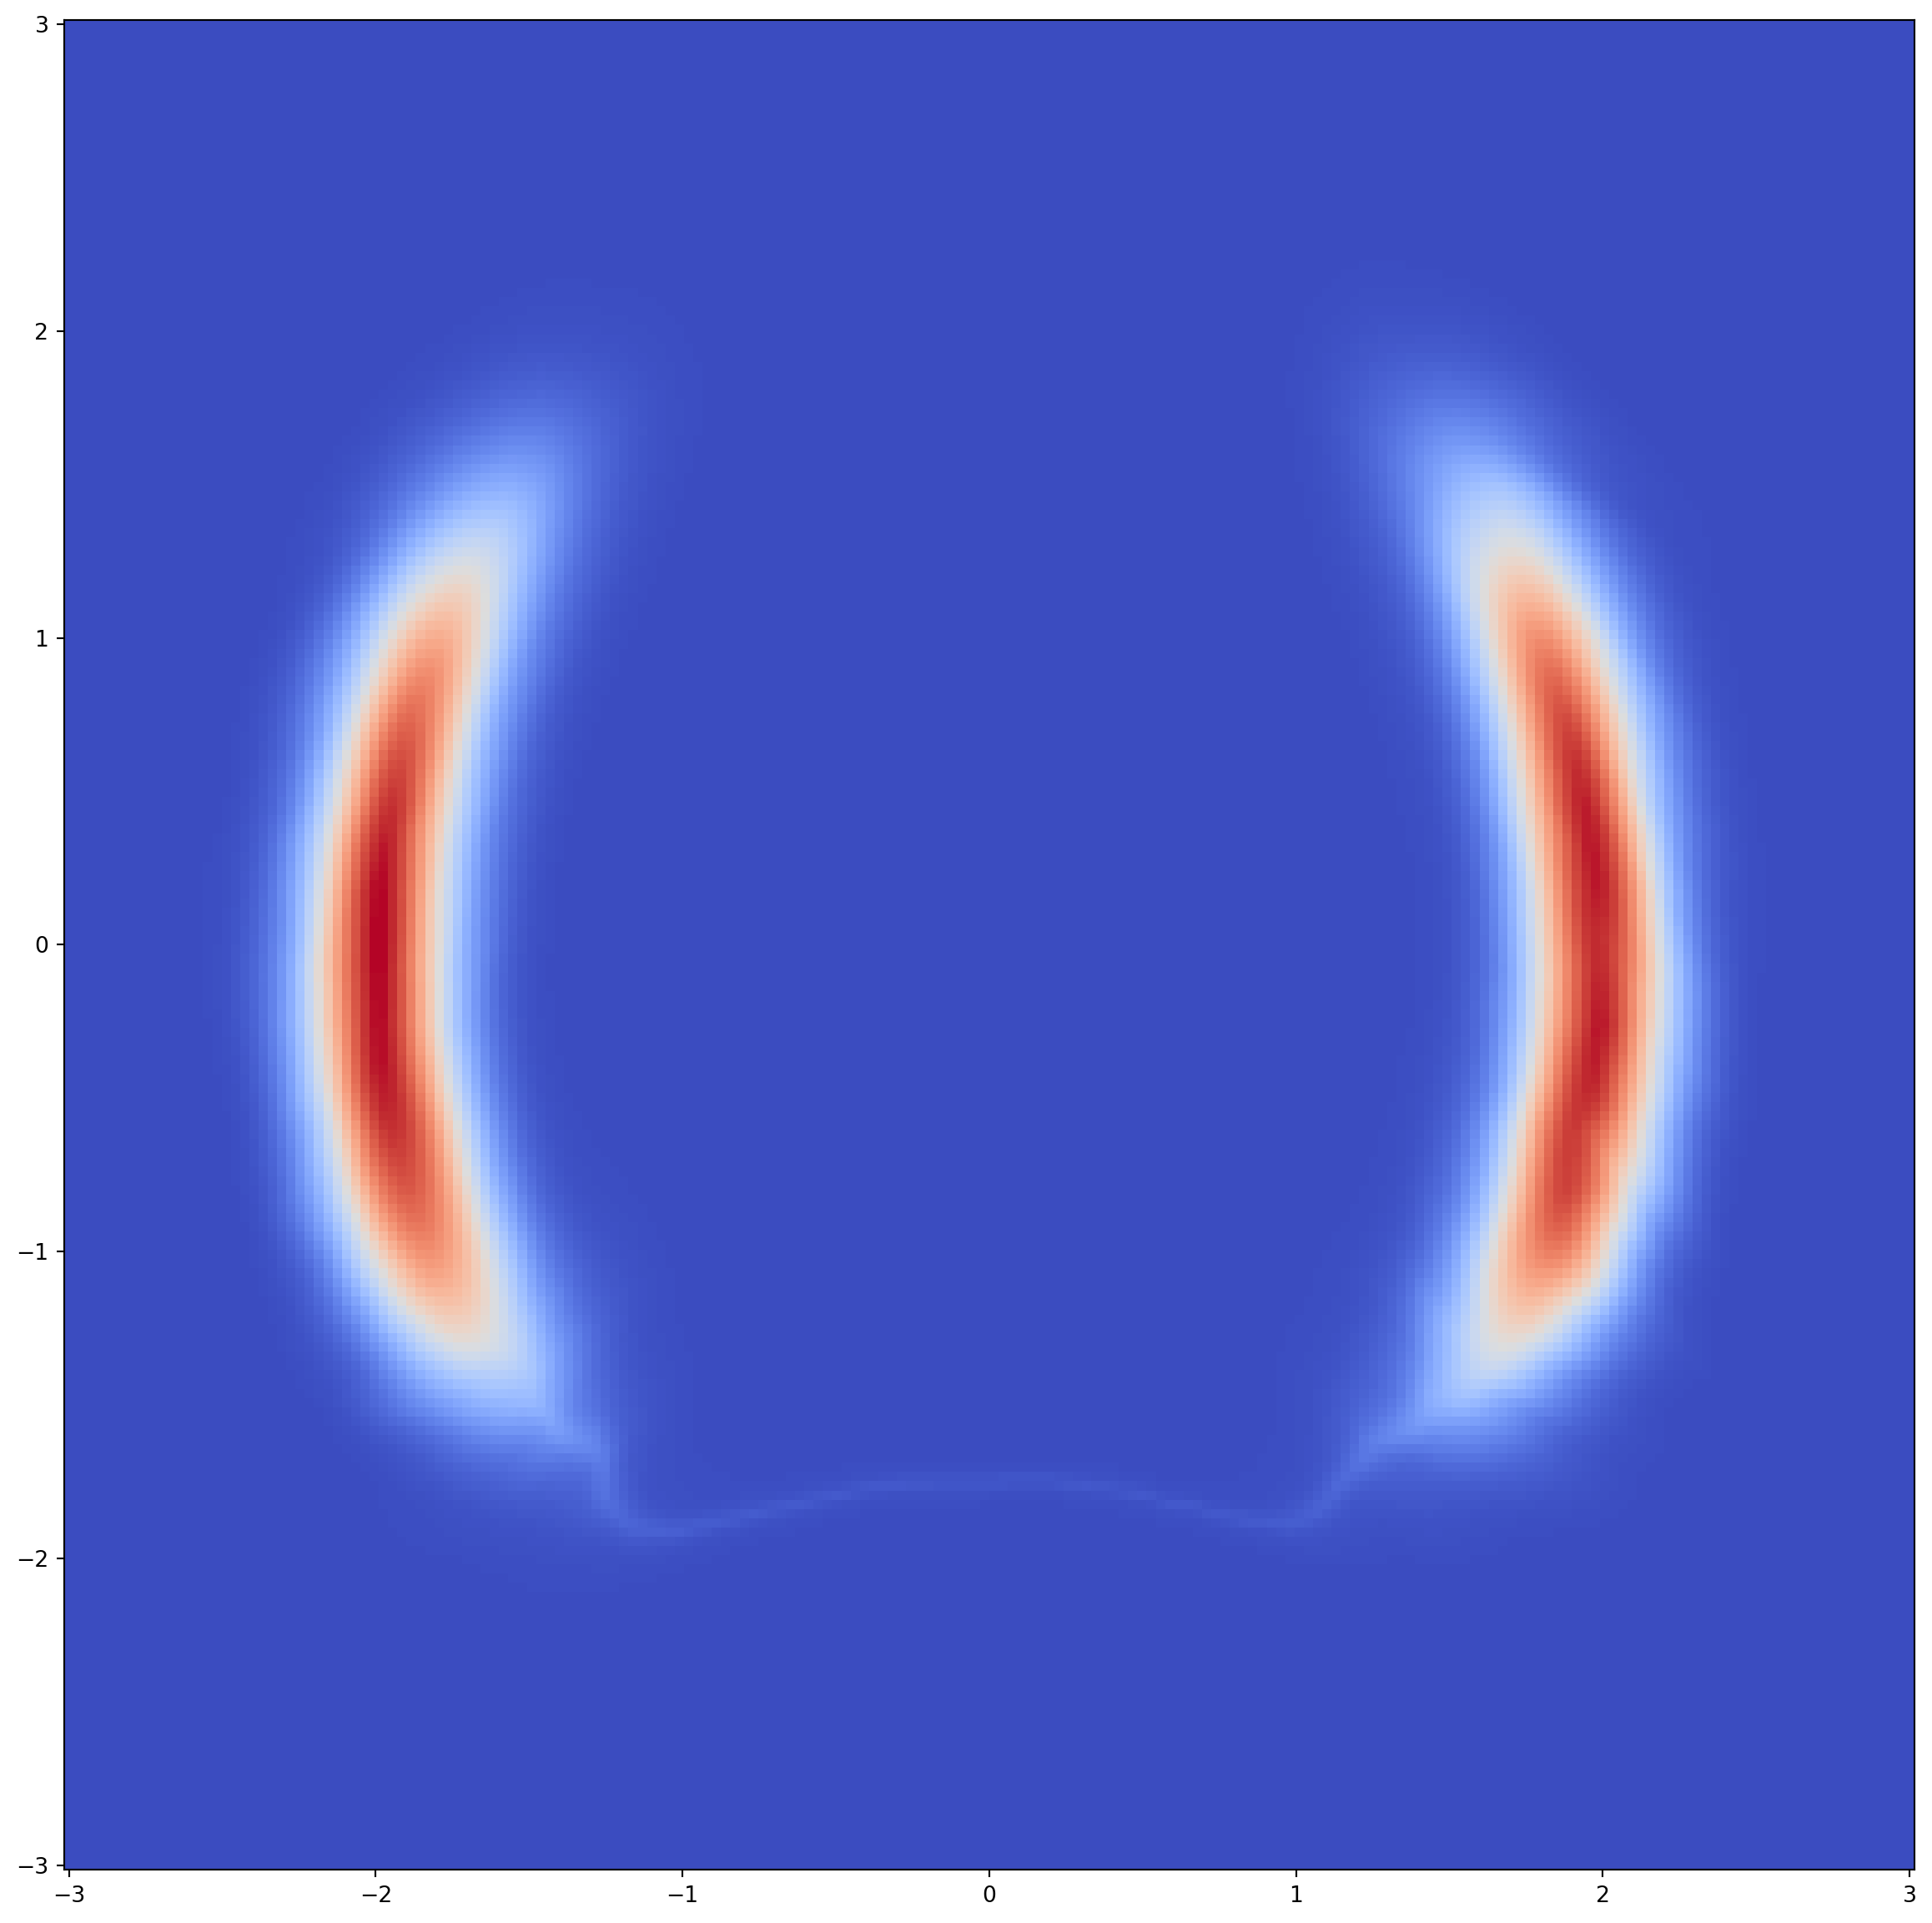

 50%|█████     | 2001/4000 [02:32<05:42,  5.83it/s]

 50%|█████     | 2003/4000 [02:32<04:44,  7.01it/s]

 50%|█████     | 2005/4000 [02:32<04:03,  8.19it/s]

 50%|█████     | 2007/4000 [02:32<03:34,  9.29it/s]

 50%|█████     | 2009/4000 [02:32<03:14, 10.26it/s]

 50%|█████     | 2011/4000 [02:33<02:59, 11.10it/s]

 50%|█████     | 2013/4000 [02:33<02:49, 11.73it/s]

 50%|█████     | 2015/4000 [02:33<02:42, 12.25it/s]

 50%|█████     | 2017/4000 [02:33<02:37, 12.59it/s]

 50%|█████     | 2019/4000 [02:33<02:34, 12.84it/s]

 51%|█████     | 2021/4000 [02:33<02:31, 13.05it/s]

 51%|█████     | 2023/4000 [02:34<02:29, 13.21it/s]

 51%|█████     | 2025/4000 [02:34<02:28, 13.30it/s]

 51%|█████     | 2027/4000 [02:34<02:29, 13.18it/s]

 51%|█████     | 2029/4000 [02:34<02:29, 13.20it/s]

 51%|█████     | 2031/4000 [02:34<02:28, 13.26it/s]

 51%|█████     | 2033/4000 [02:34<02:27, 13.32it/s]

 51%|█████     | 2035/4000 [02:34<02:26, 13.39it/s]

 51%|█████     | 2037/4000 [02:35<02:26, 13.42it/s]

 51%|█████     | 2039/4000 [02:35<02:25, 13.44it/s]

 51%|█████     | 2041/4000 [02:35<02:25, 13.47it/s]

 51%|█████     | 2043/4000 [02:35<02:25, 13.47it/s]

 51%|█████     | 2045/4000 [02:35<02:24, 13.49it/s]

 51%|█████     | 2047/4000 [02:35<02:24, 13.49it/s]

 51%|█████     | 2049/4000 [02:35<02:24, 13.50it/s]

 51%|█████▏    | 2051/4000 [02:36<02:24, 13.50it/s]

 51%|█████▏    | 2053/4000 [02:36<02:23, 13.54it/s]

 51%|█████▏    | 2055/4000 [02:36<02:23, 13.58it/s]

 51%|█████▏    | 2057/4000 [02:36<02:23, 13.58it/s]

 51%|█████▏    | 2059/4000 [02:36<02:23, 13.56it/s]

 52%|█████▏    | 2061/4000 [02:36<02:22, 13.58it/s]

 52%|█████▏    | 2063/4000 [02:36<02:22, 13.61it/s]

 52%|█████▏    | 2065/4000 [02:37<02:22, 13.60it/s]

 52%|█████▏    | 2067/4000 [02:37<02:22, 13.61it/s]

 52%|█████▏    | 2069/4000 [02:37<02:21, 13.62it/s]

 52%|█████▏    | 2071/4000 [02:37<02:21, 13.60it/s]

 52%|█████▏    | 2073/4000 [02:37<02:21, 13.58it/s]

 52%|█████▏    | 2075/4000 [02:37<02:21, 13.57it/s]

 52%|█████▏    | 2077/4000 [02:38<02:21, 13.56it/s]

 52%|█████▏    | 2079/4000 [02:38<02:21, 13.57it/s]

 52%|█████▏    | 2081/4000 [02:38<02:21, 13.59it/s]

 52%|█████▏    | 2083/4000 [02:38<02:21, 13.59it/s]

 52%|█████▏    | 2085/4000 [02:38<02:20, 13.59it/s]

 52%|█████▏    | 2087/4000 [02:38<02:21, 13.52it/s]

 52%|█████▏    | 2089/4000 [02:38<02:21, 13.53it/s]

 52%|█████▏    | 2091/4000 [02:39<02:20, 13.55it/s]

 52%|█████▏    | 2093/4000 [02:39<02:20, 13.59it/s]

 52%|█████▏    | 2095/4000 [02:39<02:20, 13.60it/s]

 52%|█████▏    | 2097/4000 [02:39<02:20, 13.58it/s]

 52%|█████▏    | 2099/4000 [02:39<02:19, 13.58it/s]

 53%|█████▎    | 2101/4000 [02:39<02:19, 13.62it/s]

 53%|█████▎    | 2103/4000 [02:39<02:20, 13.52it/s]

 53%|█████▎    | 2105/4000 [02:40<02:20, 13.52it/s]

 53%|█████▎    | 2107/4000 [02:40<02:19, 13.54it/s]

 53%|█████▎    | 2109/4000 [02:40<02:19, 13.54it/s]

 53%|█████▎    | 2111/4000 [02:40<02:19, 13.54it/s]

 53%|█████▎    | 2113/4000 [02:40<02:19, 13.49it/s]

 53%|█████▎    | 2115/4000 [02:40<02:19, 13.51it/s]

 53%|█████▎    | 2117/4000 [02:40<02:19, 13.54it/s]

 53%|█████▎    | 2119/4000 [02:41<02:18, 13.54it/s]

 53%|█████▎    | 2121/4000 [02:41<02:18, 13.55it/s]

 53%|█████▎    | 2123/4000 [02:41<02:18, 13.56it/s]

 53%|█████▎    | 2125/4000 [02:41<02:18, 13.56it/s]

 53%|█████▎    | 2127/4000 [02:41<02:18, 13.56it/s]

 53%|█████▎    | 2129/4000 [02:41<02:17, 13.59it/s]

 53%|█████▎    | 2131/4000 [02:42<02:17, 13.56it/s]

 53%|█████▎    | 2133/4000 [02:42<02:19, 13.34it/s]

 53%|█████▎    | 2135/4000 [02:42<02:20, 13.26it/s]

 53%|█████▎    | 2137/4000 [02:42<02:19, 13.31it/s]

 53%|█████▎    | 2139/4000 [02:42<02:19, 13.38it/s]

 54%|█████▎    | 2141/4000 [02:42<02:18, 13.43it/s]

 54%|█████▎    | 2143/4000 [02:42<02:18, 13.41it/s]

 54%|█████▎    | 2145/4000 [02:43<02:17, 13.45it/s]

 54%|█████▎    | 2147/4000 [02:43<02:20, 13.20it/s]

 54%|█████▎    | 2149/4000 [02:43<02:20, 13.16it/s]

 54%|█████▍    | 2151/4000 [02:43<02:19, 13.25it/s]

 54%|█████▍    | 2153/4000 [02:43<02:18, 13.32it/s]

 54%|█████▍    | 2155/4000 [02:43<02:18, 13.35it/s]

 54%|█████▍    | 2157/4000 [02:43<02:18, 13.35it/s]

 54%|█████▍    | 2159/4000 [02:44<02:17, 13.41it/s]

 54%|█████▍    | 2161/4000 [02:44<02:16, 13.44it/s]

 54%|█████▍    | 2163/4000 [02:44<02:16, 13.47it/s]

 54%|█████▍    | 2165/4000 [02:44<02:15, 13.51it/s]

 54%|█████▍    | 2167/4000 [02:44<02:15, 13.49it/s]

 54%|█████▍    | 2169/4000 [02:44<02:15, 13.51it/s]

 54%|█████▍    | 2171/4000 [02:44<02:15, 13.50it/s]

 54%|█████▍    | 2173/4000 [02:45<02:15, 13.51it/s]

 54%|█████▍    | 2175/4000 [02:45<02:14, 13.52it/s]

 54%|█████▍    | 2177/4000 [02:45<02:14, 13.53it/s]

 54%|█████▍    | 2179/4000 [02:45<02:14, 13.52it/s]

 55%|█████▍    | 2181/4000 [02:45<02:14, 13.54it/s]

 55%|█████▍    | 2183/4000 [02:45<02:14, 13.55it/s]

 55%|█████▍    | 2185/4000 [02:46<02:14, 13.54it/s]

 55%|█████▍    | 2187/4000 [02:46<02:13, 13.55it/s]

 55%|█████▍    | 2189/4000 [02:46<02:13, 13.59it/s]

 55%|█████▍    | 2191/4000 [02:46<02:12, 13.62it/s]

 55%|█████▍    | 2193/4000 [02:46<02:12, 13.63it/s]

 55%|█████▍    | 2195/4000 [02:46<02:12, 13.62it/s]

 55%|█████▍    | 2197/4000 [02:46<02:12, 13.63it/s]

 55%|█████▍    | 2199/4000 [02:47<02:12, 13.59it/s]

 55%|█████▌    | 2201/4000 [02:47<02:12, 13.59it/s]

 55%|█████▌    | 2203/4000 [02:47<02:12, 13.61it/s]

 55%|█████▌    | 2205/4000 [02:47<02:12, 13.57it/s]

 55%|█████▌    | 2207/4000 [02:47<02:12, 13.57it/s]

 55%|█████▌    | 2209/4000 [02:47<02:12, 13.56it/s]

 55%|█████▌    | 2211/4000 [02:47<02:13, 13.35it/s]

 55%|█████▌    | 2213/4000 [02:48<02:13, 13.37it/s]

 55%|█████▌    | 2215/4000 [02:48<02:12, 13.46it/s]

 55%|█████▌    | 2217/4000 [02:48<02:12, 13.46it/s]

 55%|█████▌    | 2219/4000 [02:48<02:11, 13.50it/s]

 56%|█████▌    | 2221/4000 [02:48<02:11, 13.53it/s]

 56%|█████▌    | 2223/4000 [02:48<02:11, 13.53it/s]

 56%|█████▌    | 2225/4000 [02:48<02:10, 13.57it/s]

 56%|█████▌    | 2227/4000 [02:49<02:10, 13.59it/s]

 56%|█████▌    | 2229/4000 [02:49<02:10, 13.60it/s]

 56%|█████▌    | 2231/4000 [02:49<02:09, 13.61it/s]

 56%|█████▌    | 2233/4000 [02:49<02:09, 13.60it/s]

 56%|█████▌    | 2235/4000 [02:49<02:09, 13.58it/s]

 56%|█████▌    | 2237/4000 [02:49<02:09, 13.56it/s]

 56%|█████▌    | 2239/4000 [02:50<02:09, 13.56it/s]

 56%|█████▌    | 2241/4000 [02:50<02:09, 13.56it/s]

 56%|█████▌    | 2243/4000 [02:50<02:09, 13.59it/s]

 56%|█████▌    | 2245/4000 [02:50<02:09, 13.56it/s]

 56%|█████▌    | 2247/4000 [02:50<02:08, 13.61it/s]

 56%|█████▌    | 2249/4000 [02:50<02:08, 13.59it/s]

 56%|█████▋    | 2251/4000 [02:50<02:08, 13.63it/s]

 56%|█████▋    | 2253/4000 [02:51<02:08, 13.64it/s]

 56%|█████▋    | 2255/4000 [02:51<02:07, 13.65it/s]

 56%|█████▋    | 2257/4000 [02:51<02:07, 13.65it/s]

 56%|█████▋    | 2259/4000 [02:51<02:07, 13.65it/s]

 57%|█████▋    | 2261/4000 [02:51<02:07, 13.65it/s]

 57%|█████▋    | 2263/4000 [02:51<02:07, 13.61it/s]

 57%|█████▋    | 2265/4000 [02:51<02:07, 13.60it/s]

 57%|█████▋    | 2267/4000 [02:52<02:07, 13.55it/s]

 57%|█████▋    | 2269/4000 [02:52<02:07, 13.56it/s]

 57%|█████▋    | 2271/4000 [02:52<02:07, 13.55it/s]

 57%|█████▋    | 2273/4000 [02:52<02:07, 13.58it/s]

 57%|█████▋    | 2275/4000 [02:52<02:07, 13.57it/s]

 57%|█████▋    | 2277/4000 [02:52<02:06, 13.60it/s]

 57%|█████▋    | 2279/4000 [02:52<02:06, 13.61it/s]

 57%|█████▋    | 2281/4000 [02:53<02:06, 13.60it/s]

 57%|█████▋    | 2283/4000 [02:53<02:06, 13.59it/s]

 57%|█████▋    | 2285/4000 [02:53<02:06, 13.59it/s]

 57%|█████▋    | 2287/4000 [02:53<02:05, 13.63it/s]

 57%|█████▋    | 2289/4000 [02:53<02:05, 13.61it/s]

 57%|█████▋    | 2291/4000 [02:53<02:05, 13.62it/s]

 57%|█████▋    | 2293/4000 [02:53<02:05, 13.62it/s]

 57%|█████▋    | 2295/4000 [02:54<02:04, 13.67it/s]

 57%|█████▋    | 2297/4000 [02:54<02:04, 13.68it/s]

 57%|█████▋    | 2299/4000 [02:54<02:04, 13.67it/s]

 58%|█████▊    | 2301/4000 [02:54<02:04, 13.65it/s]

 58%|█████▊    | 2303/4000 [02:54<02:04, 13.65it/s]

 58%|█████▊    | 2305/4000 [02:54<02:04, 13.61it/s]

 58%|█████▊    | 2307/4000 [02:55<02:04, 13.55it/s]

 58%|█████▊    | 2309/4000 [02:55<02:04, 13.57it/s]

 58%|█████▊    | 2311/4000 [02:55<02:04, 13.56it/s]

 58%|█████▊    | 2313/4000 [02:55<02:04, 13.58it/s]

 58%|█████▊    | 2315/4000 [02:55<02:03, 13.59it/s]

 58%|█████▊    | 2317/4000 [02:55<02:03, 13.59it/s]

 58%|█████▊    | 2319/4000 [02:55<02:03, 13.60it/s]

 58%|█████▊    | 2321/4000 [02:56<02:03, 13.61it/s]

 58%|█████▊    | 2323/4000 [02:56<02:03, 13.60it/s]

 58%|█████▊    | 2325/4000 [02:56<02:03, 13.53it/s]

 58%|█████▊    | 2327/4000 [02:56<02:03, 13.51it/s]

 58%|█████▊    | 2329/4000 [02:56<02:03, 13.55it/s]

 58%|█████▊    | 2331/4000 [02:56<02:03, 13.57it/s]

 58%|█████▊    | 2333/4000 [02:56<02:02, 13.59it/s]

 58%|█████▊    | 2335/4000 [02:57<02:02, 13.63it/s]

 58%|█████▊    | 2337/4000 [02:57<02:02, 13.59it/s]

 58%|█████▊    | 2339/4000 [02:57<02:02, 13.59it/s]

 59%|█████▊    | 2341/4000 [02:57<02:01, 13.61it/s]

 59%|█████▊    | 2343/4000 [02:57<02:01, 13.60it/s]

 59%|█████▊    | 2345/4000 [02:57<02:01, 13.63it/s]

 59%|█████▊    | 2347/4000 [02:57<02:01, 13.62it/s]

 59%|█████▊    | 2349/4000 [02:58<02:01, 13.63it/s]

 59%|█████▉    | 2351/4000 [02:58<02:01, 13.62it/s]

 59%|█████▉    | 2353/4000 [02:58<02:02, 13.42it/s]

 59%|█████▉    | 2355/4000 [02:58<02:02, 13.46it/s]

 59%|█████▉    | 2357/4000 [02:58<02:01, 13.49it/s]

 59%|█████▉    | 2359/4000 [02:58<02:01, 13.51it/s]

 59%|█████▉    | 2361/4000 [02:58<02:01, 13.52it/s]

 59%|█████▉    | 2363/4000 [02:59<02:01, 13.51it/s]

 59%|█████▉    | 2365/4000 [02:59<02:01, 13.51it/s]

 59%|█████▉    | 2367/4000 [02:59<02:00, 13.55it/s]

 59%|█████▉    | 2369/4000 [02:59<02:00, 13.58it/s]

 59%|█████▉    | 2371/4000 [02:59<01:59, 13.58it/s]

 59%|█████▉    | 2373/4000 [02:59<01:59, 13.61it/s]

 59%|█████▉    | 2375/4000 [03:00<01:59, 13.63it/s]

 59%|█████▉    | 2377/4000 [03:00<01:58, 13.65it/s]

 59%|█████▉    | 2379/4000 [03:00<01:58, 13.66it/s]

 60%|█████▉    | 2381/4000 [03:00<01:58, 13.63it/s]

 60%|█████▉    | 2383/4000 [03:00<01:58, 13.65it/s]

 60%|█████▉    | 2385/4000 [03:00<01:58, 13.67it/s]

 60%|█████▉    | 2387/4000 [03:00<01:58, 13.66it/s]

 60%|█████▉    | 2389/4000 [03:01<01:57, 13.67it/s]

 60%|█████▉    | 2391/4000 [03:01<01:57, 13.66it/s]

 60%|█████▉    | 2393/4000 [03:01<01:57, 13.66it/s]

 60%|█████▉    | 2395/4000 [03:01<01:57, 13.63it/s]

 60%|█████▉    | 2397/4000 [03:01<01:57, 13.65it/s]

 60%|█████▉    | 2399/4000 [03:01<01:57, 13.62it/s]

 60%|██████    | 2401/4000 [03:01<01:57, 13.63it/s]

 60%|██████    | 2403/4000 [03:02<01:57, 13.63it/s]

 60%|██████    | 2405/4000 [03:02<01:56, 13.64it/s]

 60%|██████    | 2407/4000 [03:02<01:56, 13.66it/s]

 60%|██████    | 2409/4000 [03:02<01:56, 13.64it/s]

 60%|██████    | 2411/4000 [03:02<01:56, 13.63it/s]

 60%|██████    | 2413/4000 [03:02<01:59, 13.32it/s]

 60%|██████    | 2415/4000 [03:02<01:58, 13.34it/s]

 60%|██████    | 2417/4000 [03:03<01:58, 13.41it/s]

 60%|██████    | 2419/4000 [03:03<01:57, 13.42it/s]

 61%|██████    | 2421/4000 [03:03<01:57, 13.39it/s]

 61%|██████    | 2423/4000 [03:03<01:57, 13.43it/s]

 61%|██████    | 2425/4000 [03:03<01:56, 13.46it/s]

 61%|██████    | 2427/4000 [03:03<01:56, 13.49it/s]

 61%|██████    | 2429/4000 [03:03<01:56, 13.50it/s]

 61%|██████    | 2431/4000 [03:04<01:55, 13.53it/s]

 61%|██████    | 2433/4000 [03:04<01:55, 13.52it/s]

 61%|██████    | 2435/4000 [03:04<01:55, 13.52it/s]

 61%|██████    | 2437/4000 [03:04<01:55, 13.54it/s]

 61%|██████    | 2439/4000 [03:04<01:55, 13.54it/s]

 61%|██████    | 2441/4000 [03:04<01:55, 13.53it/s]

 61%|██████    | 2443/4000 [03:05<01:55, 13.53it/s]

 61%|██████    | 2445/4000 [03:05<01:54, 13.57it/s]

 61%|██████    | 2447/4000 [03:05<01:54, 13.58it/s]

 61%|██████    | 2449/4000 [03:05<01:54, 13.56it/s]

 61%|██████▏   | 2451/4000 [03:05<01:54, 13.55it/s]

 61%|██████▏   | 2453/4000 [03:05<01:54, 13.54it/s]

 61%|██████▏   | 2455/4000 [03:05<01:54, 13.45it/s]

 61%|██████▏   | 2457/4000 [03:06<01:54, 13.44it/s]

 61%|██████▏   | 2459/4000 [03:06<01:54, 13.49it/s]

 62%|██████▏   | 2461/4000 [03:06<01:53, 13.53it/s]

 62%|██████▏   | 2463/4000 [03:06<01:53, 13.59it/s]

 62%|██████▏   | 2465/4000 [03:06<01:53, 13.58it/s]

 62%|██████▏   | 2467/4000 [03:06<01:52, 13.58it/s]

 62%|██████▏   | 2469/4000 [03:06<01:52, 13.58it/s]

 62%|██████▏   | 2471/4000 [03:07<01:52, 13.59it/s]

 62%|██████▏   | 2473/4000 [03:07<01:52, 13.60it/s]

 62%|██████▏   | 2475/4000 [03:07<01:52, 13.59it/s]

 62%|██████▏   | 2477/4000 [03:07<01:52, 13.56it/s]

 62%|██████▏   | 2479/4000 [03:07<01:52, 13.56it/s]

 62%|██████▏   | 2481/4000 [03:07<01:52, 13.55it/s]

 62%|██████▏   | 2483/4000 [03:07<01:51, 13.56it/s]

 62%|██████▏   | 2485/4000 [03:08<01:51, 13.57it/s]

 62%|██████▏   | 2487/4000 [03:08<01:51, 13.59it/s]

 62%|██████▏   | 2489/4000 [03:08<01:51, 13.55it/s]

 62%|██████▏   | 2491/4000 [03:08<01:51, 13.50it/s]

 62%|██████▏   | 2493/4000 [03:08<01:51, 13.53it/s]

 62%|██████▏   | 2495/4000 [03:08<01:51, 13.54it/s]

 62%|██████▏   | 2497/4000 [03:09<01:51, 13.54it/s]

 62%|██████▏   | 2499/4000 [03:09<01:50, 13.56it/s]

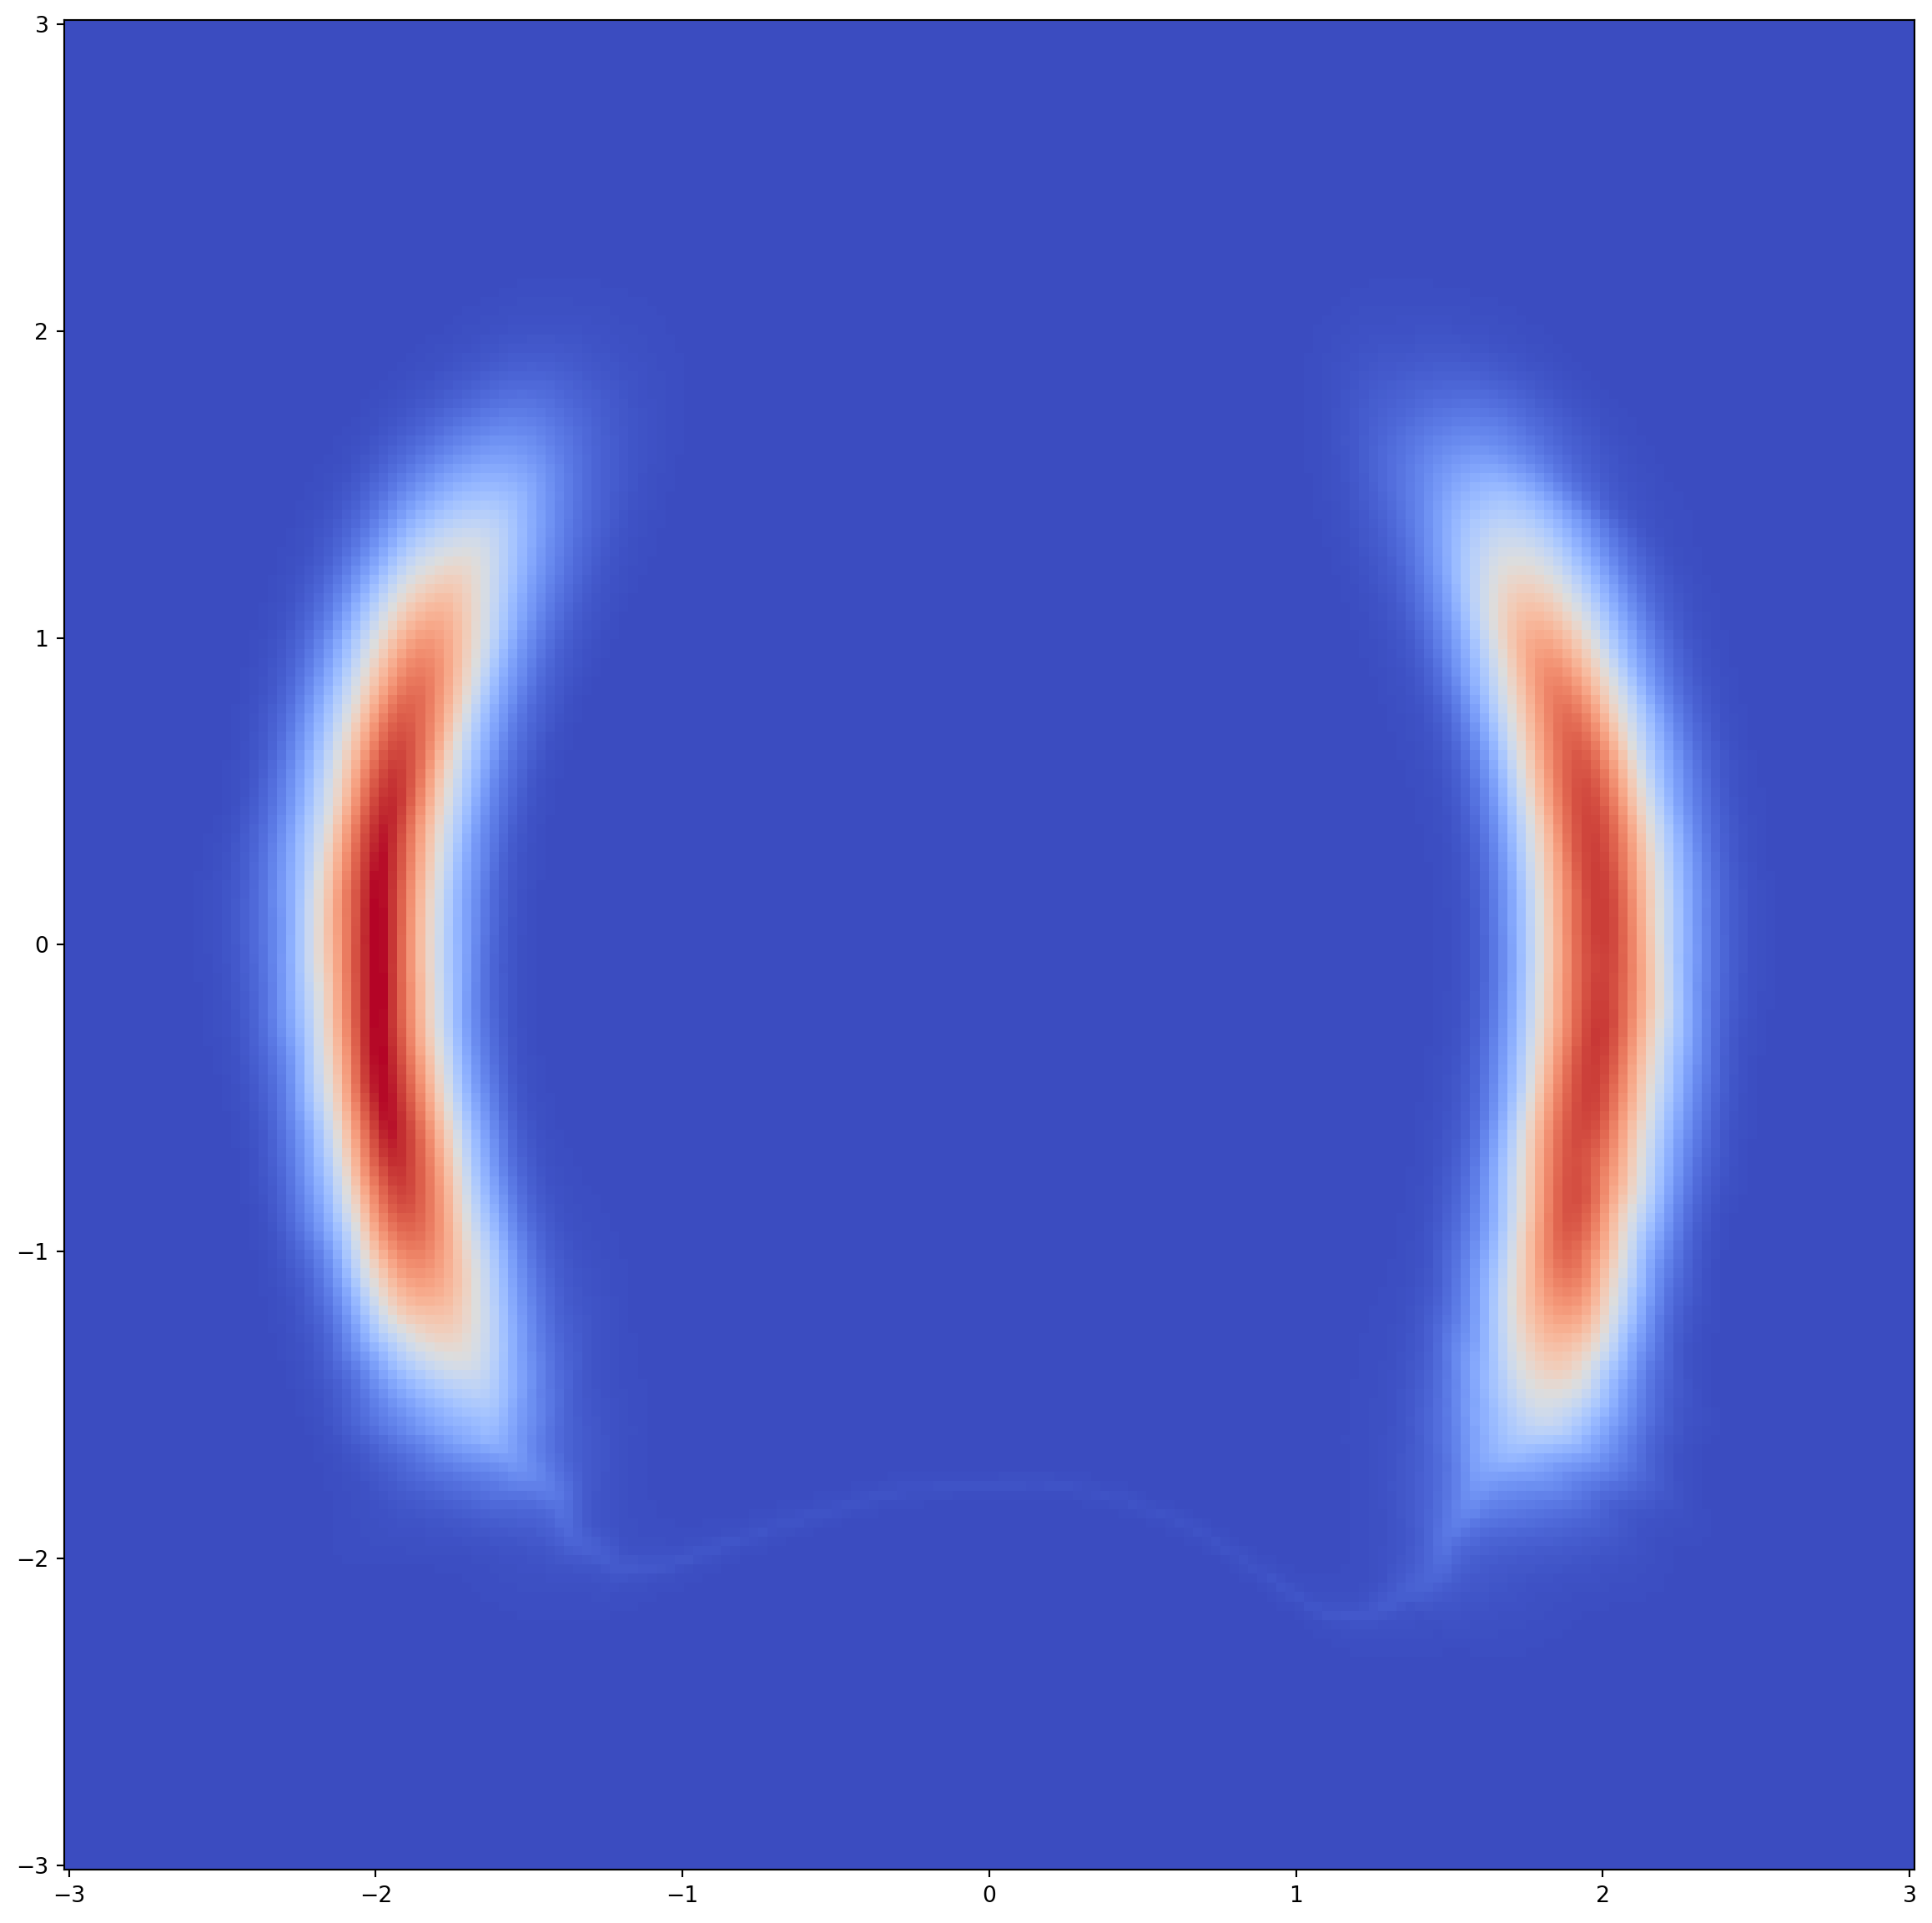

 63%|██████▎   | 2501/4000 [03:09<04:20,  5.75it/s]

 63%|██████▎   | 2503/4000 [03:10<03:35,  6.95it/s]

 63%|██████▎   | 2505/4000 [03:10<03:04,  8.12it/s]

 63%|██████▎   | 2507/4000 [03:10<02:41,  9.22it/s]

 63%|██████▎   | 2509/4000 [03:10<02:26, 10.18it/s]

 63%|██████▎   | 2511/4000 [03:10<02:15, 10.96it/s]

 63%|██████▎   | 2513/4000 [03:10<02:07, 11.62it/s]

 63%|██████▎   | 2515/4000 [03:11<02:02, 12.14it/s]

 63%|██████▎   | 2517/4000 [03:11<01:58, 12.55it/s]

 63%|██████▎   | 2519/4000 [03:11<01:55, 12.83it/s]

 63%|██████▎   | 2521/4000 [03:11<01:53, 13.06it/s]

 63%|██████▎   | 2523/4000 [03:11<01:53, 13.00it/s]

 63%|██████▎   | 2525/4000 [03:11<01:52, 13.15it/s]

 63%|██████▎   | 2527/4000 [03:11<01:51, 13.25it/s]

 63%|██████▎   | 2529/4000 [03:12<01:50, 13.33it/s]

 63%|██████▎   | 2531/4000 [03:12<01:49, 13.42it/s]

 63%|██████▎   | 2533/4000 [03:12<01:49, 13.45it/s]

 63%|██████▎   | 2535/4000 [03:12<01:48, 13.50it/s]

 63%|██████▎   | 2537/4000 [03:12<01:48, 13.54it/s]

 63%|██████▎   | 2539/4000 [03:12<01:47, 13.55it/s]

 64%|██████▎   | 2541/4000 [03:12<01:47, 13.60it/s]

 64%|██████▎   | 2543/4000 [03:13<01:47, 13.60it/s]

 64%|██████▎   | 2545/4000 [03:13<01:46, 13.60it/s]

 64%|██████▎   | 2547/4000 [03:13<01:46, 13.60it/s]

 64%|██████▎   | 2549/4000 [03:13<01:46, 13.63it/s]

 64%|██████▍   | 2551/4000 [03:13<01:46, 13.64it/s]

 64%|██████▍   | 2553/4000 [03:13<01:46, 13.64it/s]

 64%|██████▍   | 2555/4000 [03:13<01:45, 13.65it/s]

 64%|██████▍   | 2557/4000 [03:14<01:46, 13.61it/s]

 64%|██████▍   | 2559/4000 [03:14<01:45, 13.60it/s]

 64%|██████▍   | 2561/4000 [03:14<01:46, 13.53it/s]

 64%|██████▍   | 2563/4000 [03:14<01:45, 13.56it/s]

 64%|██████▍   | 2565/4000 [03:14<01:45, 13.58it/s]

 64%|██████▍   | 2567/4000 [03:14<01:45, 13.59it/s]

 64%|██████▍   | 2569/4000 [03:15<01:45, 13.59it/s]

 64%|██████▍   | 2571/4000 [03:15<01:45, 13.59it/s]

 64%|██████▍   | 2573/4000 [03:15<01:44, 13.59it/s]

 64%|██████▍   | 2575/4000 [03:15<01:45, 13.57it/s]

 64%|██████▍   | 2577/4000 [03:15<01:46, 13.30it/s]

 64%|██████▍   | 2579/4000 [03:15<01:47, 13.19it/s]

 65%|██████▍   | 2581/4000 [03:15<01:47, 13.24it/s]

 65%|██████▍   | 2583/4000 [03:16<01:46, 13.30it/s]

 65%|██████▍   | 2585/4000 [03:16<01:45, 13.36it/s]

 65%|██████▍   | 2587/4000 [03:16<01:45, 13.41it/s]

 65%|██████▍   | 2589/4000 [03:16<01:44, 13.46it/s]

 65%|██████▍   | 2591/4000 [03:16<01:44, 13.44it/s]

 65%|██████▍   | 2593/4000 [03:16<01:44, 13.48it/s]

 65%|██████▍   | 2595/4000 [03:16<01:43, 13.51it/s]

 65%|██████▍   | 2597/4000 [03:17<01:43, 13.53it/s]

 65%|██████▍   | 2599/4000 [03:17<01:43, 13.54it/s]

 65%|██████▌   | 2601/4000 [03:17<01:43, 13.55it/s]

 65%|██████▌   | 2603/4000 [03:17<01:43, 13.53it/s]

 65%|██████▌   | 2605/4000 [03:17<01:43, 13.53it/s]

 65%|██████▌   | 2607/4000 [03:17<01:42, 13.55it/s]

 65%|██████▌   | 2609/4000 [03:17<01:42, 13.55it/s]

 65%|██████▌   | 2611/4000 [03:18<01:42, 13.60it/s]

 65%|██████▌   | 2613/4000 [03:18<01:41, 13.61it/s]

 65%|██████▌   | 2615/4000 [03:18<01:41, 13.59it/s]

 65%|██████▌   | 2617/4000 [03:18<01:41, 13.62it/s]

 65%|██████▌   | 2619/4000 [03:18<01:41, 13.60it/s]

 66%|██████▌   | 2621/4000 [03:18<01:41, 13.56it/s]

 66%|██████▌   | 2623/4000 [03:19<01:41, 13.54it/s]

 66%|██████▌   | 2625/4000 [03:19<01:41, 13.57it/s]

 66%|██████▌   | 2627/4000 [03:19<01:41, 13.57it/s]

 66%|██████▌   | 2629/4000 [03:19<01:40, 13.59it/s]

 66%|██████▌   | 2631/4000 [03:19<01:40, 13.60it/s]

 66%|██████▌   | 2633/4000 [03:19<01:40, 13.57it/s]

 66%|██████▌   | 2635/4000 [03:19<01:40, 13.60it/s]

 66%|██████▌   | 2637/4000 [03:20<01:40, 13.60it/s]

 66%|██████▌   | 2639/4000 [03:20<01:40, 13.58it/s]

 66%|██████▌   | 2641/4000 [03:20<01:39, 13.61it/s]

 66%|██████▌   | 2643/4000 [03:20<01:39, 13.63it/s]

 66%|██████▌   | 2645/4000 [03:20<01:39, 13.61it/s]

 66%|██████▌   | 2647/4000 [03:20<01:39, 13.63it/s]

 66%|██████▌   | 2649/4000 [03:20<01:39, 13.61it/s]

 66%|██████▋   | 2651/4000 [03:21<01:39, 13.62it/s]

 66%|██████▋   | 2653/4000 [03:21<01:38, 13.64it/s]

 66%|██████▋   | 2655/4000 [03:21<01:38, 13.61it/s]

 66%|██████▋   | 2657/4000 [03:21<01:38, 13.61it/s]

 66%|██████▋   | 2659/4000 [03:21<01:38, 13.62it/s]

 67%|██████▋   | 2661/4000 [03:21<01:38, 13.61it/s]

 67%|██████▋   | 2663/4000 [03:21<01:38, 13.59it/s]

 67%|██████▋   | 2665/4000 [03:22<01:38, 13.60it/s]

 67%|██████▋   | 2667/4000 [03:22<01:38, 13.56it/s]

 67%|██████▋   | 2669/4000 [03:22<01:37, 13.59it/s]

 67%|██████▋   | 2671/4000 [03:22<01:37, 13.62it/s]

 67%|██████▋   | 2673/4000 [03:22<01:37, 13.58it/s]

 67%|██████▋   | 2675/4000 [03:22<01:37, 13.61it/s]

 67%|██████▋   | 2677/4000 [03:22<01:37, 13.60it/s]

 67%|██████▋   | 2679/4000 [03:23<01:37, 13.57it/s]

 67%|██████▋   | 2681/4000 [03:23<01:37, 13.52it/s]

 67%|██████▋   | 2683/4000 [03:23<01:37, 13.56it/s]

 67%|██████▋   | 2685/4000 [03:23<01:36, 13.57it/s]

 67%|██████▋   | 2687/4000 [03:23<01:36, 13.59it/s]

 67%|██████▋   | 2689/4000 [03:23<01:36, 13.60it/s]

 67%|██████▋   | 2691/4000 [03:24<01:36, 13.62it/s]

 67%|██████▋   | 2693/4000 [03:24<01:35, 13.62it/s]

 67%|██████▋   | 2695/4000 [03:24<01:35, 13.65it/s]

 67%|██████▋   | 2697/4000 [03:24<01:35, 13.66it/s]

 67%|██████▋   | 2699/4000 [03:24<01:35, 13.67it/s]

 68%|██████▊   | 2701/4000 [03:24<01:35, 13.64it/s]

 68%|██████▊   | 2703/4000 [03:24<01:35, 13.58it/s]

 68%|██████▊   | 2705/4000 [03:25<01:35, 13.57it/s]

 68%|██████▊   | 2707/4000 [03:25<01:35, 13.60it/s]

 68%|██████▊   | 2709/4000 [03:25<01:34, 13.62it/s]

 68%|██████▊   | 2711/4000 [03:25<01:34, 13.65it/s]

 68%|██████▊   | 2713/4000 [03:25<01:34, 13.63it/s]

 68%|██████▊   | 2715/4000 [03:25<01:34, 13.62it/s]

 68%|██████▊   | 2717/4000 [03:25<01:33, 13.65it/s]

 68%|██████▊   | 2719/4000 [03:26<01:34, 13.62it/s]

 68%|██████▊   | 2721/4000 [03:26<01:33, 13.65it/s]

 68%|██████▊   | 2723/4000 [03:26<01:33, 13.66it/s]

 68%|██████▊   | 2725/4000 [03:26<01:34, 13.55it/s]

 68%|██████▊   | 2727/4000 [03:26<01:33, 13.59it/s]

 68%|██████▊   | 2729/4000 [03:26<01:33, 13.58it/s]

 68%|██████▊   | 2731/4000 [03:26<01:33, 13.60it/s]

 68%|██████▊   | 2733/4000 [03:27<01:33, 13.61it/s]

 68%|██████▊   | 2735/4000 [03:27<01:32, 13.63it/s]

 68%|██████▊   | 2737/4000 [03:27<01:32, 13.63it/s]

 68%|██████▊   | 2739/4000 [03:27<01:32, 13.65it/s]

 69%|██████▊   | 2741/4000 [03:27<01:32, 13.63it/s]

 69%|██████▊   | 2743/4000 [03:27<01:32, 13.62it/s]

 69%|██████▊   | 2745/4000 [03:27<01:32, 13.63it/s]

 69%|██████▊   | 2747/4000 [03:28<01:32, 13.61it/s]

 69%|██████▊   | 2749/4000 [03:28<01:31, 13.61it/s]

 69%|██████▉   | 2751/4000 [03:28<01:31, 13.61it/s]

 69%|██████▉   | 2753/4000 [03:28<01:31, 13.63it/s]

 69%|██████▉   | 2755/4000 [03:28<01:31, 13.64it/s]

 69%|██████▉   | 2757/4000 [03:28<01:31, 13.64it/s]

 69%|██████▉   | 2759/4000 [03:28<01:30, 13.66it/s]

 69%|██████▉   | 2761/4000 [03:29<01:30, 13.65it/s]

 69%|██████▉   | 2763/4000 [03:29<01:30, 13.67it/s]

 69%|██████▉   | 2765/4000 [03:29<01:30, 13.61it/s]

 69%|██████▉   | 2767/4000 [03:29<01:30, 13.59it/s]

 69%|██████▉   | 2769/4000 [03:29<01:30, 13.59it/s]

 69%|██████▉   | 2771/4000 [03:29<01:30, 13.61it/s]

 69%|██████▉   | 2773/4000 [03:30<01:30, 13.61it/s]

 69%|██████▉   | 2775/4000 [03:30<01:29, 13.66it/s]

 69%|██████▉   | 2777/4000 [03:30<01:29, 13.63it/s]

 69%|██████▉   | 2779/4000 [03:30<01:29, 13.63it/s]

 70%|██████▉   | 2781/4000 [03:30<01:29, 13.64it/s]

 70%|██████▉   | 2783/4000 [03:30<01:29, 13.66it/s]

 70%|██████▉   | 2785/4000 [03:30<01:29, 13.60it/s]

 70%|██████▉   | 2787/4000 [03:31<01:29, 13.62it/s]

 70%|██████▉   | 2789/4000 [03:31<01:29, 13.58it/s]

 70%|██████▉   | 2791/4000 [03:31<01:28, 13.62it/s]

 70%|██████▉   | 2793/4000 [03:31<01:28, 13.62it/s]

 70%|██████▉   | 2795/4000 [03:31<01:28, 13.61it/s]

 70%|██████▉   | 2797/4000 [03:31<01:28, 13.63it/s]

 70%|██████▉   | 2799/4000 [03:31<01:28, 13.64it/s]

 70%|███████   | 2801/4000 [03:32<01:27, 13.65it/s]

 70%|███████   | 2803/4000 [03:32<01:27, 13.65it/s]

 70%|███████   | 2805/4000 [03:32<01:27, 13.67it/s]

 70%|███████   | 2807/4000 [03:32<01:28, 13.54it/s]

 70%|███████   | 2809/4000 [03:32<01:28, 13.51it/s]

 70%|███████   | 2811/4000 [03:32<01:28, 13.50it/s]

 70%|███████   | 2813/4000 [03:32<01:28, 13.48it/s]

 70%|███████   | 2815/4000 [03:33<01:27, 13.52it/s]

 70%|███████   | 2817/4000 [03:33<01:27, 13.56it/s]

 70%|███████   | 2819/4000 [03:33<01:26, 13.59it/s]

 71%|███████   | 2821/4000 [03:33<01:26, 13.61it/s]

 71%|███████   | 2823/4000 [03:33<01:26, 13.65it/s]

 71%|███████   | 2825/4000 [03:33<01:26, 13.63it/s]

 71%|███████   | 2827/4000 [03:33<01:26, 13.60it/s]

 71%|███████   | 2829/4000 [03:34<01:26, 13.59it/s]

 71%|███████   | 2831/4000 [03:34<01:25, 13.60it/s]

 71%|███████   | 2833/4000 [03:34<01:25, 13.60it/s]

 71%|███████   | 2835/4000 [03:34<01:25, 13.56it/s]

 71%|███████   | 2837/4000 [03:34<01:25, 13.58it/s]

 71%|███████   | 2839/4000 [03:34<01:25, 13.60it/s]

 71%|███████   | 2841/4000 [03:35<01:25, 13.63it/s]

 71%|███████   | 2843/4000 [03:35<01:24, 13.63it/s]

 71%|███████   | 2845/4000 [03:35<01:24, 13.61it/s]

 71%|███████   | 2847/4000 [03:35<01:24, 13.63it/s]

 71%|███████   | 2849/4000 [03:35<01:25, 13.48it/s]

 71%|███████▏  | 2851/4000 [03:35<01:24, 13.53it/s]

 71%|███████▏  | 2853/4000 [03:35<01:24, 13.57it/s]

 71%|███████▏  | 2855/4000 [03:36<01:24, 13.55it/s]

 71%|███████▏  | 2857/4000 [03:36<01:24, 13.57it/s]

 71%|███████▏  | 2859/4000 [03:36<01:24, 13.56it/s]

 72%|███████▏  | 2861/4000 [03:36<01:23, 13.58it/s]

 72%|███████▏  | 2863/4000 [03:36<01:23, 13.56it/s]

 72%|███████▏  | 2865/4000 [03:36<01:23, 13.59it/s]

 72%|███████▏  | 2867/4000 [03:36<01:23, 13.60it/s]

 72%|███████▏  | 2869/4000 [03:37<01:23, 13.60it/s]

 72%|███████▏  | 2871/4000 [03:37<01:23, 13.60it/s]

 72%|███████▏  | 2873/4000 [03:37<01:22, 13.63it/s]

 72%|███████▏  | 2875/4000 [03:37<01:22, 13.64it/s]

 72%|███████▏  | 2877/4000 [03:37<01:22, 13.67it/s]

 72%|███████▏  | 2879/4000 [03:37<01:22, 13.64it/s]

 72%|███████▏  | 2881/4000 [03:37<01:22, 13.64it/s]

 72%|███████▏  | 2883/4000 [03:38<01:22, 13.60it/s]

 72%|███████▏  | 2885/4000 [03:38<01:21, 13.63it/s]

 72%|███████▏  | 2887/4000 [03:38<01:21, 13.61it/s]

 72%|███████▏  | 2889/4000 [03:38<01:21, 13.64it/s]

 72%|███████▏  | 2891/4000 [03:38<01:21, 13.60it/s]

 72%|███████▏  | 2893/4000 [03:38<01:21, 13.64it/s]

 72%|███████▏  | 2895/4000 [03:38<01:21, 13.64it/s]

 72%|███████▏  | 2897/4000 [03:39<01:21, 13.62it/s]

 72%|███████▏  | 2899/4000 [03:39<01:20, 13.60it/s]

 73%|███████▎  | 2901/4000 [03:39<01:20, 13.59it/s]

 73%|███████▎  | 2903/4000 [03:39<01:20, 13.60it/s]

 73%|███████▎  | 2905/4000 [03:39<01:20, 13.63it/s]

 73%|███████▎  | 2907/4000 [03:39<01:20, 13.62it/s]

 73%|███████▎  | 2909/4000 [03:40<01:20, 13.63it/s]

 73%|███████▎  | 2911/4000 [03:40<01:19, 13.65it/s]

 73%|███████▎  | 2913/4000 [03:40<01:19, 13.67it/s]

 73%|███████▎  | 2915/4000 [03:40<01:19, 13.65it/s]

 73%|███████▎  | 2917/4000 [03:40<01:19, 13.64it/s]

 73%|███████▎  | 2919/4000 [03:40<01:19, 13.58it/s]

 73%|███████▎  | 2921/4000 [03:40<01:19, 13.61it/s]

 73%|███████▎  | 2923/4000 [03:41<01:18, 13.65it/s]

 73%|███████▎  | 2925/4000 [03:41<01:18, 13.67it/s]

 73%|███████▎  | 2927/4000 [03:41<01:18, 13.65it/s]

 73%|███████▎  | 2929/4000 [03:41<01:18, 13.66it/s]

 73%|███████▎  | 2931/4000 [03:41<01:18, 13.62it/s]

 73%|███████▎  | 2933/4000 [03:41<01:18, 13.67it/s]

 73%|███████▎  | 2935/4000 [03:41<01:17, 13.69it/s]

 73%|███████▎  | 2937/4000 [03:42<01:18, 13.48it/s]

 73%|███████▎  | 2939/4000 [03:42<01:19, 13.34it/s]

 74%|███████▎  | 2941/4000 [03:42<01:19, 13.37it/s]

 74%|███████▎  | 2943/4000 [03:42<01:18, 13.46it/s]

 74%|███████▎  | 2945/4000 [03:42<01:18, 13.50it/s]

 74%|███████▎  | 2947/4000 [03:42<01:17, 13.55it/s]

 74%|███████▎  | 2949/4000 [03:42<01:17, 13.59it/s]

 74%|███████▍  | 2951/4000 [03:43<01:17, 13.52it/s]

 74%|███████▍  | 2953/4000 [03:43<01:17, 13.54it/s]

 74%|███████▍  | 2955/4000 [03:43<01:17, 13.55it/s]

 74%|███████▍  | 2957/4000 [03:43<01:16, 13.58it/s]

 74%|███████▍  | 2959/4000 [03:43<01:17, 13.39it/s]

 74%|███████▍  | 2961/4000 [03:43<01:18, 13.31it/s]

 74%|███████▍  | 2963/4000 [03:44<01:17, 13.34it/s]

 74%|███████▍  | 2965/4000 [03:44<01:17, 13.42it/s]

 74%|███████▍  | 2967/4000 [03:44<01:16, 13.48it/s]

 74%|███████▍  | 2969/4000 [03:44<01:16, 13.49it/s]

 74%|███████▍  | 2971/4000 [03:44<01:16, 13.53it/s]

 74%|███████▍  | 2973/4000 [03:44<01:16, 13.36it/s]

 74%|███████▍  | 2975/4000 [03:44<01:17, 13.30it/s]

 74%|███████▍  | 2977/4000 [03:45<01:16, 13.35it/s]

 74%|███████▍  | 2979/4000 [03:45<01:16, 13.40it/s]

 75%|███████▍  | 2981/4000 [03:45<01:16, 13.40it/s]

 75%|███████▍  | 2983/4000 [03:45<01:15, 13.46it/s]

 75%|███████▍  | 2985/4000 [03:45<01:15, 13.53it/s]

 75%|███████▍  | 2987/4000 [03:45<01:14, 13.54it/s]

 75%|███████▍  | 2989/4000 [03:45<01:14, 13.57it/s]

 75%|███████▍  | 2991/4000 [03:46<01:14, 13.60it/s]

 75%|███████▍  | 2993/4000 [03:46<01:14, 13.60it/s]

 75%|███████▍  | 2995/4000 [03:46<01:13, 13.62it/s]

 75%|███████▍  | 2997/4000 [03:46<01:13, 13.66it/s]

 75%|███████▍  | 2999/4000 [03:46<01:13, 13.69it/s]

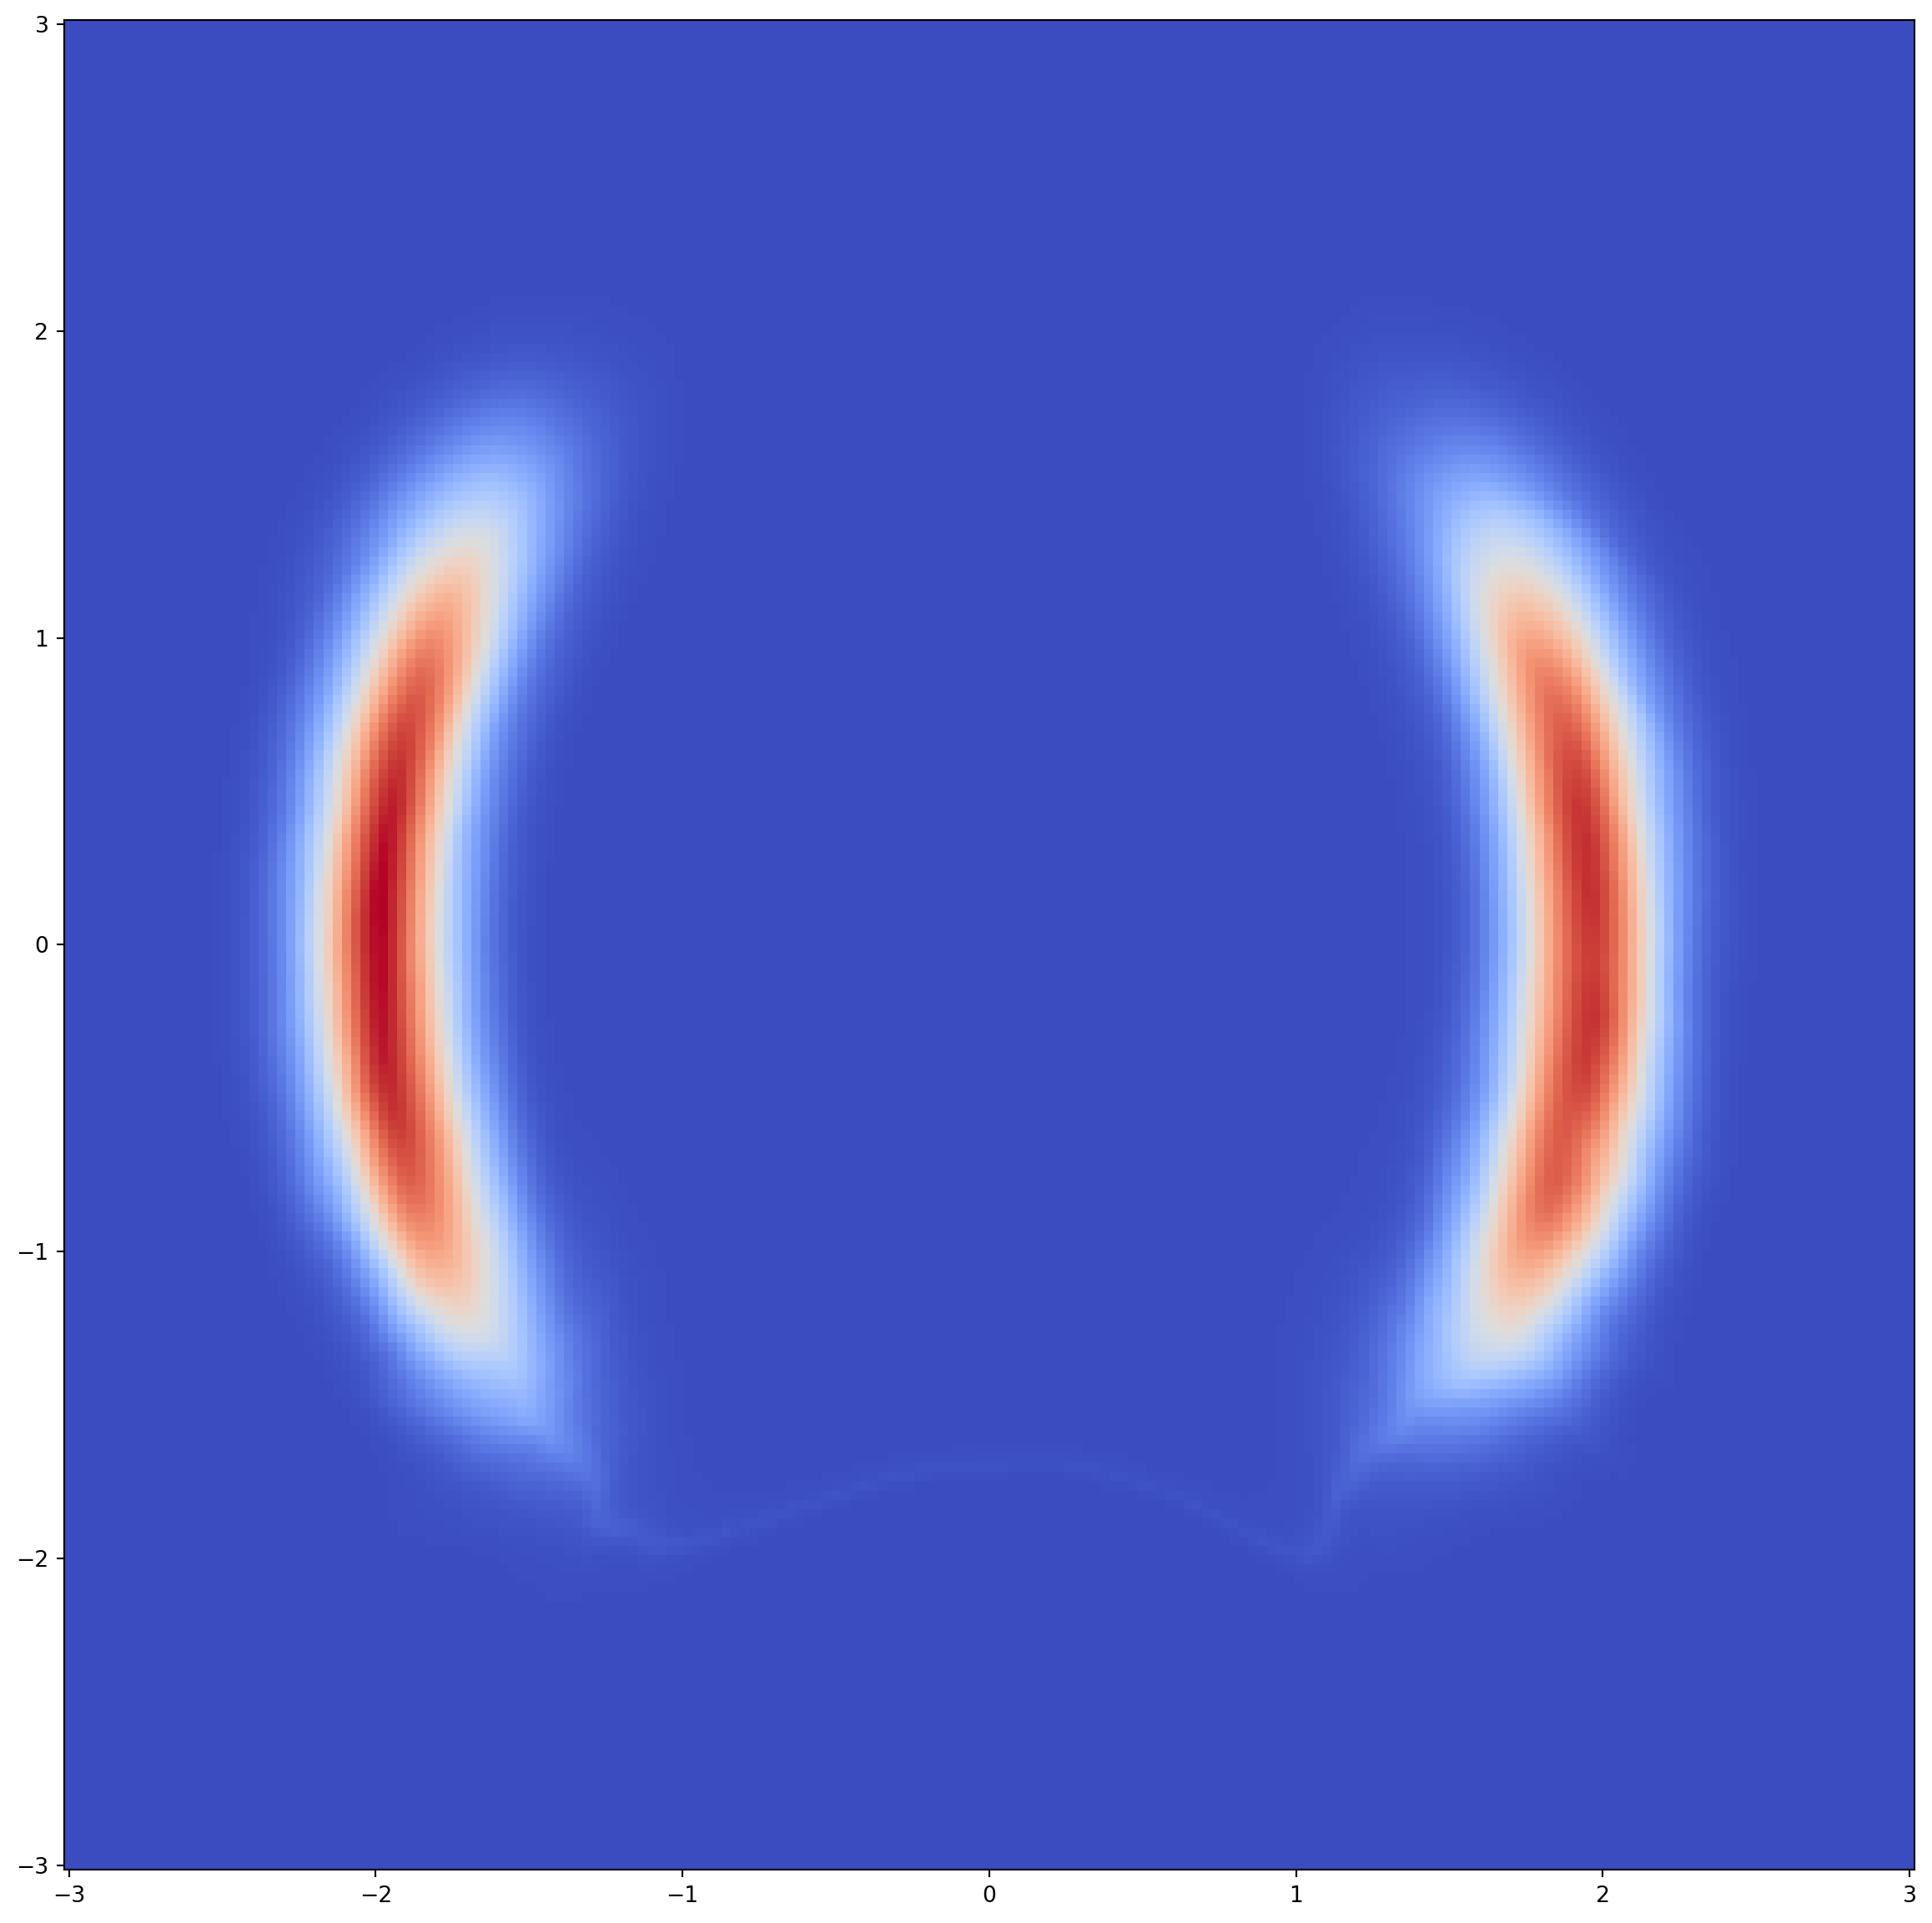

 75%|███████▌  | 3001/4000 [03:47<02:51,  5.83it/s]

 75%|███████▌  | 3003/4000 [03:47<02:21,  7.03it/s]

 75%|███████▌  | 3005/4000 [03:47<02:01,  8.20it/s]

 75%|███████▌  | 3007/4000 [03:47<01:46,  9.29it/s]

 75%|███████▌  | 3009/4000 [03:48<01:36, 10.27it/s]

 75%|███████▌  | 3011/4000 [03:48<01:29, 11.07it/s]

 75%|███████▌  | 3013/4000 [03:48<01:24, 11.70it/s]

 75%|███████▌  | 3015/4000 [03:48<01:20, 12.17it/s]

 75%|███████▌  | 3017/4000 [03:48<01:18, 12.54it/s]

 75%|███████▌  | 3019/4000 [03:48<01:16, 12.77it/s]

 76%|███████▌  | 3021/4000 [03:48<01:15, 12.98it/s]

 76%|███████▌  | 3023/4000 [03:49<01:14, 13.13it/s]

 76%|███████▌  | 3025/4000 [03:49<01:13, 13.26it/s]

 76%|███████▌  | 3027/4000 [03:49<01:12, 13.37it/s]

 76%|███████▌  | 3029/4000 [03:49<01:12, 13.41it/s]

 76%|███████▌  | 3031/4000 [03:49<01:12, 13.44it/s]

 76%|███████▌  | 3033/4000 [03:49<01:11, 13.46it/s]

 76%|███████▌  | 3035/4000 [03:49<01:11, 13.48it/s]

 76%|███████▌  | 3037/4000 [03:50<01:11, 13.48it/s]

 76%|███████▌  | 3039/4000 [03:50<01:11, 13.52it/s]

 76%|███████▌  | 3041/4000 [03:50<01:10, 13.53it/s]

 76%|███████▌  | 3043/4000 [03:50<01:10, 13.56it/s]

 76%|███████▌  | 3045/4000 [03:50<01:10, 13.55it/s]

 76%|███████▌  | 3047/4000 [03:50<01:10, 13.48it/s]

 76%|███████▌  | 3049/4000 [03:51<01:10, 13.50it/s]

 76%|███████▋  | 3051/4000 [03:51<01:10, 13.50it/s]

 76%|███████▋  | 3053/4000 [03:51<01:10, 13.50it/s]

 76%|███████▋  | 3055/4000 [03:51<01:09, 13.52it/s]

 76%|███████▋  | 3057/4000 [03:51<01:09, 13.51it/s]

 76%|███████▋  | 3059/4000 [03:51<01:09, 13.54it/s]

 77%|███████▋  | 3061/4000 [03:51<01:09, 13.58it/s]

 77%|███████▋  | 3063/4000 [03:52<01:09, 13.52it/s]

 77%|███████▋  | 3065/4000 [03:52<01:09, 13.53it/s]

 77%|███████▋  | 3067/4000 [03:52<01:09, 13.47it/s]

 77%|███████▋  | 3069/4000 [03:52<01:08, 13.51it/s]

 77%|███████▋  | 3071/4000 [03:52<01:08, 13.54it/s]

 77%|███████▋  | 3073/4000 [03:52<01:08, 13.54it/s]

 77%|███████▋  | 3075/4000 [03:52<01:08, 13.55it/s]

 77%|███████▋  | 3077/4000 [03:53<01:08, 13.57it/s]

 77%|███████▋  | 3079/4000 [03:53<01:07, 13.57it/s]

 77%|███████▋  | 3081/4000 [03:53<01:07, 13.53it/s]

 77%|███████▋  | 3083/4000 [03:53<01:07, 13.56it/s]

 77%|███████▋  | 3085/4000 [03:53<01:07, 13.61it/s]

 77%|███████▋  | 3087/4000 [03:53<01:06, 13.63it/s]

 77%|███████▋  | 3089/4000 [03:53<01:06, 13.62it/s]

 77%|███████▋  | 3091/4000 [03:54<01:06, 13.60it/s]

 77%|███████▋  | 3093/4000 [03:54<01:06, 13.58it/s]

 77%|███████▋  | 3095/4000 [03:54<01:06, 13.57it/s]

 77%|███████▋  | 3097/4000 [03:54<01:06, 13.57it/s]

 77%|███████▋  | 3099/4000 [03:54<01:06, 13.56it/s]

 78%|███████▊  | 3101/4000 [03:54<01:06, 13.57it/s]

 78%|███████▊  | 3103/4000 [03:55<01:06, 13.56it/s]

 78%|███████▊  | 3105/4000 [03:55<01:05, 13.56it/s]

 78%|███████▊  | 3107/4000 [03:55<01:05, 13.56it/s]

 78%|███████▊  | 3109/4000 [03:55<01:05, 13.58it/s]

 78%|███████▊  | 3111/4000 [03:55<01:05, 13.53it/s]

 78%|███████▊  | 3113/4000 [03:55<01:05, 13.55it/s]

 78%|███████▊  | 3115/4000 [03:55<01:05, 13.52it/s]

 78%|███████▊  | 3117/4000 [03:56<01:05, 13.54it/s]

 78%|███████▊  | 3119/4000 [03:56<01:05, 13.55it/s]

 78%|███████▊  | 3121/4000 [03:56<01:04, 13.56it/s]

 78%|███████▊  | 3123/4000 [03:56<01:04, 13.57it/s]

 78%|███████▊  | 3125/4000 [03:56<01:04, 13.57it/s]

 78%|███████▊  | 3127/4000 [03:56<01:04, 13.56it/s]

 78%|███████▊  | 3129/4000 [03:56<01:04, 13.59it/s]

 78%|███████▊  | 3131/4000 [03:57<01:04, 13.55it/s]

 78%|███████▊  | 3133/4000 [03:57<01:04, 13.53it/s]

 78%|███████▊  | 3135/4000 [03:57<01:03, 13.55it/s]

 78%|███████▊  | 3137/4000 [03:57<01:03, 13.56it/s]

 78%|███████▊  | 3139/4000 [03:57<01:03, 13.61it/s]

 79%|███████▊  | 3141/4000 [03:57<01:03, 13.58it/s]

 79%|███████▊  | 3143/4000 [03:57<01:03, 13.57it/s]

 79%|███████▊  | 3145/4000 [03:58<01:02, 13.58it/s]

 79%|███████▊  | 3147/4000 [03:58<01:02, 13.58it/s]

 79%|███████▊  | 3149/4000 [03:58<01:02, 13.57it/s]

 79%|███████▉  | 3151/4000 [03:58<01:02, 13.55it/s]

 79%|███████▉  | 3153/4000 [03:58<01:02, 13.57it/s]

 79%|███████▉  | 3155/4000 [03:58<01:02, 13.60it/s]

 79%|███████▉  | 3157/4000 [03:58<01:01, 13.61it/s]

 79%|███████▉  | 3159/4000 [03:59<01:01, 13.60it/s]

 79%|███████▉  | 3161/4000 [03:59<01:01, 13.60it/s]

 79%|███████▉  | 3163/4000 [03:59<01:01, 13.60it/s]

 79%|███████▉  | 3165/4000 [03:59<01:01, 13.61it/s]

 79%|███████▉  | 3167/4000 [03:59<01:01, 13.61it/s]

 79%|███████▉  | 3169/4000 [03:59<01:01, 13.59it/s]

 79%|███████▉  | 3171/4000 [04:00<01:00, 13.61it/s]

 79%|███████▉  | 3173/4000 [04:00<01:00, 13.63it/s]

 79%|███████▉  | 3175/4000 [04:00<01:00, 13.61it/s]

 79%|███████▉  | 3177/4000 [04:00<01:00, 13.61it/s]

 79%|███████▉  | 3179/4000 [04:00<01:00, 13.63it/s]

 80%|███████▉  | 3181/4000 [04:00<01:00, 13.62it/s]

 80%|███████▉  | 3183/4000 [04:00<00:59, 13.62it/s]

 80%|███████▉  | 3185/4000 [04:01<00:59, 13.63it/s]

 80%|███████▉  | 3187/4000 [04:01<00:59, 13.61it/s]

 80%|███████▉  | 3189/4000 [04:01<00:59, 13.60it/s]

 80%|███████▉  | 3191/4000 [04:01<00:59, 13.60it/s]

 80%|███████▉  | 3193/4000 [04:01<00:59, 13.57it/s]

 80%|███████▉  | 3195/4000 [04:01<00:59, 13.54it/s]

 80%|███████▉  | 3197/4000 [04:01<00:59, 13.56it/s]

 80%|███████▉  | 3199/4000 [04:02<00:58, 13.59it/s]

 80%|████████  | 3201/4000 [04:02<00:58, 13.58it/s]

 80%|████████  | 3203/4000 [04:02<00:58, 13.59it/s]

 80%|████████  | 3205/4000 [04:02<00:58, 13.50it/s]

 80%|████████  | 3207/4000 [04:02<00:58, 13.52it/s]

 80%|████████  | 3209/4000 [04:02<00:58, 13.51it/s]

 80%|████████  | 3211/4000 [04:02<00:58, 13.53it/s]

 80%|████████  | 3213/4000 [04:03<00:58, 13.56it/s]

 80%|████████  | 3215/4000 [04:03<00:57, 13.56it/s]

 80%|████████  | 3217/4000 [04:03<00:57, 13.59it/s]

 80%|████████  | 3219/4000 [04:03<00:57, 13.58it/s]

 81%|████████  | 3221/4000 [04:03<00:57, 13.55it/s]

 81%|████████  | 3223/4000 [04:03<00:57, 13.55it/s]

 81%|████████  | 3225/4000 [04:03<00:57, 13.57it/s]

 81%|████████  | 3227/4000 [04:04<00:56, 13.58it/s]

 81%|████████  | 3229/4000 [04:04<00:56, 13.58it/s]

 81%|████████  | 3231/4000 [04:04<00:56, 13.55it/s]

 81%|████████  | 3233/4000 [04:04<00:56, 13.55it/s]

 81%|████████  | 3235/4000 [04:04<00:56, 13.55it/s]

 81%|████████  | 3237/4000 [04:04<00:56, 13.56it/s]

 81%|████████  | 3239/4000 [04:05<00:56, 13.56it/s]

 81%|████████  | 3241/4000 [04:05<00:56, 13.53it/s]

 81%|████████  | 3243/4000 [04:05<00:55, 13.54it/s]

 81%|████████  | 3245/4000 [04:05<00:55, 13.51it/s]

 81%|████████  | 3247/4000 [04:05<00:55, 13.56it/s]

 81%|████████  | 3249/4000 [04:05<00:55, 13.58it/s]

 81%|████████▏ | 3251/4000 [04:05<00:55, 13.61it/s]

 81%|████████▏ | 3253/4000 [04:06<00:54, 13.59it/s]

 81%|████████▏ | 3255/4000 [04:06<00:54, 13.57it/s]

 81%|████████▏ | 3257/4000 [04:06<00:54, 13.58it/s]

 81%|████████▏ | 3259/4000 [04:06<00:54, 13.59it/s]

 82%|████████▏ | 3261/4000 [04:06<00:54, 13.57it/s]

 82%|████████▏ | 3263/4000 [04:06<00:54, 13.56it/s]

 82%|████████▏ | 3265/4000 [04:06<00:54, 13.59it/s]

 82%|████████▏ | 3267/4000 [04:07<00:53, 13.57it/s]

 82%|████████▏ | 3269/4000 [04:07<00:53, 13.56it/s]

 82%|████████▏ | 3271/4000 [04:07<00:53, 13.56it/s]

 82%|████████▏ | 3273/4000 [04:07<00:53, 13.58it/s]

 82%|████████▏ | 3275/4000 [04:07<00:53, 13.60it/s]

 82%|████████▏ | 3277/4000 [04:07<00:53, 13.60it/s]

 82%|████████▏ | 3279/4000 [04:07<00:53, 13.56it/s]

 82%|████████▏ | 3281/4000 [04:08<00:52, 13.57it/s]

 82%|████████▏ | 3283/4000 [04:08<00:52, 13.56it/s]

 82%|████████▏ | 3285/4000 [04:08<00:52, 13.55it/s]

 82%|████████▏ | 3287/4000 [04:08<00:52, 13.57it/s]

 82%|████████▏ | 3289/4000 [04:08<00:52, 13.56it/s]

 82%|████████▏ | 3291/4000 [04:08<00:52, 13.54it/s]

 82%|████████▏ | 3293/4000 [04:09<00:52, 13.54it/s]

 82%|████████▏ | 3295/4000 [04:09<00:52, 13.54it/s]

 82%|████████▏ | 3297/4000 [04:09<00:51, 13.55it/s]

 82%|████████▏ | 3299/4000 [04:09<00:51, 13.57it/s]

 83%|████████▎ | 3301/4000 [04:09<00:51, 13.54it/s]

 83%|████████▎ | 3303/4000 [04:09<00:51, 13.58it/s]

 83%|████████▎ | 3305/4000 [04:09<00:51, 13.56it/s]

 83%|████████▎ | 3307/4000 [04:10<00:51, 13.55it/s]

 83%|████████▎ | 3309/4000 [04:10<00:50, 13.57it/s]

 83%|████████▎ | 3311/4000 [04:10<00:50, 13.56it/s]

 83%|████████▎ | 3313/4000 [04:10<00:50, 13.55it/s]

 83%|████████▎ | 3315/4000 [04:10<00:50, 13.57it/s]

 83%|████████▎ | 3317/4000 [04:10<00:50, 13.59it/s]

 83%|████████▎ | 3319/4000 [04:10<00:50, 13.62it/s]

 83%|████████▎ | 3321/4000 [04:11<00:49, 13.62it/s]

 83%|████████▎ | 3323/4000 [04:11<00:49, 13.62it/s]

 83%|████████▎ | 3325/4000 [04:11<00:49, 13.66it/s]

 83%|████████▎ | 3327/4000 [04:11<00:49, 13.65it/s]

 83%|████████▎ | 3329/4000 [04:11<00:49, 13.64it/s]

 83%|████████▎ | 3331/4000 [04:11<00:49, 13.59it/s]

 83%|████████▎ | 3333/4000 [04:11<00:49, 13.59it/s]

 83%|████████▎ | 3335/4000 [04:12<00:48, 13.59it/s]

 83%|████████▎ | 3337/4000 [04:12<00:48, 13.60it/s]

 83%|████████▎ | 3339/4000 [04:12<00:48, 13.57it/s]

 84%|████████▎ | 3341/4000 [04:12<00:48, 13.58it/s]

 84%|████████▎ | 3343/4000 [04:12<00:48, 13.59it/s]

 84%|████████▎ | 3345/4000 [04:12<00:48, 13.56it/s]

 84%|████████▎ | 3347/4000 [04:12<00:48, 13.56it/s]

 84%|████████▎ | 3349/4000 [04:13<00:48, 13.56it/s]

 84%|████████▍ | 3351/4000 [04:13<00:47, 13.57it/s]

 84%|████████▍ | 3353/4000 [04:13<00:47, 13.58it/s]

 84%|████████▍ | 3355/4000 [04:13<00:47, 13.58it/s]

 84%|████████▍ | 3357/4000 [04:13<00:47, 13.57it/s]

 84%|████████▍ | 3359/4000 [04:13<00:47, 13.56it/s]

 84%|████████▍ | 3361/4000 [04:14<00:47, 13.56it/s]

 84%|████████▍ | 3363/4000 [04:14<00:46, 13.58it/s]

 84%|████████▍ | 3365/4000 [04:14<00:46, 13.59it/s]

 84%|████████▍ | 3367/4000 [04:14<00:46, 13.56it/s]

 84%|████████▍ | 3369/4000 [04:14<00:46, 13.57it/s]

 84%|████████▍ | 3371/4000 [04:14<00:46, 13.57it/s]

 84%|████████▍ | 3373/4000 [04:14<00:46, 13.60it/s]

 84%|████████▍ | 3375/4000 [04:15<00:45, 13.64it/s]

 84%|████████▍ | 3377/4000 [04:15<00:45, 13.66it/s]

 84%|████████▍ | 3379/4000 [04:15<00:45, 13.64it/s]

 85%|████████▍ | 3381/4000 [04:15<00:45, 13.63it/s]

 85%|████████▍ | 3383/4000 [04:15<00:45, 13.60it/s]

 85%|████████▍ | 3385/4000 [04:15<00:45, 13.51it/s]

 85%|████████▍ | 3387/4000 [04:15<00:46, 13.25it/s]

 85%|████████▍ | 3389/4000 [04:16<00:46, 13.23it/s]

 85%|████████▍ | 3391/4000 [04:16<00:45, 13.29it/s]

 85%|████████▍ | 3393/4000 [04:16<00:45, 13.40it/s]

 85%|████████▍ | 3395/4000 [04:16<00:48, 12.56it/s]

 85%|████████▍ | 3397/4000 [04:16<00:46, 12.83it/s]

 85%|████████▍ | 3399/4000 [04:16<00:45, 13.08it/s]

 85%|████████▌ | 3401/4000 [04:17<00:45, 13.25it/s]

 85%|████████▌ | 3403/4000 [04:17<00:44, 13.38it/s]

 85%|████████▌ | 3405/4000 [04:17<00:44, 13.44it/s]

 85%|████████▌ | 3407/4000 [04:17<00:43, 13.51it/s]

 85%|████████▌ | 3409/4000 [04:17<00:43, 13.53it/s]

 85%|████████▌ | 3411/4000 [04:17<00:43, 13.56it/s]

 85%|████████▌ | 3413/4000 [04:17<00:43, 13.62it/s]

 85%|████████▌ | 3415/4000 [04:18<00:42, 13.62it/s]

 85%|████████▌ | 3417/4000 [04:18<00:42, 13.61it/s]

 85%|████████▌ | 3419/4000 [04:18<00:42, 13.62it/s]

 86%|████████▌ | 3421/4000 [04:18<00:42, 13.60it/s]

 86%|████████▌ | 3423/4000 [04:18<00:42, 13.61it/s]

 86%|████████▌ | 3425/4000 [04:18<00:42, 13.65it/s]

 86%|████████▌ | 3427/4000 [04:18<00:42, 13.59it/s]

 86%|████████▌ | 3429/4000 [04:19<00:42, 13.57it/s]

 86%|████████▌ | 3431/4000 [04:19<00:41, 13.58it/s]

 86%|████████▌ | 3433/4000 [04:19<00:41, 13.59it/s]

 86%|████████▌ | 3435/4000 [04:19<00:41, 13.59it/s]

 86%|████████▌ | 3437/4000 [04:19<00:41, 13.60it/s]

 86%|████████▌ | 3439/4000 [04:19<00:41, 13.61it/s]

 86%|████████▌ | 3441/4000 [04:19<00:41, 13.62it/s]

 86%|████████▌ | 3443/4000 [04:20<00:40, 13.61it/s]

 86%|████████▌ | 3445/4000 [04:20<00:40, 13.64it/s]

 86%|████████▌ | 3447/4000 [04:20<00:40, 13.65it/s]

 86%|████████▌ | 3449/4000 [04:20<00:40, 13.67it/s]

 86%|████████▋ | 3451/4000 [04:20<00:40, 13.67it/s]

 86%|████████▋ | 3453/4000 [04:20<00:40, 13.65it/s]

 86%|████████▋ | 3455/4000 [04:20<00:40, 13.62it/s]

 86%|████████▋ | 3457/4000 [04:21<00:39, 13.62it/s]

 86%|████████▋ | 3459/4000 [04:21<00:39, 13.62it/s]

 87%|████████▋ | 3461/4000 [04:21<00:39, 13.61it/s]

 87%|████████▋ | 3463/4000 [04:21<00:39, 13.61it/s]

 87%|████████▋ | 3465/4000 [04:21<00:39, 13.61it/s]

 87%|████████▋ | 3467/4000 [04:21<00:39, 13.61it/s]

 87%|████████▋ | 3469/4000 [04:22<00:39, 13.58it/s]

 87%|████████▋ | 3471/4000 [04:22<00:38, 13.60it/s]

 87%|████████▋ | 3473/4000 [04:22<00:38, 13.60it/s]

 87%|████████▋ | 3475/4000 [04:22<00:38, 13.62it/s]

 87%|████████▋ | 3477/4000 [04:22<00:38, 13.64it/s]

 87%|████████▋ | 3479/4000 [04:22<00:38, 13.64it/s]

 87%|████████▋ | 3481/4000 [04:22<00:38, 13.62it/s]

 87%|████████▋ | 3483/4000 [04:23<00:38, 13.55it/s]

 87%|████████▋ | 3485/4000 [04:23<00:38, 13.50it/s]

 87%|████████▋ | 3487/4000 [04:23<00:37, 13.51it/s]

 87%|████████▋ | 3489/4000 [04:23<00:37, 13.54it/s]

 87%|████████▋ | 3491/4000 [04:23<00:37, 13.57it/s]

 87%|████████▋ | 3493/4000 [04:23<00:37, 13.61it/s]

 87%|████████▋ | 3495/4000 [04:23<00:37, 13.60it/s]

 87%|████████▋ | 3497/4000 [04:24<00:36, 13.61it/s]

 87%|████████▋ | 3499/4000 [04:24<00:36, 13.62it/s]

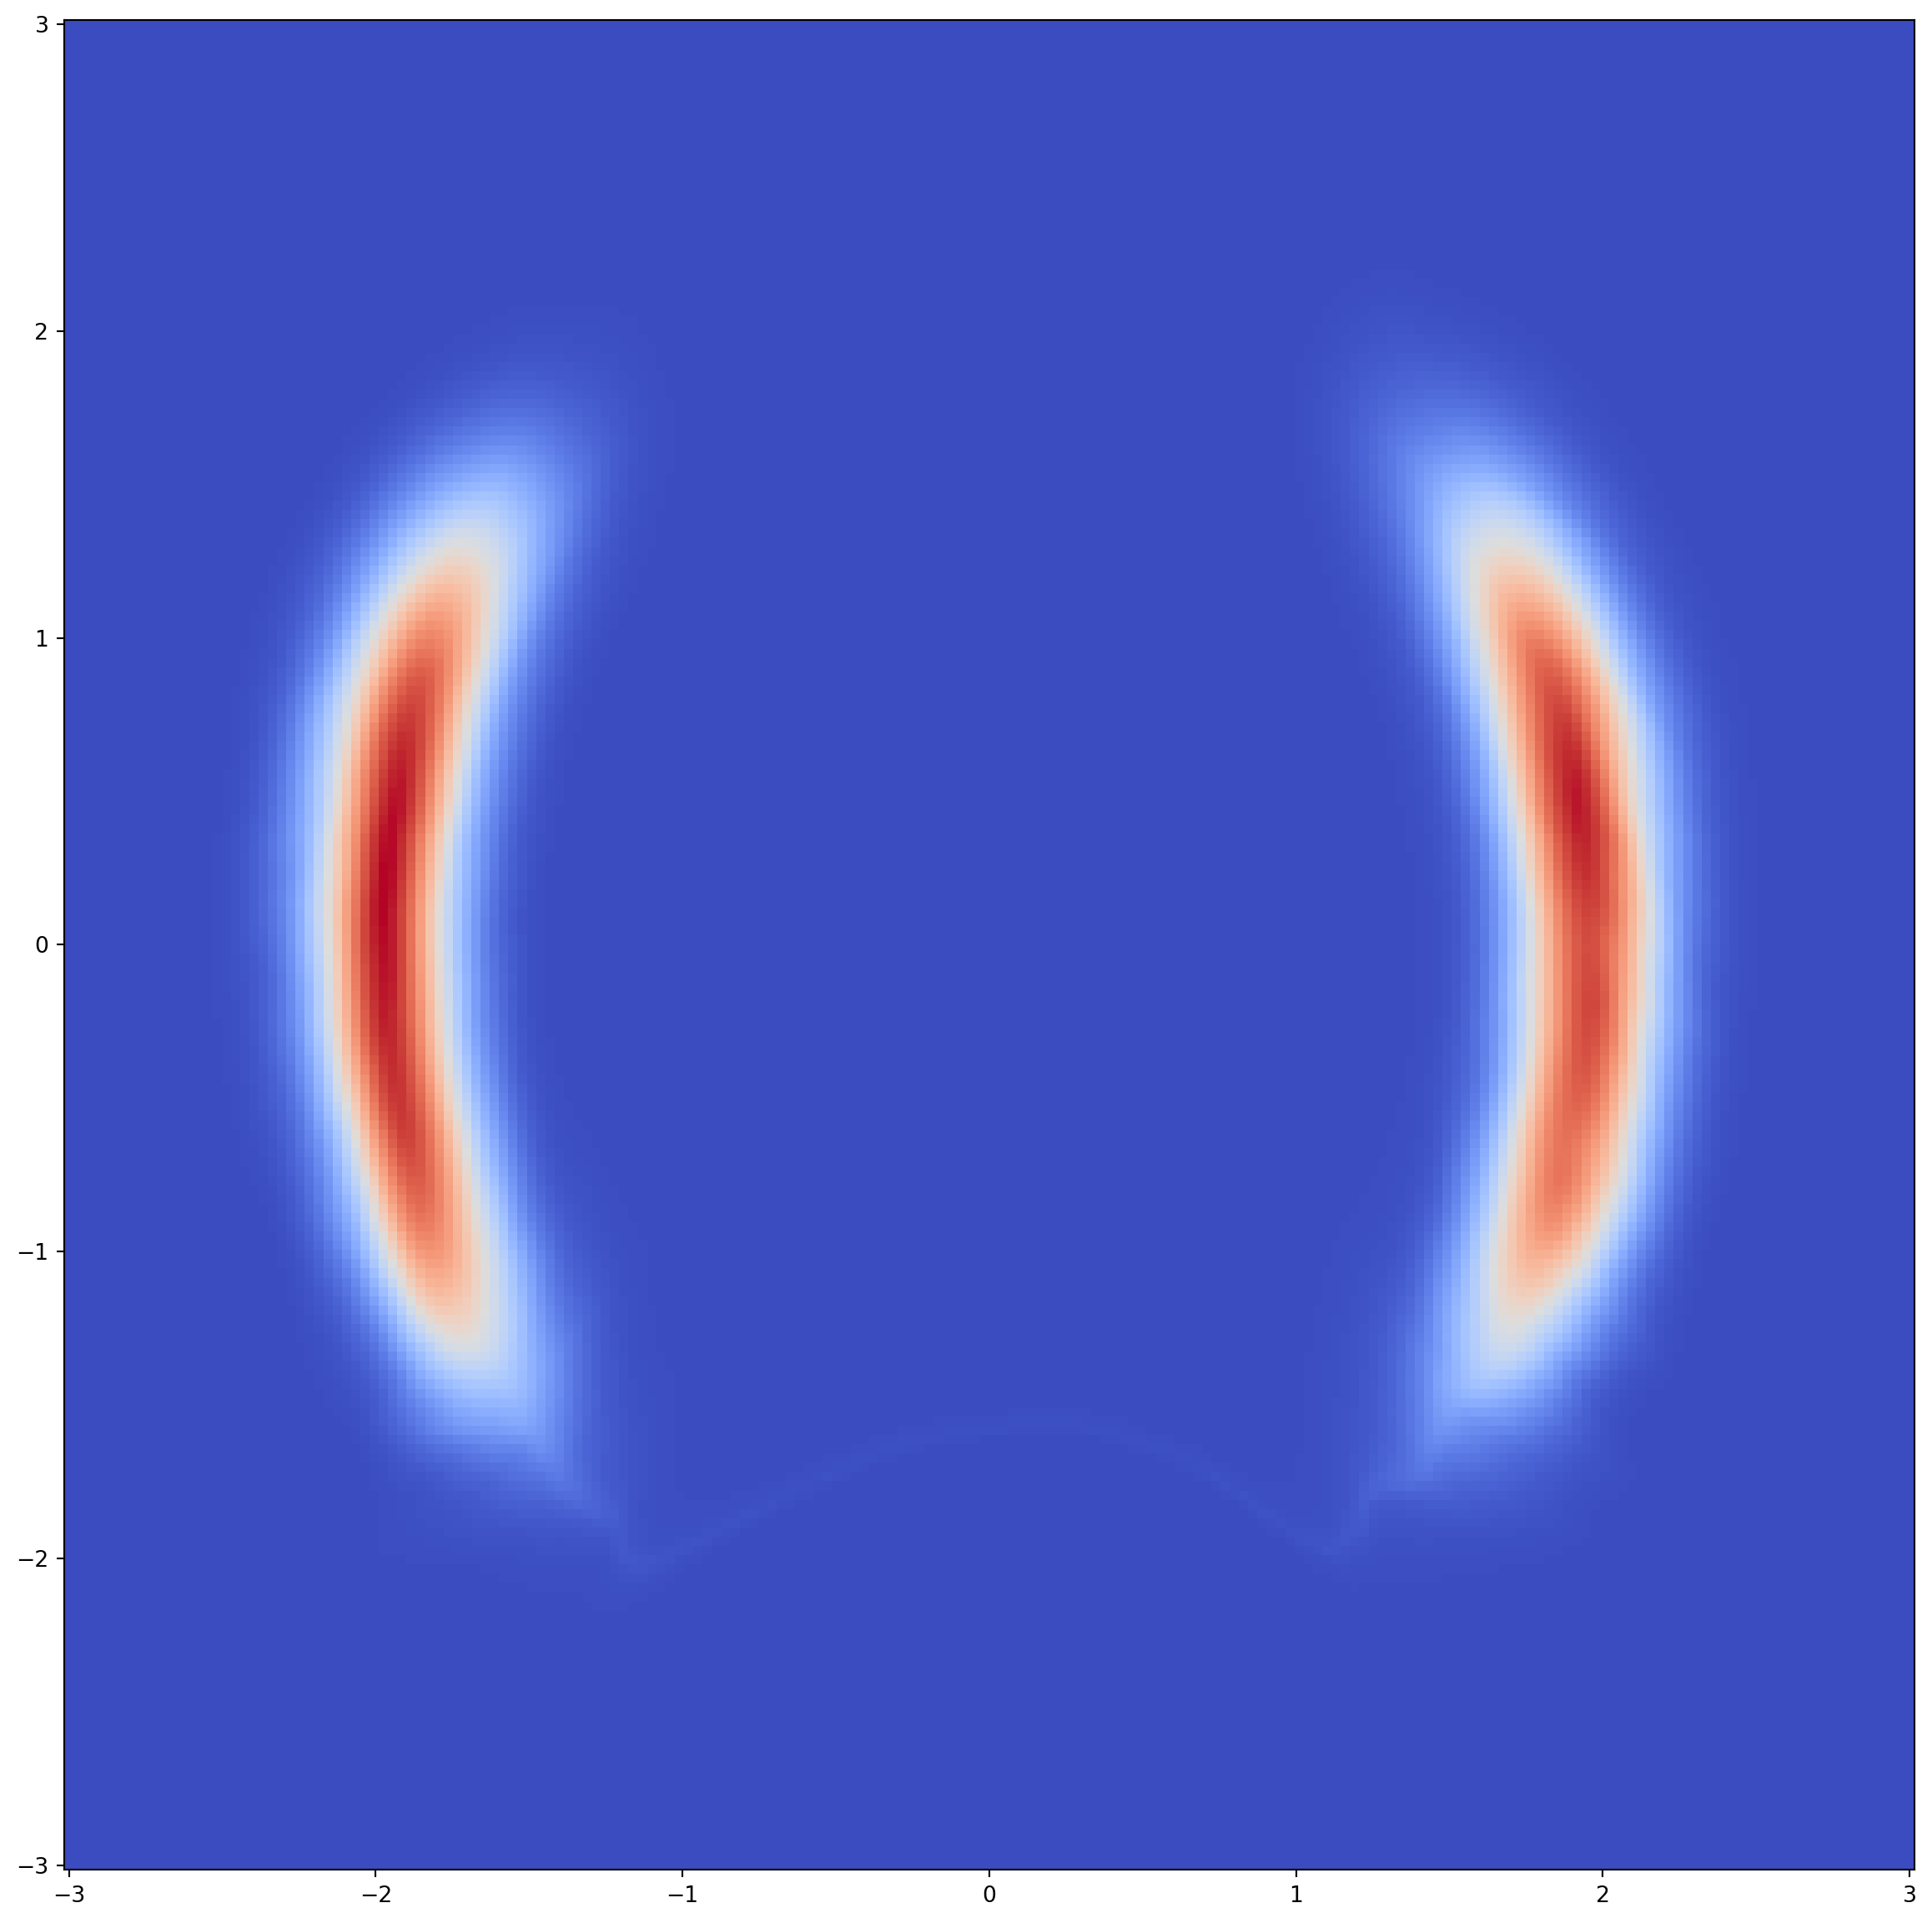

 88%|████████▊ | 3501/4000 [04:24<01:23,  5.98it/s]

 88%|████████▊ | 3503/4000 [04:25<01:09,  7.18it/s]

 88%|████████▊ | 3505/4000 [04:25<00:59,  8.35it/s]

 88%|████████▊ | 3507/4000 [04:25<00:52,  9.44it/s]

 88%|████████▊ | 3509/4000 [04:25<00:47, 10.37it/s]

 88%|████████▊ | 3511/4000 [04:25<00:43, 11.15it/s]

 88%|████████▊ | 3513/4000 [04:25<00:41, 11.74it/s]

 88%|████████▊ | 3515/4000 [04:26<00:39, 12.20it/s]

 88%|████████▊ | 3517/4000 [04:26<00:38, 12.54it/s]

 88%|████████▊ | 3519/4000 [04:26<00:37, 12.82it/s]

 88%|████████▊ | 3521/4000 [04:26<00:36, 13.03it/s]

 88%|████████▊ | 3523/4000 [04:26<00:36, 13.18it/s]

 88%|████████▊ | 3525/4000 [04:26<00:35, 13.27it/s]

 88%|████████▊ | 3527/4000 [04:26<00:35, 13.34it/s]

 88%|████████▊ | 3529/4000 [04:27<00:35, 13.36it/s]

 88%|████████▊ | 3531/4000 [04:27<00:34, 13.42it/s]

 88%|████████▊ | 3533/4000 [04:27<00:34, 13.45it/s]

 88%|████████▊ | 3535/4000 [04:27<00:34, 13.49it/s]

 88%|████████▊ | 3537/4000 [04:27<00:34, 13.51it/s]

 88%|████████▊ | 3539/4000 [04:27<00:34, 13.49it/s]

 89%|████████▊ | 3541/4000 [04:27<00:33, 13.52it/s]

 89%|████████▊ | 3543/4000 [04:28<00:33, 13.50it/s]

 89%|████████▊ | 3545/4000 [04:28<00:33, 13.50it/s]

 89%|████████▊ | 3547/4000 [04:28<00:33, 13.51it/s]

 89%|████████▊ | 3549/4000 [04:28<00:33, 13.50it/s]

 89%|████████▉ | 3551/4000 [04:28<00:33, 13.50it/s]

 89%|████████▉ | 3553/4000 [04:28<00:33, 13.48it/s]

 89%|████████▉ | 3555/4000 [04:28<00:32, 13.52it/s]

 89%|████████▉ | 3557/4000 [04:29<00:32, 13.53it/s]

 89%|████████▉ | 3559/4000 [04:29<00:32, 13.52it/s]

 89%|████████▉ | 3561/4000 [04:29<00:32, 13.52it/s]

 89%|████████▉ | 3563/4000 [04:29<00:32, 13.46it/s]

 89%|████████▉ | 3565/4000 [04:29<00:32, 13.47it/s]

 89%|████████▉ | 3567/4000 [04:29<00:32, 13.50it/s]

 89%|████████▉ | 3569/4000 [04:30<00:31, 13.53it/s]

 89%|████████▉ | 3571/4000 [04:30<00:31, 13.55it/s]

 89%|████████▉ | 3573/4000 [04:30<00:31, 13.58it/s]

 89%|████████▉ | 3575/4000 [04:30<00:31, 13.59it/s]

 89%|████████▉ | 3577/4000 [04:30<00:31, 13.57it/s]

 89%|████████▉ | 3579/4000 [04:30<00:31, 13.55it/s]

 90%|████████▉ | 3581/4000 [04:30<00:30, 13.57it/s]

 90%|████████▉ | 3583/4000 [04:31<00:30, 13.56it/s]

 90%|████████▉ | 3585/4000 [04:31<00:30, 13.58it/s]

 90%|████████▉ | 3587/4000 [04:31<00:30, 13.56it/s]

 90%|████████▉ | 3589/4000 [04:31<00:30, 13.58it/s]

 90%|████████▉ | 3591/4000 [04:31<00:30, 13.56it/s]

 90%|████████▉ | 3593/4000 [04:31<00:30, 13.56it/s]

 90%|████████▉ | 3595/4000 [04:31<00:29, 13.56it/s]

 90%|████████▉ | 3597/4000 [04:32<00:29, 13.56it/s]

 90%|████████▉ | 3599/4000 [04:32<00:29, 13.59it/s]

 90%|█████████ | 3601/4000 [04:32<00:29, 13.54it/s]

 90%|█████████ | 3603/4000 [04:32<00:29, 13.53it/s]

 90%|█████████ | 3605/4000 [04:32<00:29, 13.48it/s]

 90%|█████████ | 3607/4000 [04:32<00:29, 13.50it/s]

 90%|█████████ | 3609/4000 [04:32<00:28, 13.54it/s]

 90%|█████████ | 3611/4000 [04:33<00:28, 13.54it/s]

 90%|█████████ | 3613/4000 [04:33<00:28, 13.53it/s]

 90%|█████████ | 3615/4000 [04:33<00:28, 13.55it/s]

 90%|█████████ | 3617/4000 [04:33<00:28, 13.55it/s]

 90%|█████████ | 3619/4000 [04:33<00:28, 13.56it/s]

 91%|█████████ | 3621/4000 [04:33<00:28, 13.52it/s]

 91%|█████████ | 3623/4000 [04:34<00:27, 13.55it/s]

 91%|█████████ | 3625/4000 [04:34<00:27, 13.58it/s]

 91%|█████████ | 3627/4000 [04:34<00:27, 13.58it/s]

 91%|█████████ | 3629/4000 [04:34<00:27, 13.59it/s]

 91%|█████████ | 3631/4000 [04:34<00:27, 13.61it/s]

 91%|█████████ | 3633/4000 [04:34<00:26, 13.60it/s]

 91%|█████████ | 3635/4000 [04:34<00:26, 13.60it/s]

 91%|█████████ | 3637/4000 [04:35<00:26, 13.58it/s]

 91%|█████████ | 3639/4000 [04:35<00:26, 13.54it/s]

 91%|█████████ | 3641/4000 [04:35<00:26, 13.55it/s]

 91%|█████████ | 3643/4000 [04:35<00:26, 13.54it/s]

 91%|█████████ | 3645/4000 [04:35<00:26, 13.53it/s]

 91%|█████████ | 3647/4000 [04:35<00:26, 13.55it/s]

 91%|█████████ | 3649/4000 [04:35<00:26, 13.43it/s]

 91%|█████████▏| 3651/4000 [04:36<00:26, 13.41it/s]

 91%|█████████▏| 3653/4000 [04:36<00:25, 13.44it/s]

 91%|█████████▏| 3655/4000 [04:36<00:25, 13.51it/s]

 91%|█████████▏| 3657/4000 [04:36<00:25, 13.50it/s]

 91%|█████████▏| 3659/4000 [04:36<00:25, 13.49it/s]

 92%|█████████▏| 3661/4000 [04:36<00:25, 13.50it/s]

 92%|█████████▏| 3663/4000 [04:36<00:24, 13.52it/s]

 92%|█████████▏| 3665/4000 [04:37<00:24, 13.52it/s]

 92%|█████████▏| 3667/4000 [04:37<00:24, 13.53it/s]

 92%|█████████▏| 3669/4000 [04:37<00:24, 13.54it/s]

 92%|█████████▏| 3671/4000 [04:37<00:24, 13.54it/s]

 92%|█████████▏| 3673/4000 [04:37<00:24, 13.59it/s]

 92%|█████████▏| 3675/4000 [04:37<00:23, 13.59it/s]

 92%|█████████▏| 3677/4000 [04:37<00:23, 13.58it/s]

 92%|█████████▏| 3679/4000 [04:38<00:23, 13.55it/s]

 92%|█████████▏| 3681/4000 [04:38<00:23, 13.54it/s]

 92%|█████████▏| 3683/4000 [04:38<00:23, 13.56it/s]

 92%|█████████▏| 3685/4000 [04:38<00:23, 13.53it/s]

 92%|█████████▏| 3687/4000 [04:38<00:23, 13.56it/s]

 92%|█████████▏| 3689/4000 [04:38<00:22, 13.54it/s]

 92%|█████████▏| 3691/4000 [04:39<00:22, 13.54it/s]

 92%|█████████▏| 3693/4000 [04:39<00:22, 13.49it/s]

 92%|█████████▏| 3695/4000 [04:39<00:22, 13.49it/s]

 92%|█████████▏| 3697/4000 [04:39<00:22, 13.52it/s]

 92%|█████████▏| 3699/4000 [04:39<00:22, 13.55it/s]

 93%|█████████▎| 3701/4000 [04:39<00:22, 13.55it/s]

 93%|█████████▎| 3703/4000 [04:39<00:21, 13.55it/s]

 93%|█████████▎| 3705/4000 [04:40<00:21, 13.54it/s]

 93%|█████████▎| 3707/4000 [04:40<00:21, 13.55it/s]

 93%|█████████▎| 3709/4000 [04:40<00:21, 13.57it/s]

 93%|█████████▎| 3711/4000 [04:40<00:21, 13.54it/s]

 93%|█████████▎| 3713/4000 [04:40<00:21, 13.53it/s]

 93%|█████████▎| 3715/4000 [04:40<00:21, 13.53it/s]

 93%|█████████▎| 3717/4000 [04:40<00:20, 13.54it/s]

 93%|█████████▎| 3719/4000 [04:41<00:20, 13.53it/s]

 93%|█████████▎| 3721/4000 [04:41<00:20, 13.55it/s]

 93%|█████████▎| 3723/4000 [04:41<00:20, 13.53it/s]

 93%|█████████▎| 3725/4000 [04:41<00:20, 13.50it/s]

 93%|█████████▎| 3727/4000 [04:41<00:20, 13.49it/s]

 93%|█████████▎| 3729/4000 [04:41<00:20, 13.48it/s]

 93%|█████████▎| 3731/4000 [04:41<00:19, 13.50it/s]

 93%|█████████▎| 3733/4000 [04:42<00:19, 13.50it/s]

 93%|█████████▎| 3735/4000 [04:42<00:19, 13.49it/s]

 93%|█████████▎| 3737/4000 [04:42<00:19, 13.53it/s]

 93%|█████████▎| 3739/4000 [04:42<00:19, 13.56it/s]

 94%|█████████▎| 3741/4000 [04:42<00:19, 13.55it/s]

 94%|█████████▎| 3743/4000 [04:42<00:18, 13.55it/s]

 94%|█████████▎| 3745/4000 [04:43<00:18, 13.54it/s]

 94%|█████████▎| 3747/4000 [04:43<00:18, 13.50it/s]

 94%|█████████▎| 3749/4000 [04:43<00:18, 13.52it/s]

 94%|█████████▍| 3751/4000 [04:43<00:18, 13.53it/s]

 94%|█████████▍| 3753/4000 [04:43<00:18, 13.52it/s]

 94%|█████████▍| 3755/4000 [04:43<00:18, 13.45it/s]

 94%|█████████▍| 3757/4000 [04:43<00:18, 13.46it/s]

 94%|█████████▍| 3759/4000 [04:44<00:17, 13.48it/s]

 94%|█████████▍| 3761/4000 [04:44<00:17, 13.49it/s]

 94%|█████████▍| 3763/4000 [04:44<00:17, 13.49it/s]

 94%|█████████▍| 3765/4000 [04:44<00:17, 13.51it/s]

 94%|█████████▍| 3767/4000 [04:44<00:17, 13.52it/s]

 94%|█████████▍| 3769/4000 [04:44<00:17, 13.54it/s]

 94%|█████████▍| 3771/4000 [04:44<00:16, 13.54it/s]

 94%|█████████▍| 3773/4000 [04:45<00:16, 13.52it/s]

 94%|█████████▍| 3775/4000 [04:45<00:16, 13.54it/s]

 94%|█████████▍| 3777/4000 [04:45<00:16, 13.53it/s]

 94%|█████████▍| 3779/4000 [04:45<00:16, 13.50it/s]

 95%|█████████▍| 3781/4000 [04:45<00:16, 13.24it/s]

 95%|█████████▍| 3783/4000 [04:45<00:16, 13.24it/s]

 95%|█████████▍| 3785/4000 [04:45<00:16, 13.29it/s]

 95%|█████████▍| 3787/4000 [04:46<00:15, 13.35it/s]

 95%|█████████▍| 3789/4000 [04:46<00:15, 13.39it/s]

 95%|█████████▍| 3791/4000 [04:46<00:15, 13.39it/s]

 95%|█████████▍| 3793/4000 [04:46<00:15, 13.42it/s]

 95%|█████████▍| 3795/4000 [04:46<00:15, 13.14it/s]

 95%|█████████▍| 3797/4000 [04:46<00:15, 13.11it/s]

 95%|█████████▍| 3799/4000 [04:47<00:15, 13.19it/s]

 95%|█████████▌| 3801/4000 [04:47<00:14, 13.27it/s]

 95%|█████████▌| 3803/4000 [04:47<00:14, 13.36it/s]

 95%|█████████▌| 3805/4000 [04:47<00:14, 13.37it/s]

 95%|█████████▌| 3807/4000 [04:47<00:14, 13.40it/s]

 95%|█████████▌| 3809/4000 [04:47<00:14, 13.41it/s]

 95%|█████████▌| 3811/4000 [04:47<00:14, 13.43it/s]

 95%|█████████▌| 3813/4000 [04:48<00:13, 13.45it/s]

 95%|█████████▌| 3815/4000 [04:48<00:13, 13.44it/s]

 95%|█████████▌| 3817/4000 [04:48<00:13, 13.46it/s]

 95%|█████████▌| 3819/4000 [04:48<00:13, 13.42it/s]

 96%|█████████▌| 3821/4000 [04:48<00:13, 13.44it/s]

 96%|█████████▌| 3823/4000 [04:48<00:13, 13.45it/s]

 96%|█████████▌| 3825/4000 [04:48<00:13, 13.44it/s]

 96%|█████████▌| 3827/4000 [04:49<00:12, 13.46it/s]

 96%|█████████▌| 3829/4000 [04:49<00:12, 13.42it/s]

 96%|█████████▌| 3831/4000 [04:49<00:12, 13.42it/s]

 96%|█████████▌| 3833/4000 [04:49<00:12, 13.42it/s]

 96%|█████████▌| 3835/4000 [04:49<00:12, 13.43it/s]

 96%|█████████▌| 3837/4000 [04:49<00:12, 13.45it/s]

 96%|█████████▌| 3839/4000 [04:50<00:11, 13.43it/s]

 96%|█████████▌| 3841/4000 [04:50<00:11, 13.45it/s]

 96%|█████████▌| 3843/4000 [04:50<00:11, 13.45it/s]

 96%|█████████▌| 3845/4000 [04:50<00:11, 13.45it/s]

 96%|█████████▌| 3847/4000 [04:50<00:11, 13.43it/s]

 96%|█████████▌| 3849/4000 [04:50<00:11, 13.45it/s]

 96%|█████████▋| 3851/4000 [04:50<00:11, 13.45it/s]

 96%|█████████▋| 3853/4000 [04:51<00:10, 13.41it/s]

 96%|█████████▋| 3855/4000 [04:51<00:10, 13.45it/s]

 96%|█████████▋| 3857/4000 [04:51<00:10, 13.46it/s]

 96%|█████████▋| 3859/4000 [04:51<00:10, 13.49it/s]

 97%|█████████▋| 3861/4000 [04:51<00:10, 13.50it/s]

 97%|█████████▋| 3863/4000 [04:51<00:10, 13.51it/s]

 97%|█████████▋| 3865/4000 [04:51<00:10, 13.46it/s]

 97%|█████████▋| 3867/4000 [04:52<00:09, 13.40it/s]

 97%|█████████▋| 3869/4000 [04:52<00:09, 13.45it/s]

 97%|█████████▋| 3871/4000 [04:52<00:09, 13.46it/s]

 97%|█████████▋| 3873/4000 [04:52<00:09, 13.48it/s]

 97%|█████████▋| 3875/4000 [04:52<00:09, 13.45it/s]

 97%|█████████▋| 3877/4000 [04:52<00:09, 13.45it/s]

 97%|█████████▋| 3879/4000 [04:52<00:09, 13.44it/s]

 97%|█████████▋| 3881/4000 [04:53<00:08, 13.49it/s]

 97%|█████████▋| 3883/4000 [04:53<00:08, 13.51it/s]

 97%|█████████▋| 3885/4000 [04:53<00:08, 13.45it/s]

 97%|█████████▋| 3887/4000 [04:53<00:08, 13.43it/s]

 97%|█████████▋| 3889/4000 [04:53<00:08, 13.38it/s]

 97%|█████████▋| 3891/4000 [04:53<00:08, 13.36it/s]

 97%|█████████▋| 3893/4000 [04:54<00:07, 13.38it/s]

 97%|█████████▋| 3895/4000 [04:54<00:07, 13.42it/s]

 97%|█████████▋| 3897/4000 [04:54<00:07, 13.39it/s]

 97%|█████████▋| 3899/4000 [04:54<00:07, 13.42it/s]

 98%|█████████▊| 3901/4000 [04:54<00:07, 13.47it/s]

 98%|█████████▊| 3903/4000 [04:54<00:07, 13.49it/s]

 98%|█████████▊| 3905/4000 [04:54<00:07, 13.51it/s]

 98%|█████████▊| 3907/4000 [04:55<00:06, 13.50it/s]

 98%|█████████▊| 3909/4000 [04:55<00:06, 13.52it/s]

 98%|█████████▊| 3911/4000 [04:55<00:06, 13.51it/s]

 98%|█████████▊| 3913/4000 [04:55<00:06, 13.49it/s]

 98%|█████████▊| 3915/4000 [04:55<00:06, 13.49it/s]

 98%|█████████▊| 3917/4000 [04:55<00:06, 13.48it/s]

 98%|█████████▊| 3919/4000 [04:55<00:05, 13.51it/s]

 98%|█████████▊| 3921/4000 [04:56<00:05, 13.50it/s]

 98%|█████████▊| 3923/4000 [04:56<00:05, 13.54it/s]

 98%|█████████▊| 3925/4000 [04:56<00:05, 13.57it/s]

 98%|█████████▊| 3927/4000 [04:56<00:05, 13.60it/s]

 98%|█████████▊| 3929/4000 [04:56<00:05, 13.59it/s]

 98%|█████████▊| 3931/4000 [04:56<00:05, 13.56it/s]

 98%|█████████▊| 3933/4000 [04:57<00:04, 13.47it/s]

 98%|█████████▊| 3935/4000 [04:57<00:04, 13.51it/s]

 98%|█████████▊| 3937/4000 [04:57<00:04, 13.47it/s]

 98%|█████████▊| 3939/4000 [04:57<00:04, 13.51it/s]

 99%|█████████▊| 3941/4000 [04:57<00:04, 13.50it/s]

 99%|█████████▊| 3943/4000 [04:57<00:04, 13.50it/s]

 99%|█████████▊| 3945/4000 [04:57<00:04, 13.51it/s]

 99%|█████████▊| 3947/4000 [04:58<00:03, 13.49it/s]

 99%|█████████▊| 3949/4000 [04:58<00:03, 13.50it/s]

 99%|█████████▉| 3951/4000 [04:58<00:03, 13.49it/s]

 99%|█████████▉| 3953/4000 [04:58<00:03, 13.48it/s]

 99%|█████████▉| 3955/4000 [04:58<00:03, 13.51it/s]

 99%|█████████▉| 3957/4000 [04:58<00:03, 13.46it/s]

 99%|█████████▉| 3959/4000 [04:58<00:03, 13.47it/s]

 99%|█████████▉| 3961/4000 [04:59<00:02, 13.48it/s]

 99%|█████████▉| 3963/4000 [04:59<00:02, 13.45it/s]

 99%|█████████▉| 3965/4000 [04:59<00:02, 13.42it/s]

 99%|█████████▉| 3967/4000 [04:59<00:02, 13.44it/s]

 99%|█████████▉| 3969/4000 [04:59<00:02, 13.46it/s]

 99%|█████████▉| 3971/4000 [04:59<00:02, 13.47it/s]

 99%|█████████▉| 3973/4000 [04:59<00:01, 13.52it/s]

 99%|█████████▉| 3975/4000 [05:00<00:01, 13.54it/s]

 99%|█████████▉| 3977/4000 [05:00<00:01, 13.47it/s]

 99%|█████████▉| 3979/4000 [05:00<00:01, 13.49it/s]

100%|█████████▉| 3981/4000 [05:00<00:01, 13.51it/s]

100%|█████████▉| 3983/4000 [05:00<00:01, 13.54it/s]

100%|█████████▉| 3985/4000 [05:00<00:01, 13.54it/s]

100%|█████████▉| 3987/4000 [05:01<00:00, 13.50it/s]

100%|█████████▉| 3989/4000 [05:01<00:00, 13.51it/s]

100%|█████████▉| 3991/4000 [05:01<00:00, 13.53it/s]

100%|█████████▉| 3993/4000 [05:01<00:00, 13.54it/s]

100%|█████████▉| 3995/4000 [05:01<00:00, 13.54it/s]

100%|█████████▉| 3997/4000 [05:01<00:00, 13.52it/s]

100%|█████████▉| 3999/4000 [05:01<00:00, 13.50it/s]

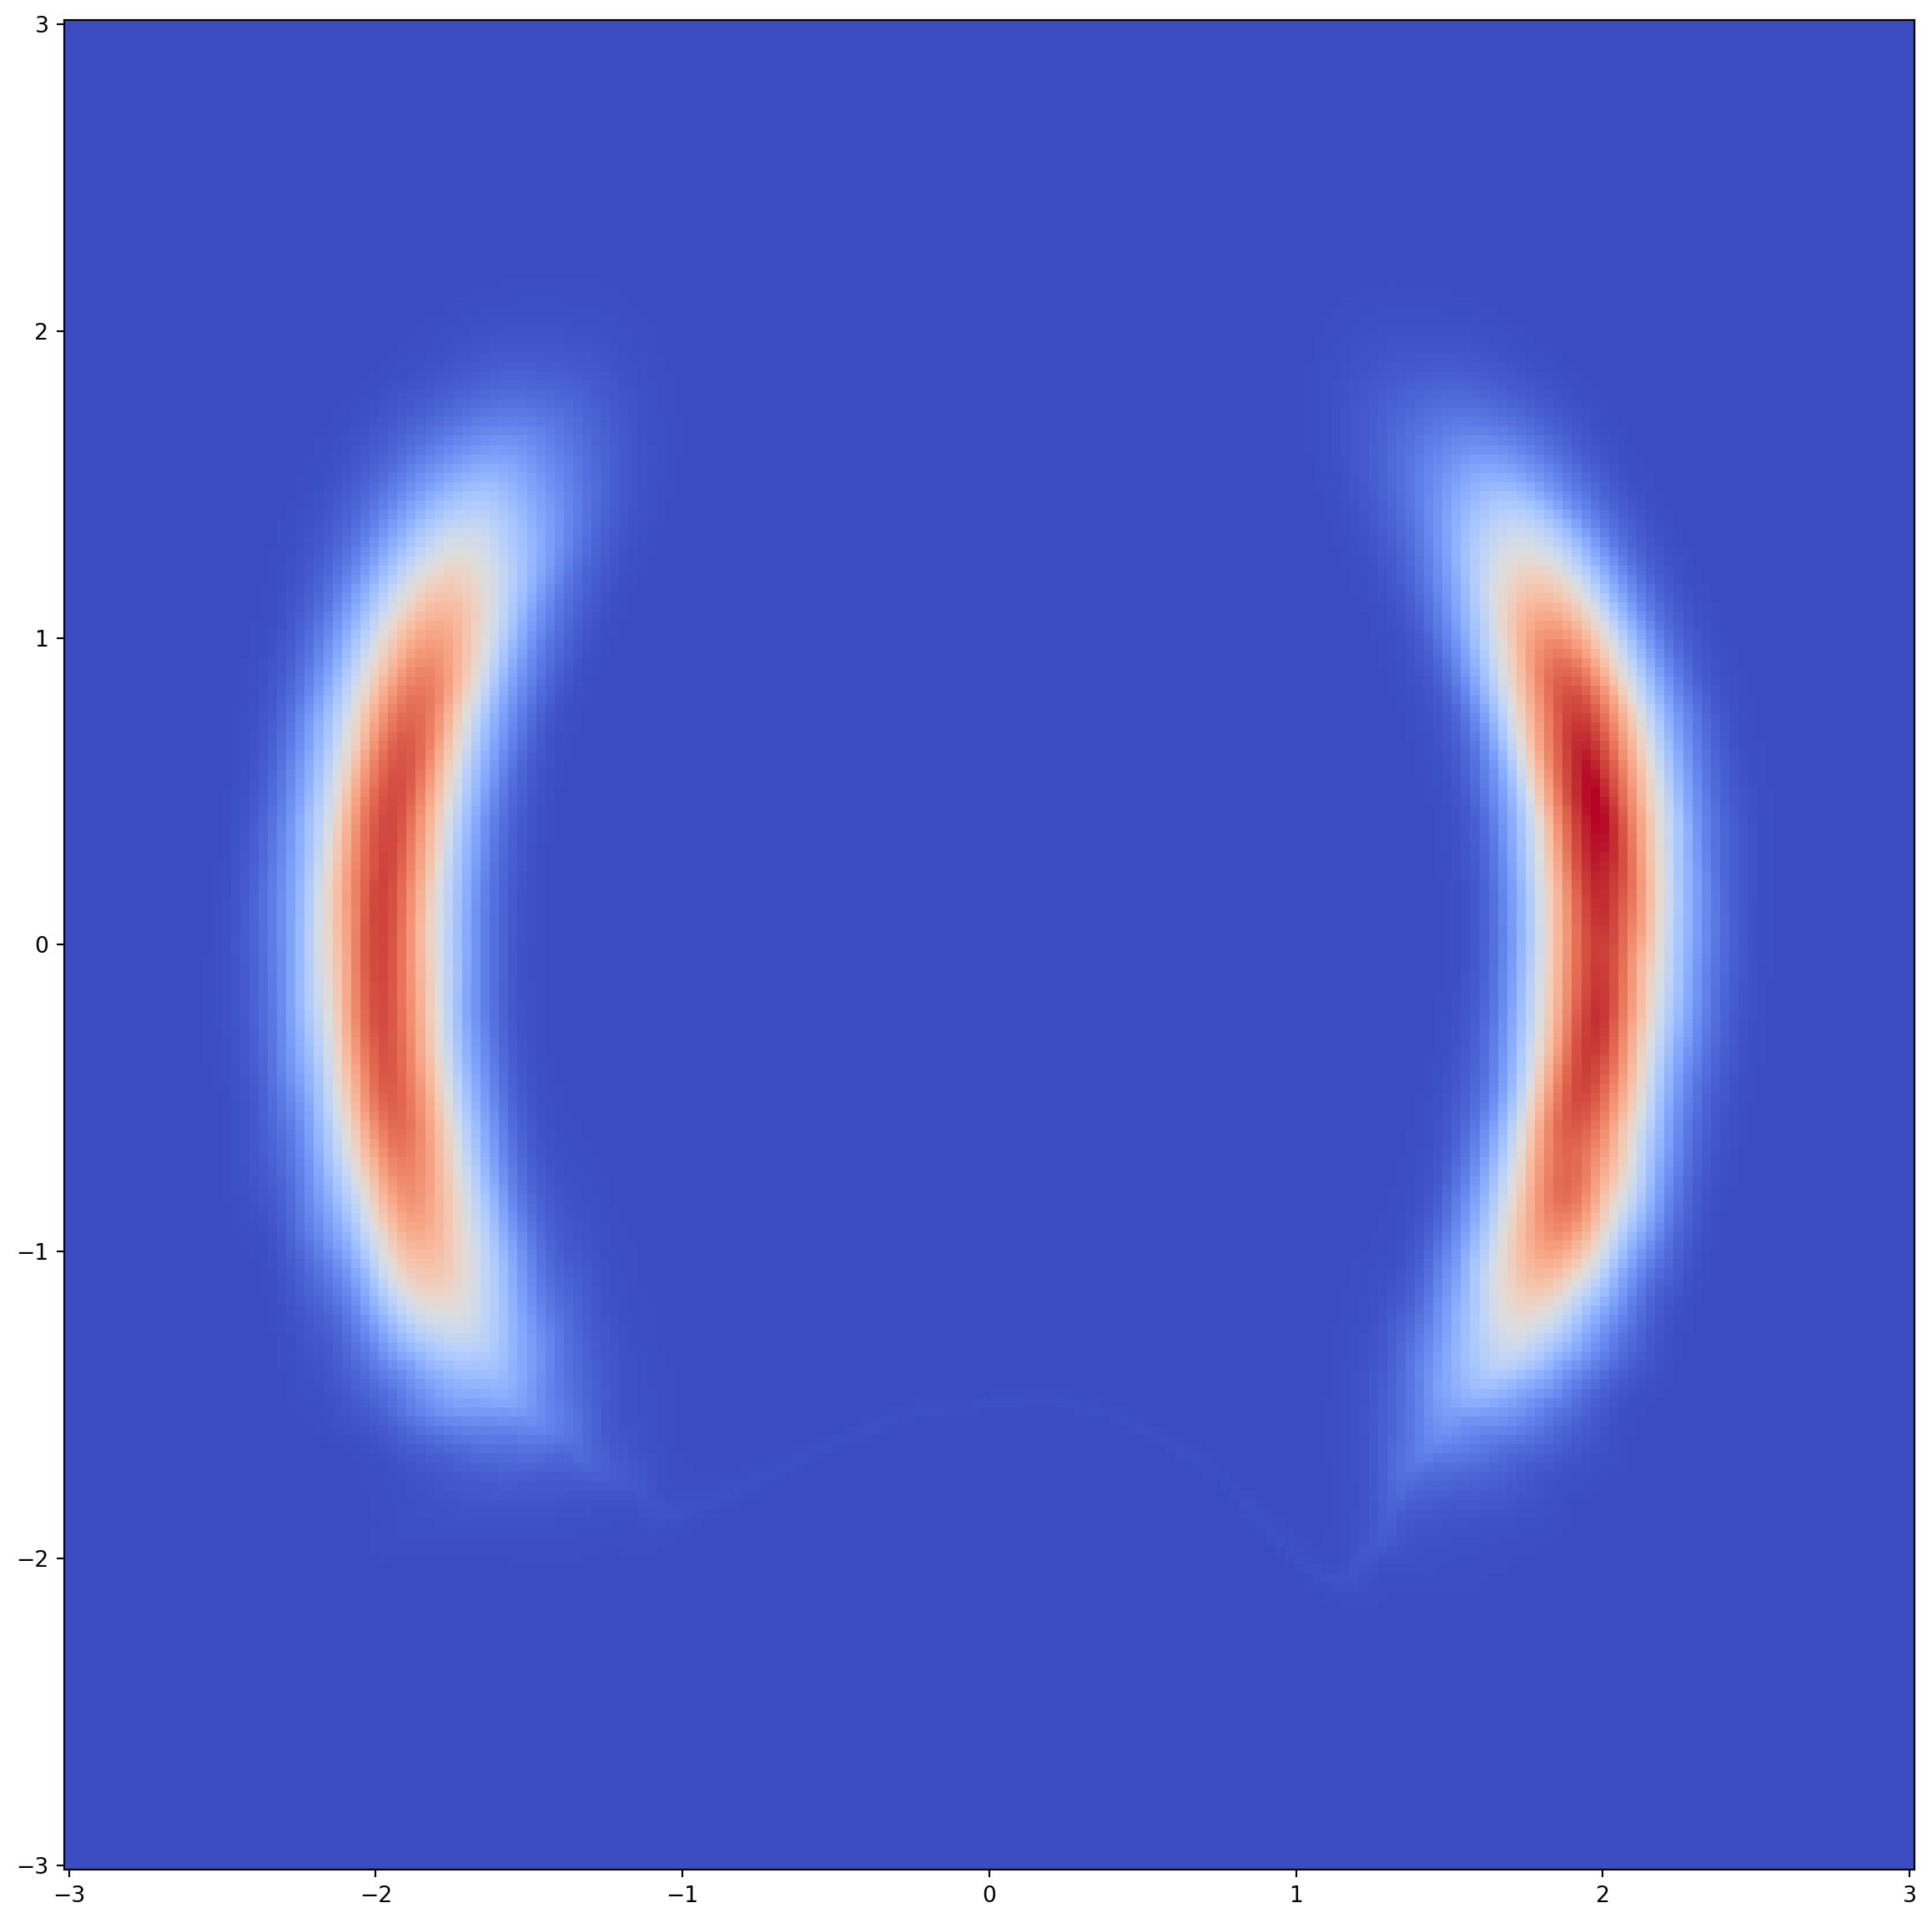

100%|██████████| 4000/4000 [05:02<00:00, 13.22it/s]

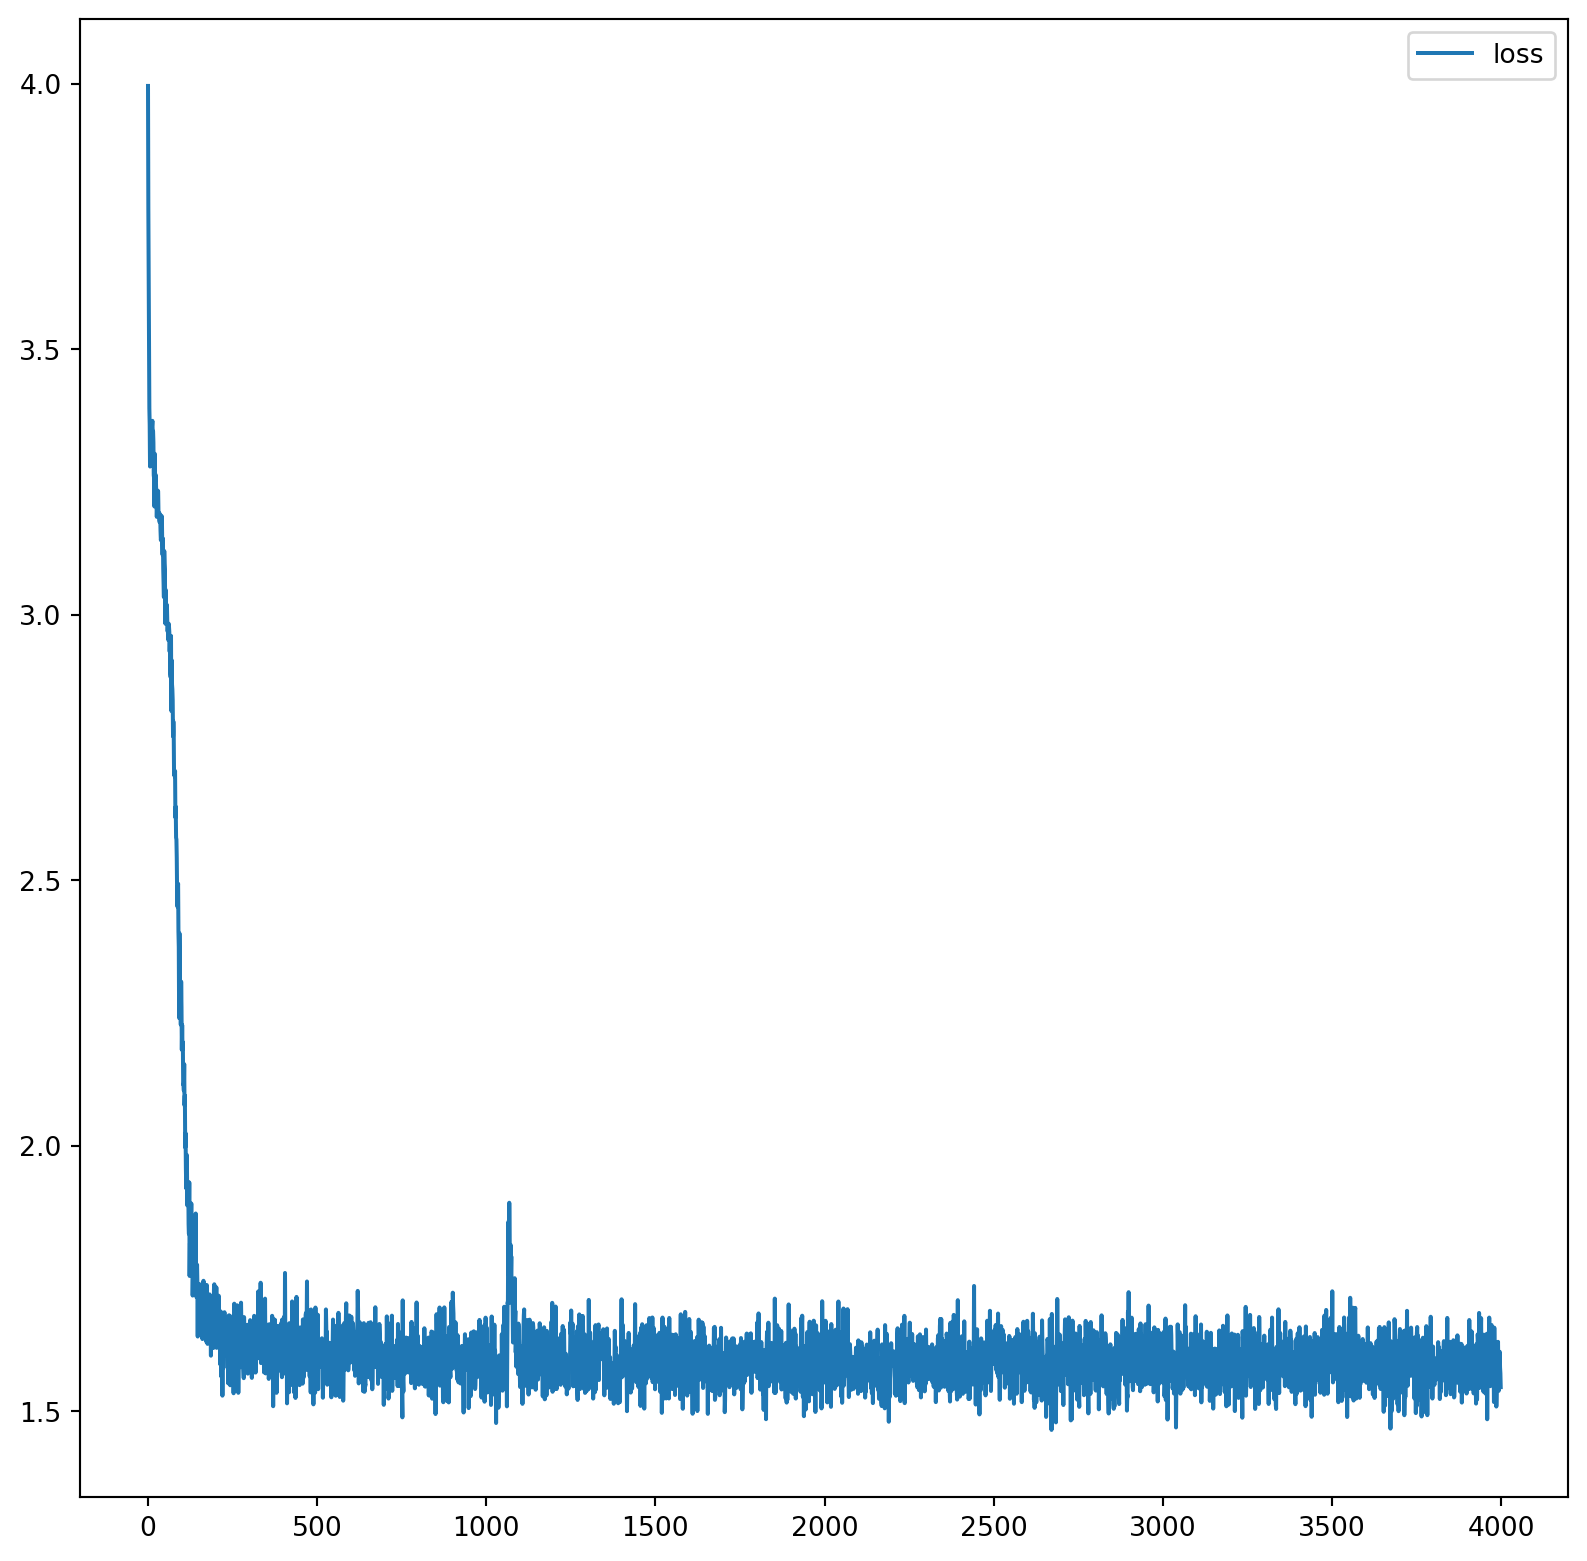

In [7]:
#| layout-ncol: 4
#| layout-nrow: 2
# Train model
max_iter = 4000
num_samples = 2 ** 9
show_iter = 500


loss_hist = np.array([])

optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-5)

for it in tqdm(range(max_iter)):
    optimizer.zero_grad()
    
    # Get training samples
    x = target.sample(num_samples).to(device)
    
    # Compute loss
    loss = model.forward_kld(x)
    
    # Do backprop and optimizer step
    if ~(torch.isnan(loss) | torch.isinf(loss)):
        loss.backward()
        optimizer.step()
    
    # Log loss
    loss_hist = np.append(loss_hist, loss.to('cpu').data.numpy())
    
    # Plot learned distribution
    if (it + 1) % show_iter == 0:
        model.eval()
        log_prob = model.log_prob(zz)
        model.train()
        prob = torch.exp(log_prob.to('cpu').view(*xx.shape))
        prob[torch.isnan(prob)] = 0

        plt.figure(figsize=(15, 15))
        plt.pcolormesh(xx, yy, prob.data.numpy(), cmap='coolwarm')
        plt.gca().set_aspect('equal', 'box')
        plt.show()

# Plot loss
plt.figure(figsize=(10, 10))
plt.plot(loss_hist, label='loss')
plt.legend()
plt.show()

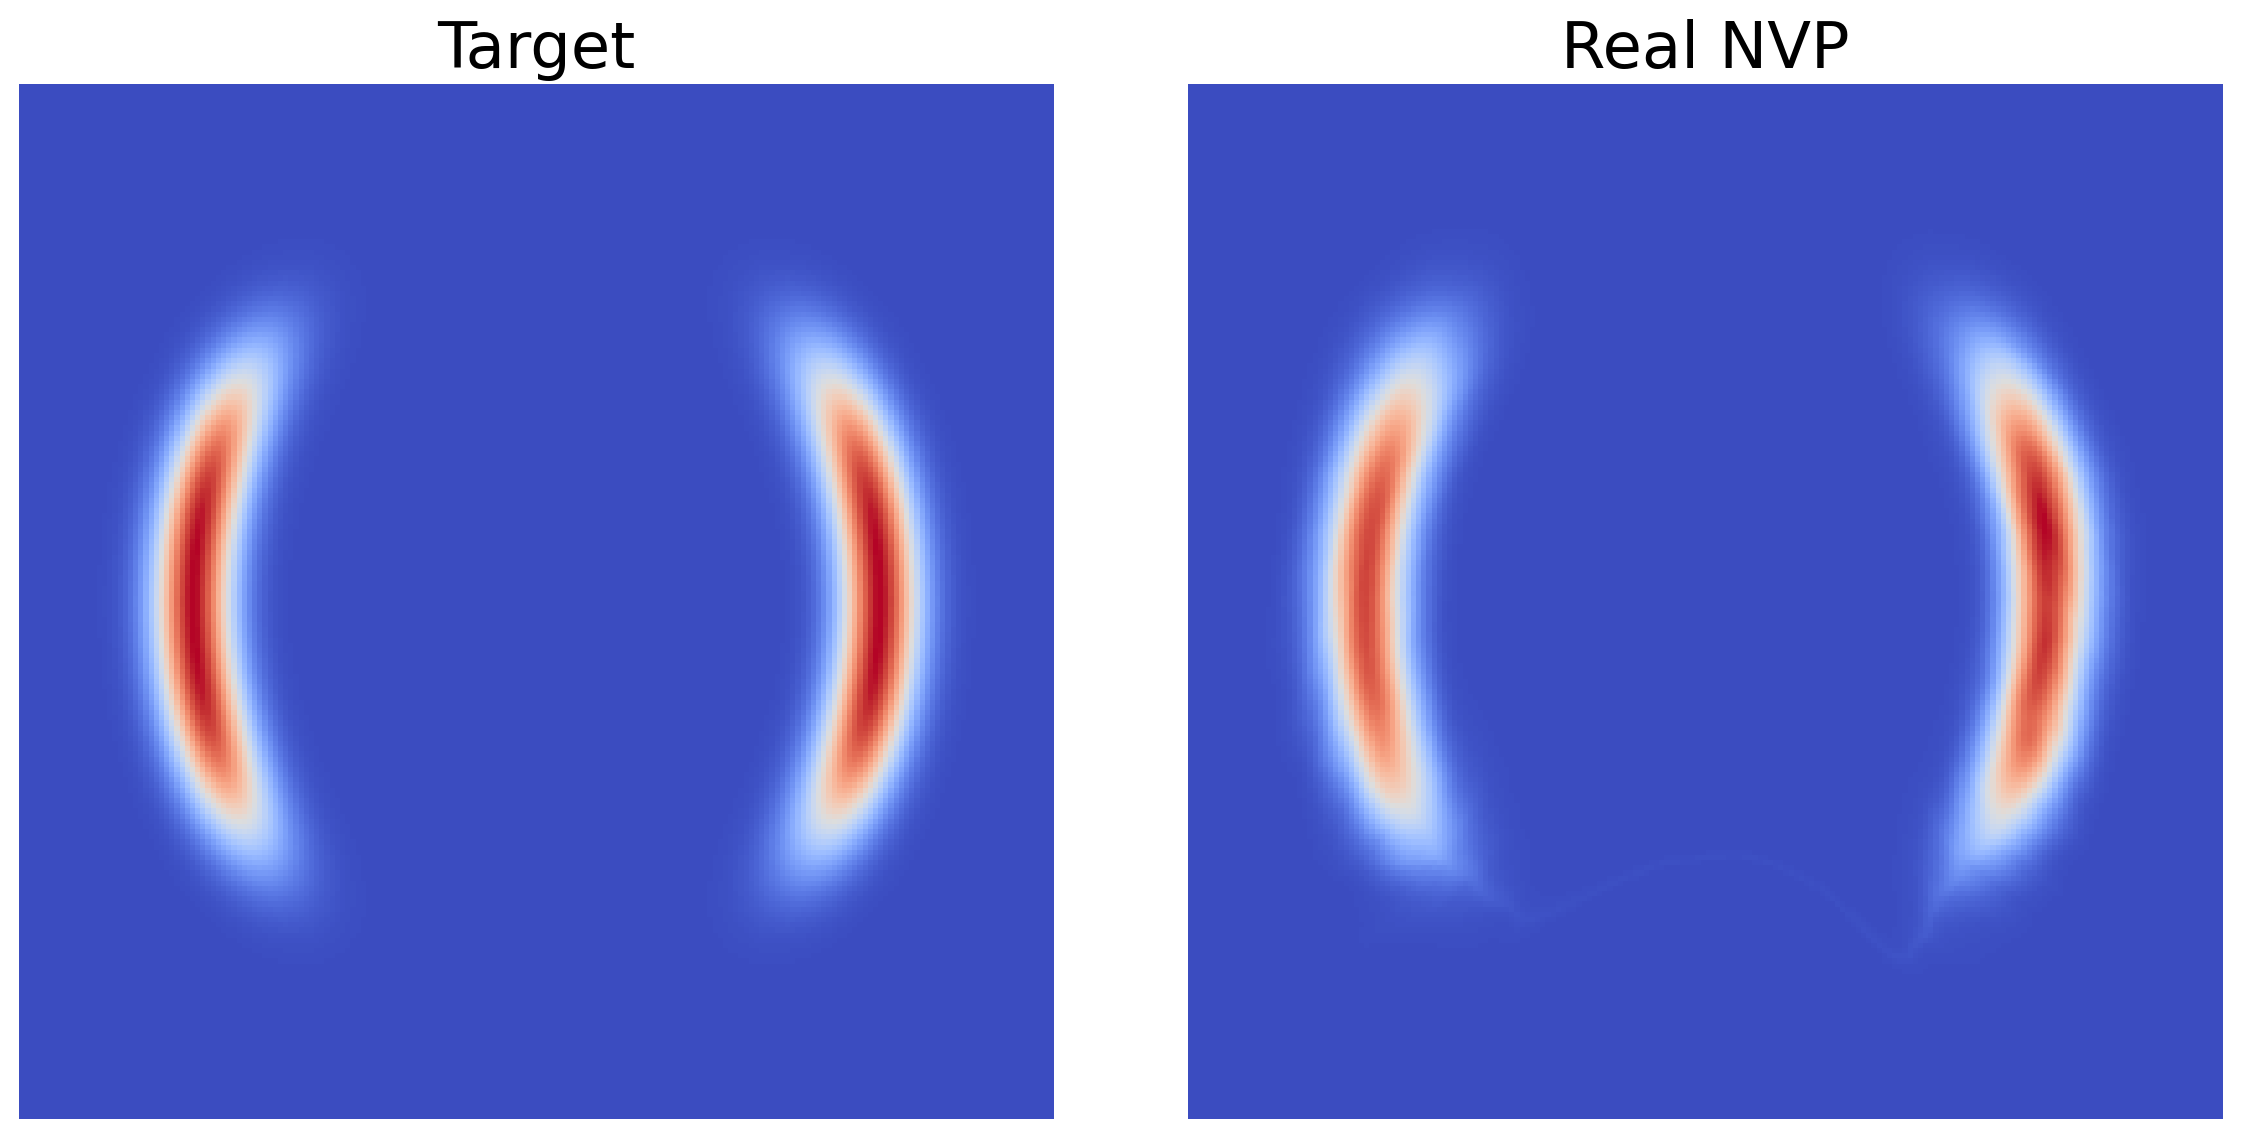

In [8]:
# Plot target distribution
f, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 7))

log_prob = target.log_prob(zz).to('cpu').view(*xx.shape)
prob = torch.exp(log_prob)
prob[torch.isnan(prob)] = 0

ax[0].pcolormesh(xx, yy, prob.data.numpy(), cmap='coolwarm')

ax[0].set_aspect('equal', 'box')
ax[0].set_axis_off()
ax[0].set_title('Target', fontsize=24)

# Plot learned distribution
model.eval()
log_prob = model.log_prob(zz).to('cpu').view(*xx.shape)
model.train()
prob = torch.exp(log_prob)
prob[torch.isnan(prob)] = 0

ax[1].pcolormesh(xx, yy, prob.data.numpy(), cmap='coolwarm')

ax[1].set_aspect('equal', 'box')
ax[1].set_axis_off()
ax[1].set_title('Real NVP', fontsize=24)

plt.subplots_adjust(wspace=0.1)
plt.show()

In [9]:
#| output: false
#| echo: false
#| eval: false
plt.savefig("./Files/NF2.svg")